Importações de libs

In [ ]:
def criar_readme():
    readme_content = 
    """# Análise Estatística SINAPI

    ## Descrição
    Este projeto contém análises estatísticas descritivas dos dados do SINAPI (Sistema Nacional de Pesquisa de Custos e Índices da Construção Civil), incluindo visualizações e análises temporais dos custos de construção civil no Brasil.

    ## Pré-requisitos
    - Python 3.8 ou superior
- pip (gerenciador de pacotes Python)
- Jupyter Notebook ou JupyterLab

## Instalação

1. Clone o repositório:
```bash
git clone modulo2-estatitica-descritiva/exercicios-aula/sinapi3.ipynb
cd estatistica-descritiva
```

2. Crie um ambiente virtual (recomendado):
```bash
# No Windows
python -m venv venv
venv\\Scripts\\activate

# No Linux/Mac
python3 -m venv venv
source venv/bin/activate
```

3. Instale as dependências:
```bash
pip install -r requirements.txt
```

## Executando o Notebook

1. Ative o ambiente virtual (se não estiver ativado):
```bash
# No Windows
venv\\Scripts\\activate

# No Linux/Mac
source venv/bin/activate
```

2. Inicie o Jupyter Notebook:
```bash
jupyter notebook
```

3. No navegador, abra o arquivo `sinapi.ipynb`

## Estrutura do Projeto
estatistica-descritiva/
│
├── README.md
├── requirements.txt
├── sinapi.ipynb
└── venv/

## Análises Incluídas
- Estatísticas descritivas dos custos
- Análise temporal
- Correlogramas
- Análise de cointegração
- Visualizações:
  - Gráficos de barras
  - Gráficos de linha
  - Heatmaps
  - Violin plots

## Problemas Comuns

### ModuleNotFoundError
Se encontrar erro de módulo não encontrado:
```bash
pip install -r requirements.txt --upgrade
```

### Erro no Jupyter
Se o kernel não iniciar:
```bash
python -m ipykernel install --user
```

## Contribuindo
1. Fork o projeto
2. Crie sua branch de feature
3. Commit suas mudanças
4. Push para a branch
5. Abra um Pull Request

## Licença
Este projeto está sob a licença MIT.

## Contato
Seu Nome - seu.email@dominio.com"""
    return readme_content

def criar_requirements():
    requirements_content = """numpy>=1.21.0
pandas>=1.3.0
matplotlib>=3.4.0
seaborn>=0.11.0
jupyter>=1.0.0
statsmodels>=0.13.0
scikit-learn>=0.24.0
scipy>=1.7.0
ipykernel>=6.0.0"""
    return requirements_content

# Criar os arquivos
try:
    with open('README.md', 'w', encoding='utf-8') as f:
        f.write(criar_readme())
    print("README.md criado com sucesso!")
    
    with open('requirements.txt', 'w', encoding='utf-8') as f:
        f.write(criar_requirements())
    print("requirements.txt criado com sucesso!")
    
except Exception as e:
    print(f"Erro ao criar arquivos: {e}")

README.md criado com sucesso!
requirements.txt criado com sucesso!


In [1]:
import pandas as pd
import numpy as np
import requests
from io import BytesIO
import locale
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# Tentativa 1: Usar formato simplificado do locale
try:
    locale.setlocale(locale.LC_ALL, 'pt_BR')
except:
    try:
        # Tentativa 2: Usar formato alternativo
        locale.setlocale(locale.LC_ALL, 'Portuguese_Brazil.1252')
    except:
        # Tentativa 3: Se nenhum locale português estiver disponível, usar o padrão do sistema
        locale.setlocale(locale.LC_ALL, '')
        print("Aviso: Não foi possível configurar o locale para português. Usando locale padrão do sistema.")



Aviso: Não foi possível configurar o locale para português. Usando locale padrão do sistema.


## Carregando a amostra e exibindo as variáveis

### Obtendo os dados

In [2]:

# URLs das tabelas
# url_tabela_2296 = "https://sidra.ibge.gov.br/geratabela?format=xlsx&name=tabela2296.xlsx&terr=NCS&rank=-&query=t/2296/n1/all/n2/all/n3/all/v/48/p/all/d/v48%202/l/v,p,t"
url_tabela_6586 = "https://sidra.ibge.gov.br/geratabela?format=xlsx&name=tabela6586.xlsx&terr=NCS&rank=-&query=t/6586/n1/all/n2/all/n3/all/v/9327/p/all/d/v9327%202/l/v,p,t"

# Função para fazer download e carregar o DataFrame
def carregar_tabela_sinapi(url, nome_tabela):
    try:
        # Fazer a requisição HTTP
        response = requests.get(url)
        response.raise_for_status()  # Verificar se houve erro na requisição
        
        # Carregar o arquivo Excel em um DataFrame
        df = pd.read_excel(BytesIO(response.content))
        
        print(f"Tabela {nome_tabela} carregada com sucesso!")
        return df
    
    except Exception as e:
        print(f"Erro ao carregar tabela {nome_tabela}: {str(e)}")
        return None

# Carregar as tabelas
# df_2296 = carregar_tabela_sinapi(url_tabela_2296, "2296")
df_6586 = carregar_tabela_sinapi(url_tabela_6586, "6586")


Tabela 6586 carregada com sucesso!


### Tratamento dos dados

In [3]:
# Função para converter mês em português para número
def mes_para_numero(mes):
    meses = {
        'janeiro': 1, 'fevereiro': 2, 'março': 3, 'abril': 4,
        'maio': 5, 'junho': 6, 'julho': 7, 'agosto': 8,
        'setembro': 9, 'outubro': 10, 'novembro': 11, 'dezembro': 12,
        # Adicionar variações de acentuação
        'marco': 3, 'setembro': 9
    }
    return meses.get(mes.lower())

# Função para processar data em português
def processar_data_pt(data_str):
    if isinstance(data_str, str) and data_str != '...':
        try:
            mes, ano = data_str.split()
            mes_num = mes_para_numero(mes)
            if mes_num:
                return pd.to_datetime(f"{ano}-{mes_num:02d}-01")
        except:
            return None
    return None

# Função para processar data em português
def processar_data_pt(data_str):
    if isinstance(data_str, str) and data_str != '...':
        try:
            mes, ano = data_str.split()
            mes_num = mes_para_numero(mes)
            if mes_num:
                # Retorna apenas a data, sem o componente de tempo
                return pd.to_datetime(f"{ano}-{mes_num:02d}-01").date()
        except:
            return None
    return None

# Função para processar o DataFrame
def processar_df_sinapi(df):
    # Remover a primeira linha que contém informações redundantes
    df = df.drop(0)
    
    # Criar dicionário para armazenar os dados
    dados = {
        'Nivel': df.iloc[2:, 0],
        'Codigo': df.iloc[2:, 1],
        'Regiao': df.iloc[2:, 2]
    }
    
    # Usar a linha 2 como cabeçalho para as datas
    datas = df.iloc[1, 3:].tolist()
    
    # Processar todas as datas e valores de uma vez
    for i, data in enumerate(datas):
        data_formatada = processar_data_pt(data)
        if data_formatada is not None:
            # Usar a data formatada como string YYYY-MM-DD
            nome_coluna = data_formatada.strftime('%Y-%m-%d')
            dados[nome_coluna] = pd.to_numeric(df.iloc[2:, i+3], errors='coerce')
    
    # Criar DataFrame de uma vez com todos os dados
    df_processado = pd.DataFrame(dados)
    
    # Remover linhas com todos os valores NaN
    df_processado = df_processado.dropna(how='all')
    
    # Remover linhas que contêm 'Fonte:' na coluna Nivel
    df_processado = df_processado[~df_processado['Nivel'].astype(str).str.contains('Fonte:', na=False)]
    
    # Ordenar as colunas de data
    colunas_datas = [col for col in df_processado.columns if '-' in col]  # Identificar colunas de data pelo formato
    colunas_fixas = ['Nivel', 'Codigo', 'Regiao']
    df_processado = df_processado[colunas_fixas + sorted(colunas_datas)]
    
    return df_processado

In [4]:
# Processar o DataFrame
df_processado = processar_df_sinapi(df_6586.copy())


In [5]:

# Exibir informações do DataFrame processado
print("\nInformações do DataFrame processado:")
df_processado.info()



Informações do DataFrame processado:
<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 3 to 35
Data columns (total 100 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Nivel       33 non-null     object 
 1   Codigo      33 non-null     object 
 2   Regiao      33 non-null     object 
 3   2017-01-01  33 non-null     float64
 4   2017-02-01  33 non-null     float64
 5   2017-03-01  33 non-null     float64
 6   2017-04-01  33 non-null     float64
 7   2017-05-01  33 non-null     float64
 8   2017-06-01  33 non-null     float64
 9   2017-07-01  33 non-null     float64
 10  2017-08-01  33 non-null     float64
 11  2017-09-01  33 non-null     float64
 12  2017-10-01  33 non-null     float64
 13  2017-11-01  33 non-null     float64
 14  2017-12-01  33 non-null     float64
 15  2018-01-01  33 non-null     float64
 16  2018-02-01  33 non-null     float64
 17  2018-03-01  33 non-null     float64
 18  2018-04-01  33 non-null     float64
 1

In [6]:

# Exibir as primeiras linhas do DataFrame processado
print("\nPrimeiras linhas do DataFrame processado:")
df_processado.head(10)


Primeiras linhas do DataFrame processado:


Nivel Codigo        Regiao  2017-01-01  2017-02-01  2017-03-01  2017-04-01  \
3     BR      1        Brasil     1107.94     1109.95     1115.44     1117.21   
4     GR      1         Norte     1122.42     1123.84     1125.56     1125.64   
5     GR      2      Nordeste     1021.84     1023.64     1028.08     1033.26   
6     GR      3       Sudeste     1160.28     1162.77     1171.71     1171.89   
7     GR      4           Sul     1152.70     1155.01     1157.49     1158.04   
8     GR      5  Centro-Oeste     1110.83     1111.66     1114.32     1114.42   
9     UF     11      Rondônia     1138.83     1141.95     1145.55     1141.59   
10    UF     12          Acre     1204.86     1202.94     1207.27     1206.84   
11    UF     13      Amazonas     1092.31     1093.29     1097.99     1101.95   
12    UF     14       Roraima     1173.59     1171.50     1175.65     1177.23   

    2017-05-01  2017-06-01  2017-07-01  ...  2024-04-01  2024-05-01  \
3      1120.59     1125.18     1131.96  ...     1848.40     1851.74   
4      1124.38     1128.75     1126.91  ...     1894.67     1901.30   
5      1041.59     1041.63     1043.12  ...     1717.92     1723.42   
6      1173.75     1179.54     1190.38  ...     1901.04     1901.96   
7      1159.11     1167.92     1184.56  ...     1970.32     1970.73   
8      1114.89     1124.30     1127.37  ...     1864.92     1871.61   
9      1137.98     1164.93     1166.06  ...     1948.32     1954.76   
10     1203.26     1239.05     1235.84  ...     1998.67     2046.02   
11     1100.31     1101.91     1100.03  ...     1912.17     1908.73   
12     1177.75     1178.00     1178.70  ...     2018.68     2018.29   

    2024-06-01  2024-07-01  2024-08-01  2024-09-01  2024-10-01  2024-11-01  \
3      1863.10     1870.73     1882.79     1889.03     1898.57     1902.88   
4      1909.43     1914.11     1922.75     1927.93     1959.21     1961.89   
5      1728.56     1738.98     1745.20     1753.07     1759.64     1763.40   
6      1917.97     1926.99     1937.69     1944.30     1953.32     1958.87   
7      1980.88     1982.27     2022.44     2024.82     2032.91     2037.99   
8      1889.64     1893.51     1896.16     1901.66     1904.60     1906.15   
9      2050.37     2060.02     2072.13     2082.36     2092.13     2104.73   
10     2052.89     2054.62     2062.51     2062.82     2068.92     2076.76   
11     1910.31     1913.11     1927.77     1931.50     1936.22     1937.40   
12     2022.30     2025.01     2028.35     2037.49     2102.45     2110.66   

    2024-12-01  2025-01-01  
3      1906.79     1917.13  
4      1967.14     1976.87  
5      1766.27     1777.43  
6      1962.87     1975.03  
7      2042.49     2049.35  
8      1911.15     1916.60  
9      2105.13     2106.71  
10     2085.17     2097.82  
11     1936.14     1937.78  
12     2112.93     2117.14  

[10 rows x 100 columns]

In [7]:
df_processado.tail()

Nivel Codigo              Regiao  2017-01-01  2017-02-01  2017-03-01  \
31    UF     43   Rio Grande do Sul     1092.97     1095.42     1099.12   
32    UF     50  Mato Grosso do Sul     1085.05     1088.29     1089.96   
33    UF     51         Mato Grosso     1120.12     1120.39     1125.59   
34    UF     52               Goiás     1092.84     1091.77     1092.19   
35    UF     53    Distrito Federal     1141.24     1143.80     1146.85   

    2017-04-01  2017-05-01  2017-06-01  2017-07-01  ...  2024-04-01  \
31     1100.78     1104.25     1101.66     1123.86  ...     1842.93   
32     1090.01     1092.51     1095.61     1121.28  ...     1792.79   
33     1124.35     1121.89     1126.75     1127.02  ...     1933.39   
34     1094.37     1095.84     1100.66     1096.04  ...     1817.31   
35     1145.88     1147.50     1173.72     1175.81  ...     1889.26   

    2024-05-01  2024-06-01  2024-07-01  2024-08-01  2024-09-01  2024-10-01  \
31     1843.11     1851.07     1851.36     1880.16     1880.72     1890.24   
32     1794.50     1836.67     1843.61     1847.44     1851.21     1850.07   
33     1931.99     1931.93     1933.18     1939.36     1951.04     1951.38   
34     1815.34     1850.95     1854.85     1854.80     1858.74     1862.48   
35     1922.26     1923.44     1928.66     1929.51     1930.12     1938.23   

    2024-11-01  2024-12-01  2025-01-01  
31     1889.76     1894.94     1897.62  
32     1846.17     1847.30     1850.03  
33     1954.85     1961.28     1957.14  
34     1866.90     1873.62     1888.61  
35     1936.93     1940.28     1947.10  

[5 rows x 100 columns]

In [8]:

# Notas das tabelas
notas_2296 = """Notas:
1 - A variável Custo médio m² - número índice utiliza como base junho/94 = 100;
2 - Série de custos (moedas):
Devido aos vários planos econômicos que resultaram em mudança da moeda, as séries de custos do SINAPI estão expressas da seguinte forma:
março de 1986 à dezembro de 1988: Cz$ (cruzado);
janeiro de 1989 à março de 1990: NCz$ (cruzado novo);
abril de 1990 à julho de 1993: CR$ (cruzeiro);
agosto de 1993 à junho de 1994: CR$ (cruzeiro real);
julho de 1994 em diante: R$ (real).
3 - A partir de janeiro de 2011, o custo nacional do SINAPI e os custos relativos às Regiões são calculados com uma nova estrutura de ponderação.
4 - Os resultados refletem as alterações na desoneração da folha de pagamento ao longo do tempo."""

notas_6586 = """Notas:
1 - A variável Custo médio m² - número índice utiliza como base junho/94 = 100;
2 - A partir de janeiro de 2011, nova estrutura de ponderação.
3 - Série sem desoneração da folha de pagamento."""


## Frequência em escala nominal

In [9]:
# Frequência em escala nominal: contagem por região
frequencia_regiao = df_processado['Regiao'].value_counts()
print("Frequência por Região (Escala Nominal):")
frequencia_regiao

Frequência por Região (Escala Nominal):


Regiao
Brasil                 1
Paraíba                1
Goiás                  1
Mato Grosso            1
Mato Grosso do Sul     1
Rio Grande do Sul      1
Santa Catarina         1
Paraná                 1
São Paulo              1
Rio de Janeiro         1
Espírito Santo         1
Minas Gerais           1
Bahia                  1
Sergipe                1
Alagoas                1
Pernambuco             1
Rio Grande do Norte    1
Norte                  1
Ceará                  1
Piauí                  1
Maranhão               1
Tocantins              1
Amapá                  1
Pará                   1
Roraima                1
Amazonas               1
Acre                   1
Rondônia               1
Centro-Oeste           1
Sul                    1
Sudeste                1
Nordeste               1
Distrito Federal       1
Name: count, dtype: int64

## Frequência em escala intervalar

## Função para criar faixas de valores (escala intervalar)

In [10]:
def criar_faixas(valor):
    try:
        valor = float(valor)
    except:
        return pd.NA
    
    if pd.isna(valor):
        return pd.NA
    
    # Ajuste das faixas para melhor distribuição até 2000
    if valor < 1000: return "< 1000"
    elif valor < 1200: return "1000-1200"
    elif valor < 1400: return "1200-1400"
    elif valor < 1600: return "1400-1600"
    elif valor < 1800: return "1600-1800"
    elif valor < 2000: return "1800-2000"
    else: return "2000+"

In [11]:
df_processado['faixas'] = df_processado['2017-01-01'].apply(criar_faixas)
df_processado.faixas.value_counts().sort_index()

faixas
1000-1200    27
1200-1400     4
< 1000        2
Name: count, dtype: int64

## Histograma

<Axes: >

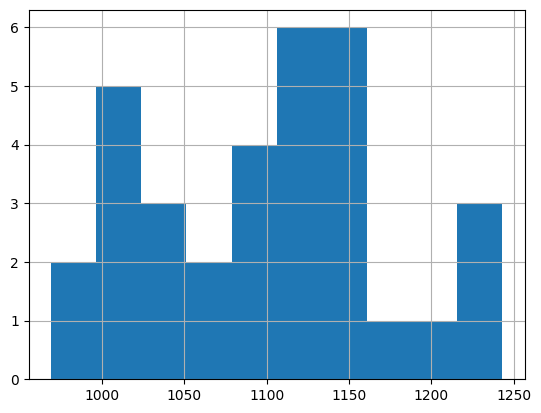

In [12]:
df_processado['2017-01-01'].replace('-',pd.NA).hist()

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

## Gráfico de Densidade

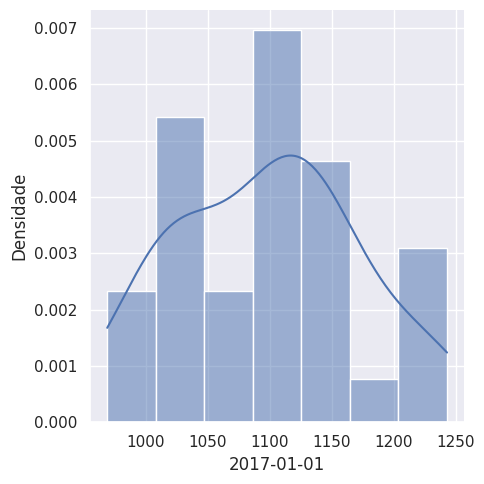

In [14]:
df_processado['2017-01-01'] = df_processado['2017-01-01'].replace('-',None).astype(float)

ax = sns.displot(df_processado, x='2017-01-01', stat='density', kde=True)
ax.set(xlabel='2017-01-01', ylabel='Densidade')

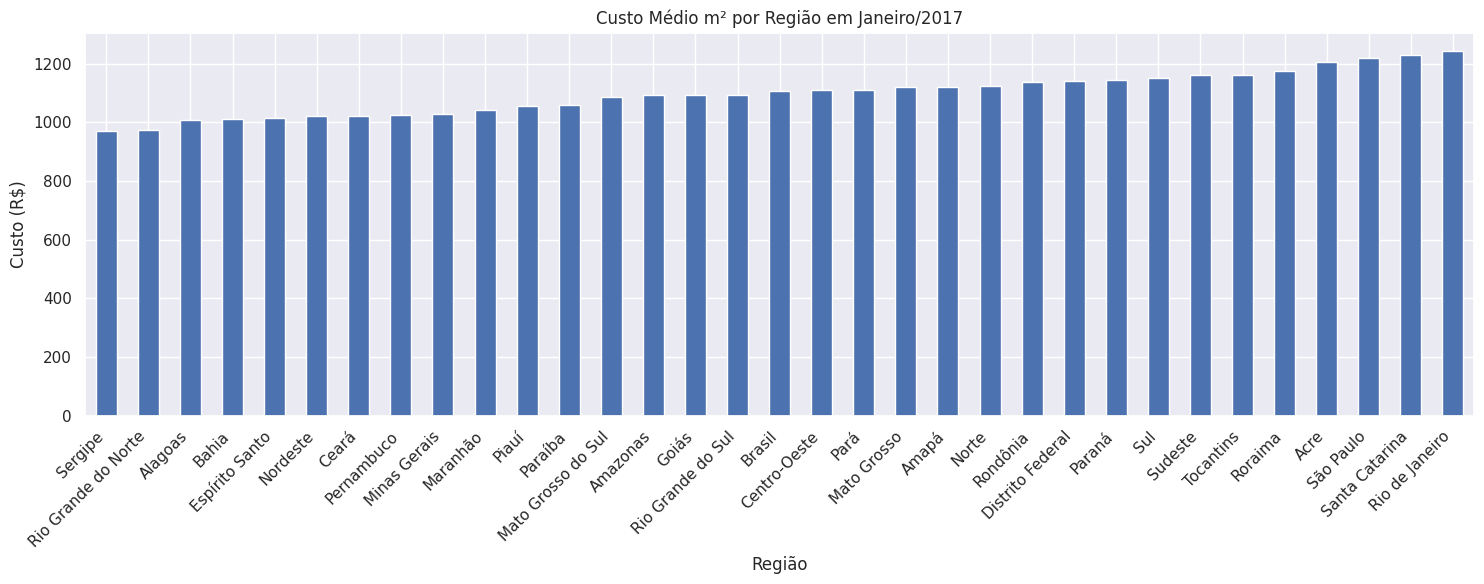


Custo Médio m² por Região em Janeiro/2017 (ordenado do menor para o maior):
Regiao
Sergipe                 969.15
Rio Grande do Norte     973.68
Alagoas                1006.68
Bahia                  1010.61
Espírito Santo         1016.40
Nordeste               1021.84
Ceará                  1022.27
Pernambuco             1025.25
Minas Gerais           1028.27
Maranhão               1042.67
Piauí                  1055.94
Paraíba                1060.53
Mato Grosso do Sul     1085.05
Amazonas               1092.31
Goiás                  1092.84
Rio Grande do Sul      1092.97
Brasil                 1107.94
Centro-Oeste           1110.83
Pará                   1111.79
Mato Grosso            1120.12
Amapá                  1120.39
Norte                  1122.42
Rondônia               1138.83
Distrito Federal       1141.24
Paraná                 1144.93
Sul                    1152.70
Sudeste                1160.28
Tocantins              1160.82
Roraima                1173.59
Acre             

In [15]:
# Criar gráfico de barras dos custos por região
plt.figure(figsize=(15, 6))
df_processado.set_index('Regiao')['2017-01-01'].sort_values(ascending=True).plot(kind='bar')
plt.title('Custo Médio m² por Região em Janeiro/2017')
plt.xlabel('Região')
plt.ylabel('Custo (R$)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# Mostrar também os valores em formato tabular
print("\nCusto Médio m² por Região em Janeiro/2017 (ordenado do menor para o maior):")
valores_ordenados = df_processado.set_index('Regiao')['2017-01-01'].sort_values()
print(valores_ordenados.round(2))

# Estatísticas descritivas básicas
print("\nEstatísticas Descritivas:")
print(df_processado['2017-01-01'].describe().round(2))

# Gráficos

## Gráfico de barras

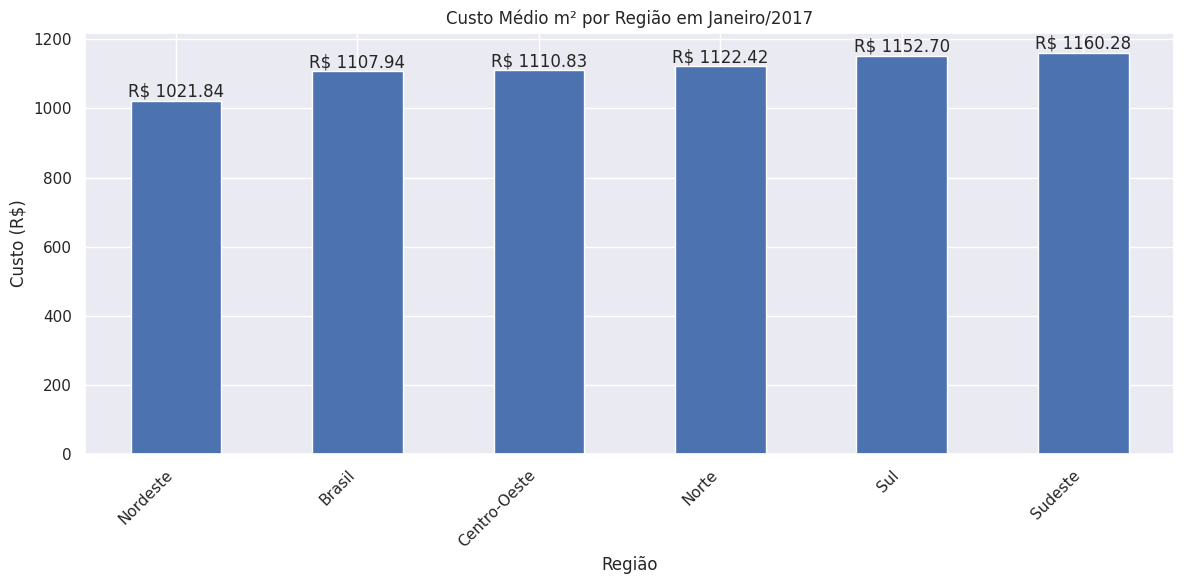


Custo Médio m² por Região em Janeiro/2017 (ordenado do menor para o maior):
Regiao
Nordeste        1021.84
Brasil          1107.94
Centro-Oeste    1110.83
Norte           1122.42
Sul             1152.70
Sudeste         1160.28
Name: 2017-01-01, dtype: float64

Estatísticas Descritivas:
count       6.00
mean     1112.67
std        49.48
min      1021.84
25%      1108.66
50%      1116.62
75%      1145.13
max      1160.28
Name: 2017-01-01, dtype: float64


In [16]:
# Selecionar apenas as regiões principais (BR e GR)
regioes_principais = df_processado[df_processado['Nivel'].isin(['BR', 'GR'])]

# Criar gráfico de barras dos custos por região
plt.figure(figsize=(12, 6))
valores_regiao = regioes_principais.set_index('Regiao')['2017-01-01']
valores_ordenados = valores_regiao.sort_values(ascending=True)

# Plotar o gráfico de barras
ax = valores_ordenados.plot(kind='bar')
plt.title('Custo Médio m² por Região em Janeiro/2017')
plt.xlabel('Região')
plt.ylabel('Custo (R$)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')

# Adicionar valores nas barras
for i, v in enumerate(valores_ordenados):
    ax.text(i, v, f'R$ {v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Mostrar também os valores em formato tabular
print("\nCusto Médio m² por Região em Janeiro/2017 (ordenado do menor para o maior):")
print(valores_ordenados.round(2))

# Estatísticas descritivas básicas
print("\nEstatísticas Descritivas:")
print(valores_regiao.describe().round(2))

In [17]:
# Selecionar apenas as regiões principais (BR e GR)


## Scatterplot

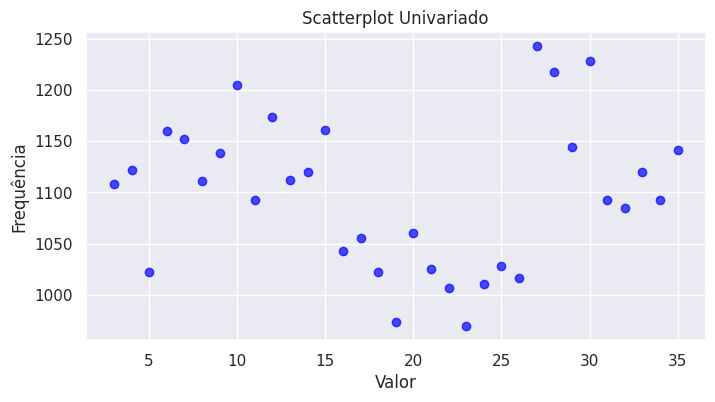

In [18]:
# Gerando dados aleatórios para uma variável univariada
data = df_processado['2017-01-01']
indices = df_processado.index

plt.figure(figsize=(8, 4))
plt.scatter(indices, data, color='blue', alpha=0.7)
plt.title("Scatterplot Univariado")
plt.xlabel("Valor")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()

Como tem região e estados, pode ser interessante fazer um scatterplot com os valores de cada região e seus estados.

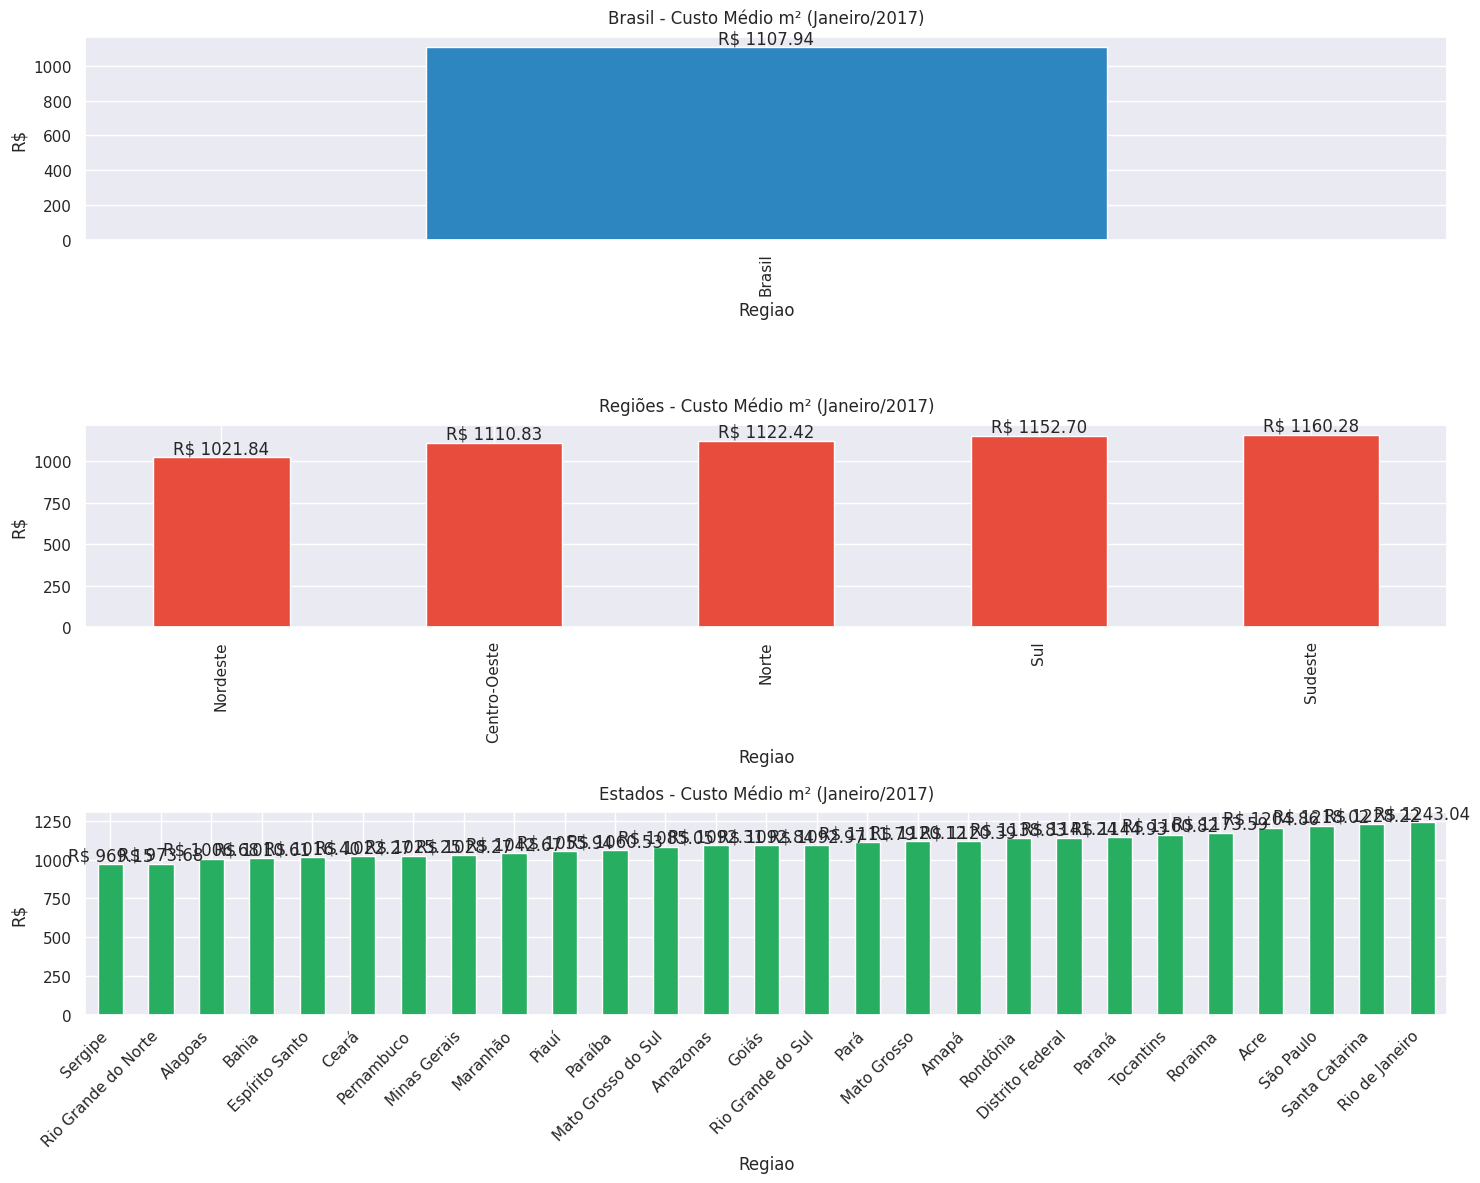


1. Brasil:
        2017-01-01
Regiao            
Brasil     1107.94

2. Regiões (ordenado por valor):
Regiao
Nordeste        1021.84
Centro-Oeste    1110.83
Norte           1122.42
Sul             1152.70
Sudeste         1160.28
Name: 2017-01-01, dtype: float64

3. Estados (ordenado por valor):
Regiao
Sergipe                 969.15
Rio Grande do Norte     973.68
Alagoas                1006.68
Bahia                  1010.61
Espírito Santo         1016.40
Ceará                  1022.27
Pernambuco             1025.25
Minas Gerais           1028.27
Maranhão               1042.67
Piauí                  1055.94
Paraíba                1060.53
Mato Grosso do Sul     1085.05
Amazonas               1092.31
Goiás                  1092.84
Rio Grande do Sul      1092.97
Pará                   1111.79
Mato Grosso            1120.12
Amapá                  1120.39
Rondônia               1138.83
Distrito Federal       1141.24
Paraná                 1144.93
Tocantins              1160.82
Roraima       

In [19]:
# Separar os dados
df_brasil = df_processado[df_processado['Nivel'] == 'BR']
df_regioes = df_processado[df_processado['Nivel'] == 'GR']
df_estados = df_processado[df_processado['Nivel'] == 'UF']

# Criar uma figura com três subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))

# 1. Gráfico para Brasil
df_brasil.set_index('Regiao')['2017-01-01'].plot(kind='bar', ax=ax1, color='#2E86C1')
ax1.set_title('Brasil - Custo Médio m² (Janeiro/2017)', pad=10)
ax1.set_ylabel('R$')
for i, v in enumerate(df_brasil['2017-01-01']):
    ax1.text(i, v, f'R$ {v:.2f}', ha='center', va='bottom')

# 2. Gráfico para Regiões
valores_regioes = df_regioes.set_index('Regiao')['2017-01-01'].sort_values(ascending=True)
valores_regioes.plot(kind='bar', ax=ax2, color='#E74C3C')
ax2.set_title('Regiões - Custo Médio m² (Janeiro/2017)', pad=10)
ax2.set_ylabel('R$')
for i, v in enumerate(valores_regioes):
    ax2.text(i, v, f'R$ {v:.2f}', ha='center', va='bottom')

# 3. Gráfico para Estados
valores_estados = df_estados.set_index('Regiao')['2017-01-01'].sort_values(ascending=True)
valores_estados.plot(kind='bar', ax=ax3, color='#27AE60')
ax3.set_title('Estados - Custo Médio m² (Janeiro/2017)', pad=10)
ax3.set_ylabel('R$')
for i, v in enumerate(valores_estados):
    ax3.text(i, v, f'R$ {v:.2f}', ha='center', va='bottom')

# Ajustes de layout
plt.xticks(rotation=45, ha='right')
for ax in [ax1, ax2, ax3]:
    ax.grid(True, axis='y')
plt.tight_layout()
plt.show()

# Exibir os valores em tabelas
print("\n1. Brasil:")
print(df_brasil[['Regiao', '2017-01-01']].set_index('Regiao'))

print("\n2. Regiões (ordenado por valor):")
print(valores_regioes.round(2))

print("\n3. Estados (ordenado por valor):")
print(valores_estados.round(2))

# Estatísticas descritivas por grupo
print("\nEstatísticas Descritivas por Grupo:")
print("\nRegiões:")
print(df_regioes['2017-01-01'].describe().round(2))
print("\nEstados:")
print(df_estados['2017-01-01'].describe().round(2))

## Plotanto evolução de preços por região

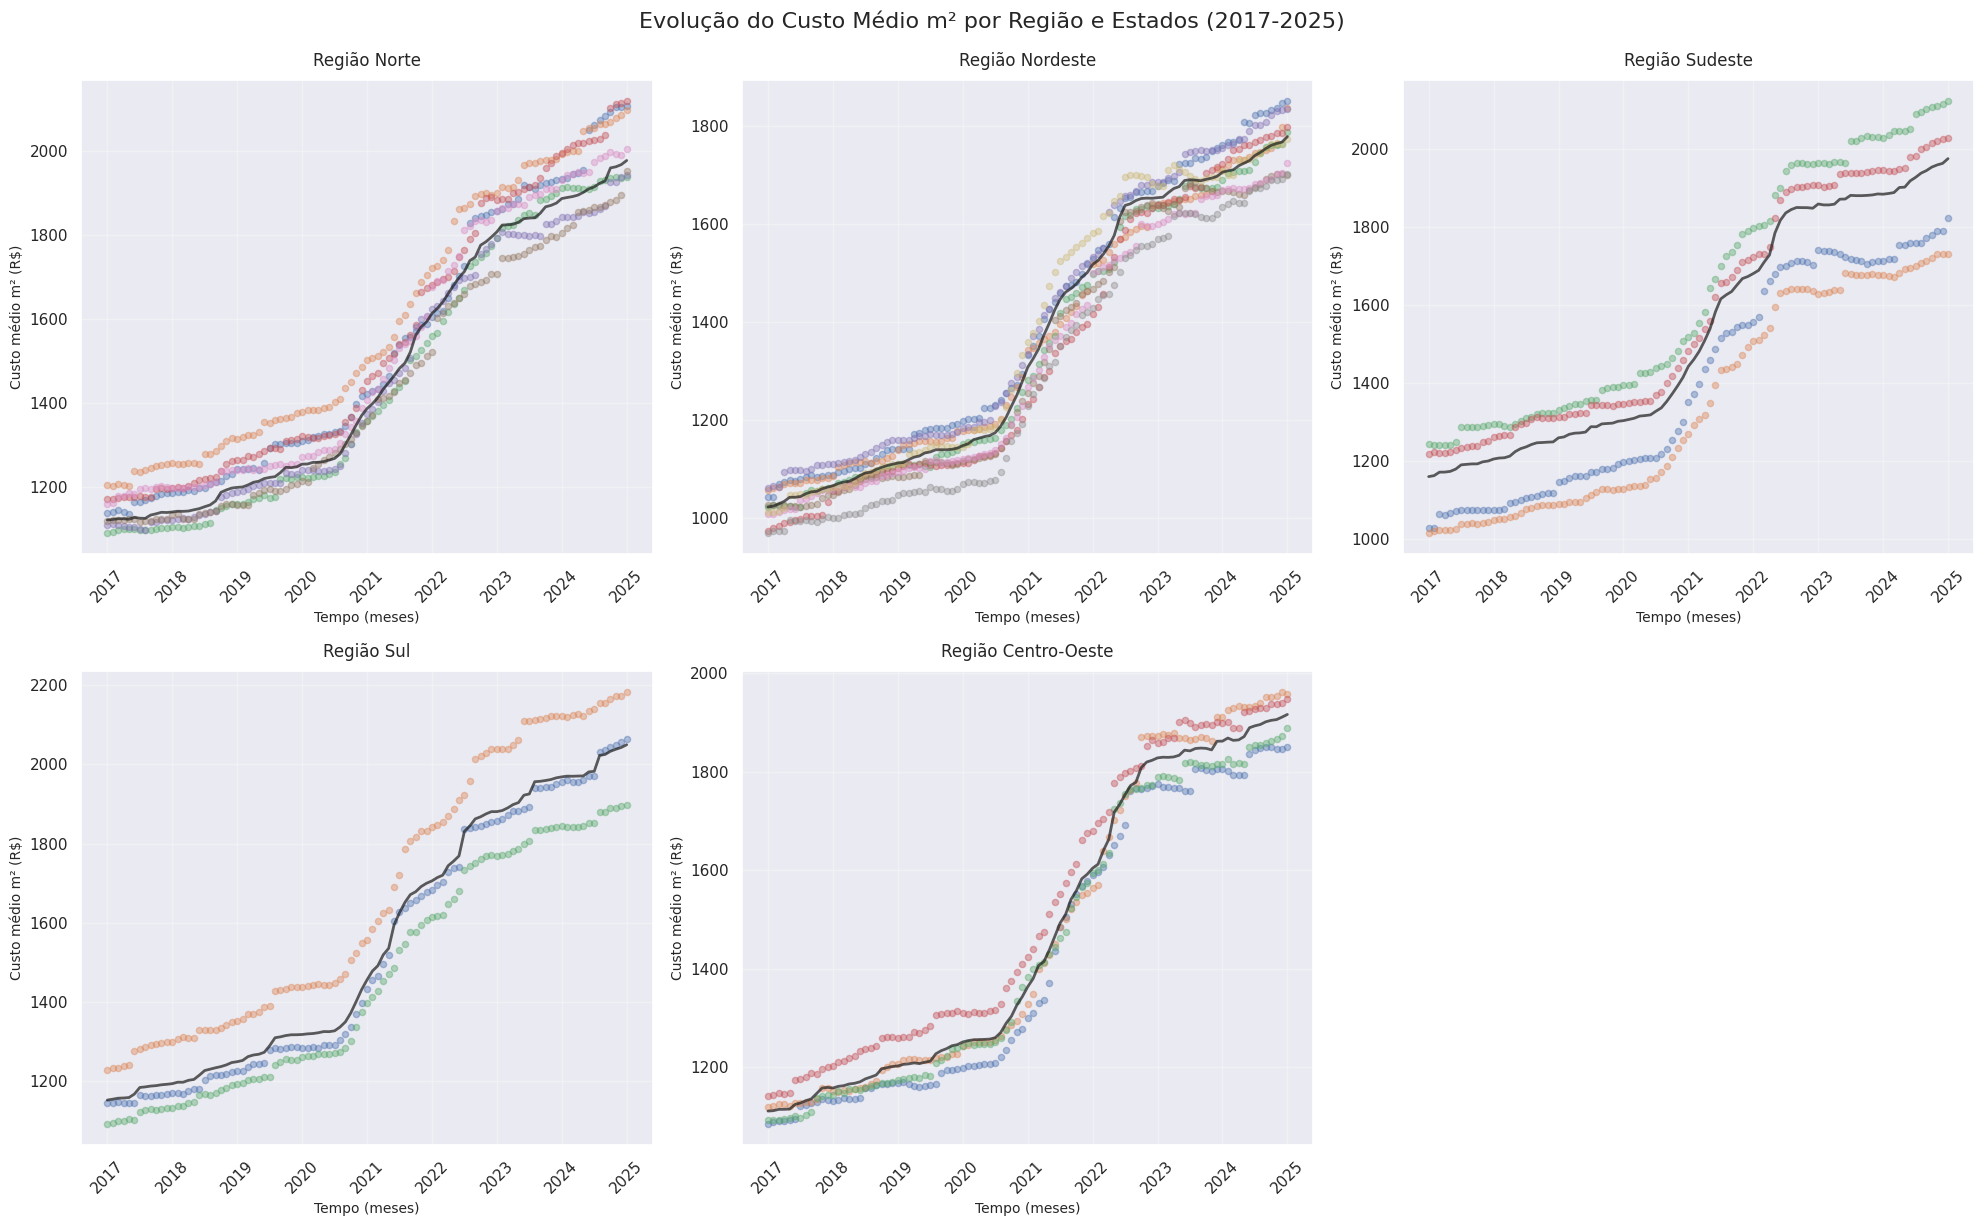

In [20]:
# Primeiro, vamos criar um dicionário com as regiões e seus estados
regioes_estados = {
    'Norte': df_estados[df_estados['Regiao'].isin(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins'])],
    'Nordeste': df_estados[df_estados['Regiao'].isin(['Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia'])],
    'Sudeste': df_estados[df_estados['Regiao'].isin(['Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo'])],
    'Sul': df_estados[df_estados['Regiao'].isin(['Paraná', 'Santa Catarina', 'Rio Grande do Sul'])],
    'Centro-Oeste': df_estados[df_estados['Regiao'].isin(['Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'])]
}

# Criar figura com subplots para cada região
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

cores = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC']

for idx, (regiao, estados) in enumerate(regioes_estados.items()):
    ax = axes[idx]
    
    # Pegar os dados da região
    regiao_dados = df_regioes[df_regioes['Regiao'] == regiao]
    
    # Plotar dados da região
    colunas_datas = [col for col in df_processado.columns if col.startswith('20')]
    valores_regiao = regiao_dados[colunas_datas].values.flatten()
    
    # Criar array de tempo para x
    tempo = range(len(valores_regiao))
    
    # Plotar região
    ax.plot(tempo, valores_regiao, 'k-', label=regiao, linewidth=2, alpha=0.7)
    
    # Plotar estados
    for _, estado in estados.iterrows():
        valores_estado = estado[colunas_datas].values
        ax.scatter(tempo, valores_estado, alpha=0.4, s=20)
    
    # Configurações do gráfico
    ax.set_title(f'Região {regiao}', pad=10, fontsize=12)
    ax.set_xlabel('Tempo (meses)', fontsize=10)
    ax.set_ylabel('Custo médio m² (R$)', fontsize=10)
    ax.grid(True, alpha=0.3)
    
    # Adicionar anos como xticks
    anos = range(2017, 2026)
    posicoes_anos = [i * 12 for i in range(len(anos))]
    ax.set_xticks(posicoes_anos)
    ax.set_xticklabels(anos, rotation=45)

# Remover o último subplot vazio
axes[-1].remove()

# Ajustar layout
plt.tight_layout()

# Adicionar título geral
fig.suptitle('Evolução do Custo Médio m² por Região e Estados (2017-2025)', 
            fontsize=16, y=1.02)

plt.show()

# 

Fica clara a valoração temporal dos dados 

Este código cria:
Um painel de Scatterplots com 5 gráficos (um para cada região):
Linha preta sólida: representa a tendência da região
Pontos coloridos: representam os estados daquela região
Eixo X: tempo (2017-2025)
Eixo Y: custo médio por m²
Características dos gráficos:
Grid para melhor visualização
Rótulos claros nos eixos
Anos marcados no eixo X
Transparência nos pontos para melhor visualização de sobreposições
Análise estatística:
Cálculo da correlação média entre cada região e seus estados
Desvio padrão das correlações para avaliar a consistência
Esta visualização permite:
Identificar padrões de comportamento entre estados e suas regiões
Detectar outliers (estados com comportamento muito diferente da região)
Analisar a evolução temporal dos custos
Verificar a homogeneidade/heterogeneidade dentro de cada região
Os valores de correlação ajudam a quantificar o quanto os estados seguem o padrão de suas respectivas regiões.

## Boxplot

/tmp/ipykernel_1541/1463007433.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados_regioes, x='Regiao', y='Custo', ax=ax1,
/tmp/ipykernel_1541/1463007433.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados_regioes, x='Ano', y='Custo', ax=ax2,
/tmp/ipykernel_1541/1463007433.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados_estados, x='Regiao', y='Custo', ax=ax3,
/tmp/ipykernel_1541/1463007433.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. As

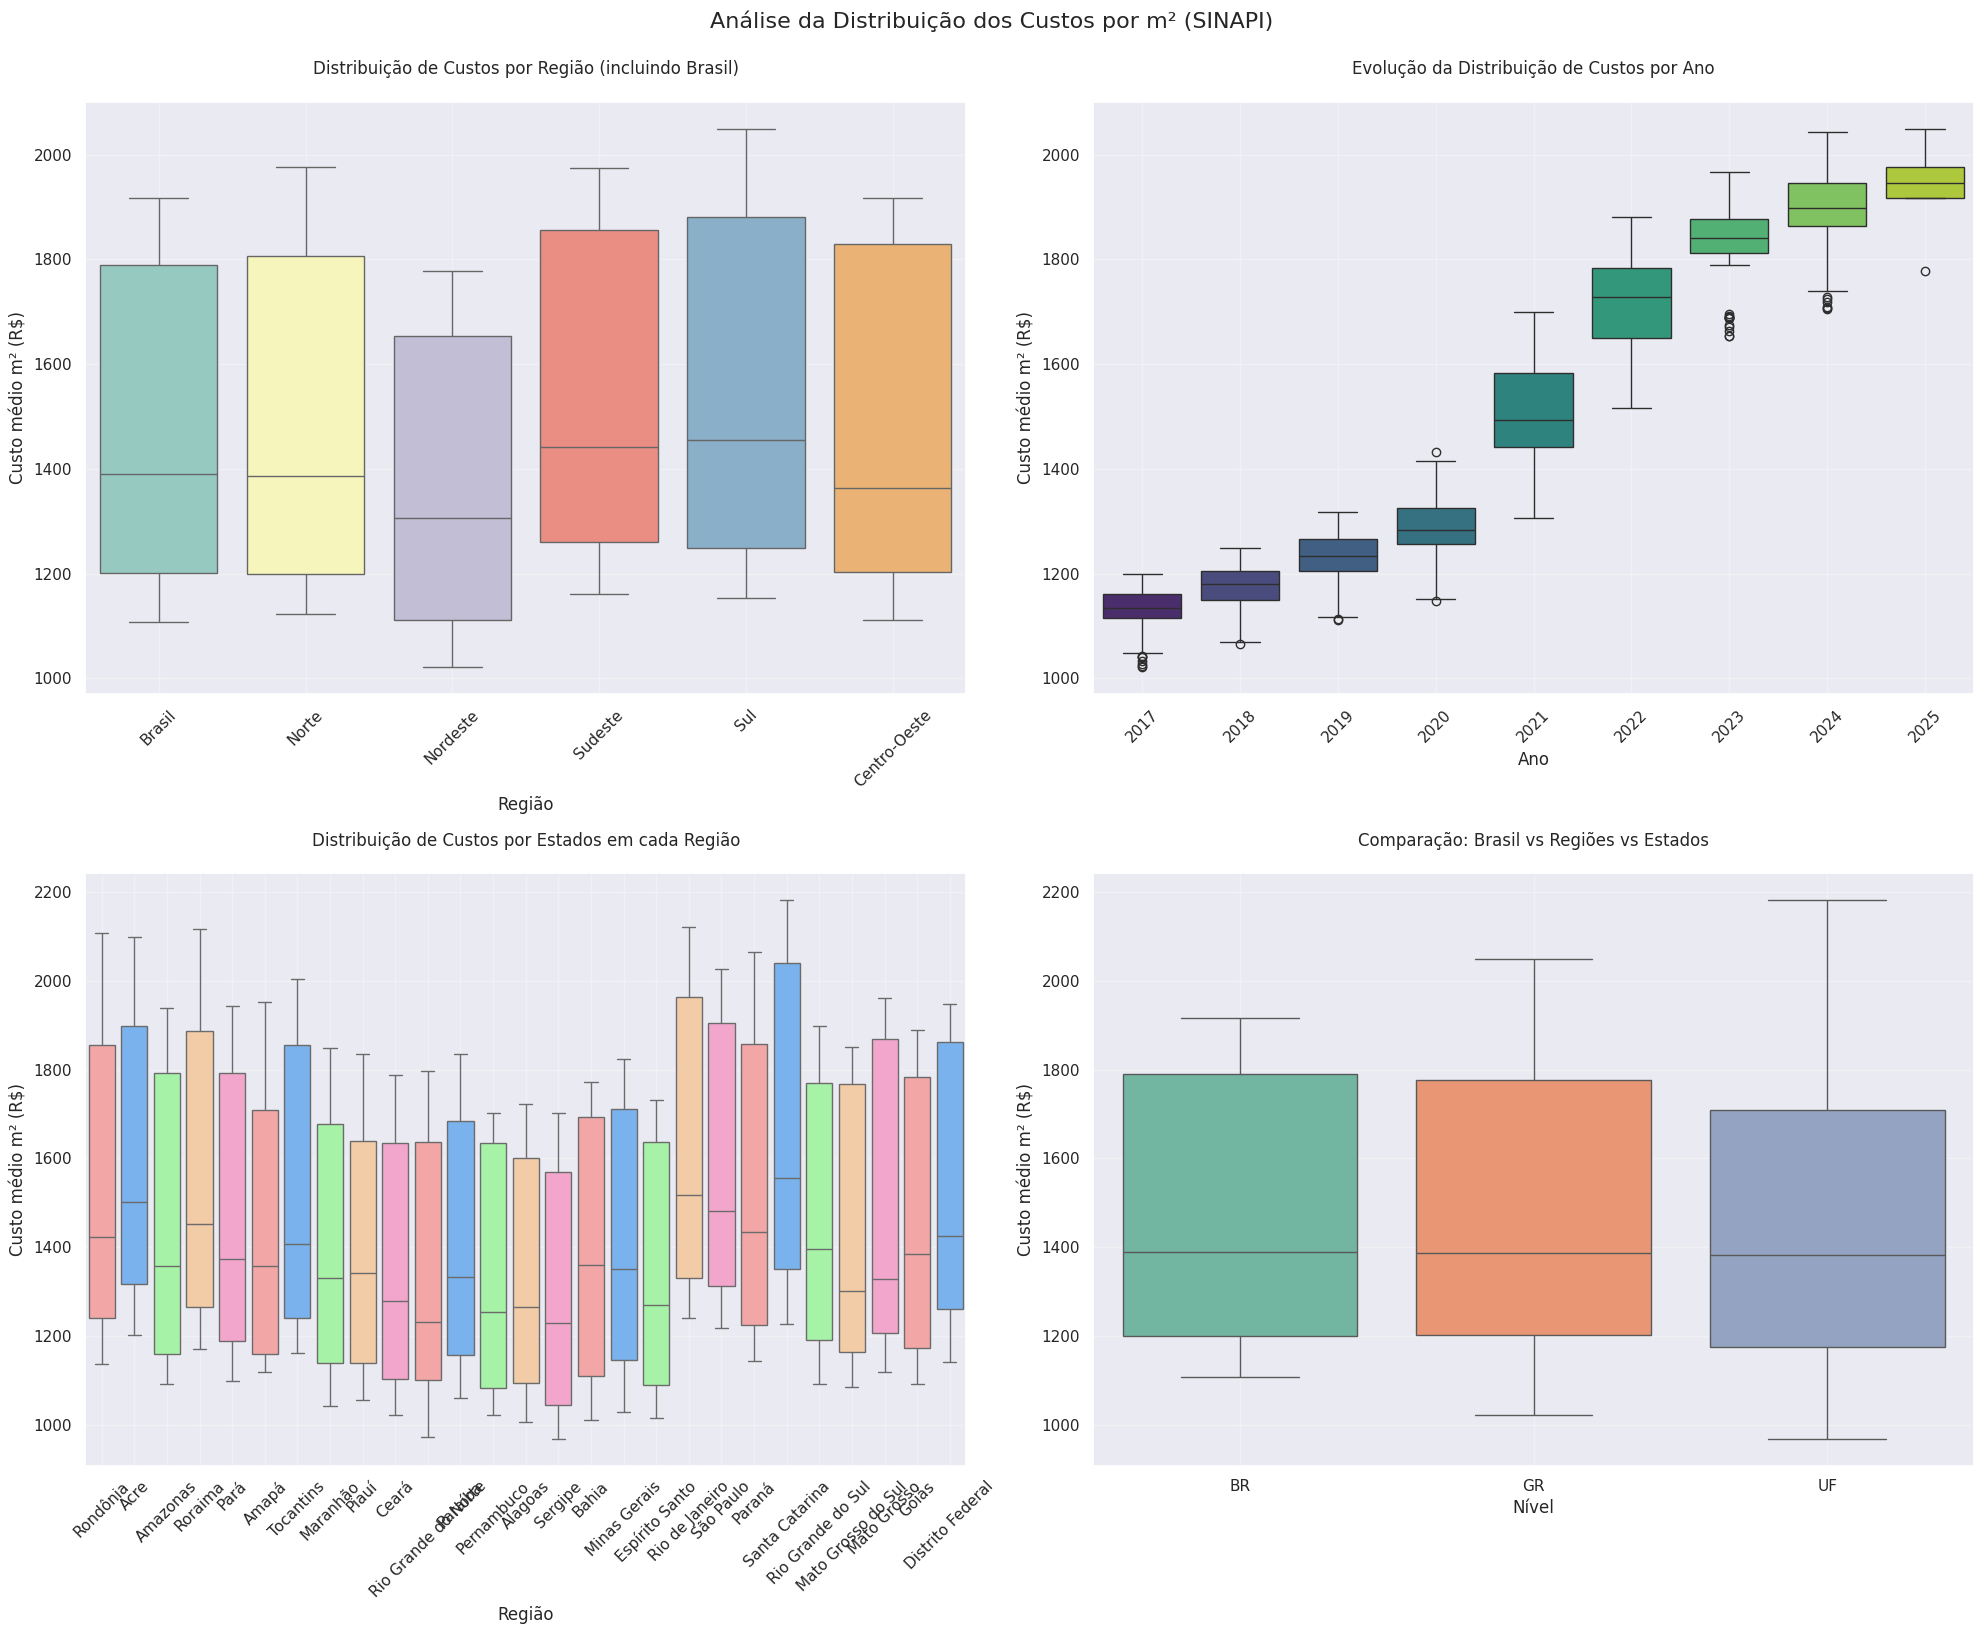


Estatísticas Descritivas por Nível:

BR:
count      97.00
mean     1469.21
std       289.39
min      1107.94
25%      1201.26
50%      1389.40
75%      1789.58
max      1917.13
Name: Custo, dtype: float64

GR:
count     485.00
mean     1477.13
std       301.82
min      1021.84
25%      1202.51
50%      1387.39
75%      1775.62
max      2049.35
Name: Custo, dtype: float64

UF:
count    2619.00
mean     1451.58
std       305.89
min       969.15
25%      1176.14
50%      1383.23
75%      1709.96
max      2181.25
Name: Custo, dtype: float64

Estatísticas Descritivas por Região (excluindo Brasil):

Norte:
count      97.00
mean     1473.96
std       302.73
min      1122.42
25%      1200.14
50%      1387.39
75%      1807.28
max      1976.87
Name: Custo, dtype: float64

Nordeste:
count      97.00
mean     1364.34
std       270.38
min      1021.84
25%      1111.29
50%      1306.65
75%      1652.89
max      1777.43
Name: Custo, dtype: float64

Sudeste:
count      97.00
mean     1528.42
std     

In [21]:
# Criar figura com subplots para diferentes análises
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# 1. Boxplot por Região (incluindo Brasil)
colunas_datas = [col for col in df_processado.columns if col.startswith('20')]
dados_regioes = pd.melt(df_processado[df_processado['Nivel'].isin(['BR', 'GR'])],
                        id_vars=['Nivel', 'Regiao'],
                        value_vars=colunas_datas,
                        var_name='Data',
                        value_name='Custo')

sns.boxplot(data=dados_regioes, x='Regiao', y='Custo', ax=ax1, 
            palette='Set3', showfliers=True)
ax1.set_title('Distribuição de Custos por Região (incluindo Brasil)', pad=20)
ax1.set_xlabel('Região')
ax1.set_ylabel('Custo médio m² (R$)')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# 2. Boxplot por Ano
dados_regioes['Ano'] = dados_regioes['Data'].str[:4]
sns.boxplot(data=dados_regioes, x='Ano', y='Custo', ax=ax2,
            palette='viridis', showfliers=True)
ax2.set_title('Evolução da Distribuição de Custos por Ano', pad=20)
ax2.set_xlabel('Ano')
ax2.set_ylabel('Custo médio m² (R$)')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

# 3. Boxplot Estados por Região
dados_estados = pd.melt(df_processado[df_processado['Nivel'] == 'UF'],
                       id_vars=['Nivel', 'Regiao'],
                       value_vars=colunas_datas,
                       var_name='Data',
                       value_name='Custo')

# Criar um mapa de cores para as regiões
cores_regioes = {
    'Norte': '#FF9999',
    'Nordeste': '#66B2FF',
    'Sudeste': '#99FF99',
    'Sul': '#FFCC99',
    'Centro-Oeste': '#FF99CC'
}

sns.boxplot(data=dados_estados, x='Regiao', y='Custo', ax=ax3,
            palette=cores_regioes.values(), showfliers=True)
ax3.set_title('Distribuição de Custos por Estados em cada Região', pad=20)
ax3.set_xlabel('Região')
ax3.set_ylabel('Custo médio m² (R$)')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3)

# 4. Boxplot Comparativo Brasil vs Regiões vs Estados
dados_todos = pd.melt(df_processado,
                      id_vars=['Nivel', 'Regiao'],
                      value_vars=colunas_datas,
                      var_name='Data',
                      value_name='Custo')

sns.boxplot(data=dados_todos, x='Nivel', y='Custo', ax=ax4,
            palette='Set2', showfliers=True)
ax4.set_title('Comparação: Brasil vs Regiões vs Estados', pad=20)
ax4.set_xlabel('Nível')
ax4.set_ylabel('Custo médio m² (R$)')
ax4.grid(True, alpha=0.3)

# Ajustar layout
plt.tight_layout()

# Adicionar título geral
fig.suptitle('Análise da Distribuição dos Custos por m² (SINAPI)', 
             fontsize=16, y=1.02)

plt.show()

# Estatísticas descritivas
print("\nEstatísticas Descritivas por Nível:")
for nivel in ['BR', 'GR', 'UF']:
    print(f"\n{nivel}:")
    stats = dados_todos[dados_todos['Nivel'] == nivel]['Custo'].describe()
    print(stats.round(2))

print("\nEstatísticas Descritivas por Região (excluindo Brasil):")
for regiao in dados_regioes['Regiao'].unique():
    if regiao != 'Brasil':
        print(f"\n{regiao}:")
        stats = dados_regioes[dados_regioes['Regiao'] == regiao]['Custo'].describe()
        print(stats.round(2))

Este código cria quatro boxplots diferentes:
Distribuição por Região (incluindo Brasil):
Mostra a variação dos custos em cada região
Inclui o Brasil como referência
Permite identificar outliers
Evolução Temporal (por Ano):
Mostra como a distribuição dos custos mudou ao longo dos anos
Permite identificar tendências e variações sazonais
Facilita a visualização do aumento dos custos
Estados por Região:
Mostra a distribuição dos custos dos estados em cada região
Permite identificar heterogeneidade dentro das regiões
Usa cores diferentes para cada região
Comparativo por Nível:
Compara a distribuição entre Brasil, Regiões e Estados
Permite avaliar a variabilidade em cada nível
Ajuda a identificar discrepâncias entre níveis
Características dos gráficos:
Grid para melhor visualização
Outliers incluídos para análise completa
Cores distintas para melhor diferenciação
Rótulos claros e orientação adequada
Além disso, o código fornece estatísticas descritivas detalhadas para cada nível e região, incluindo:
Média
Desvio padrão
Valores mínimos e máximos
Quartis
Contagem de observações

<a href="https://colab.research.google.com/github/stefanomozart/estatistica_descritiva/blob/main/Exercicios/ED_Aula03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medidas de tendência central

In [22]:
# Configuração para exibir mais casas decimais
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Média aritimética

In [23]:
# Célula 2 - Preparação dos dados
# Selecionando apenas as colunas numéricas (datas)
colunas_datas = [col for col in df_processado.columns if col.startswith('20')]
dados_numericos = df_processado[colunas_datas]

# Calculando médias por nível
medias_por_nivel = df_processado.groupby('Nivel')[colunas_datas].mean()
print("Médias por Nível (primeiros valores):")
print(medias_por_nivel.iloc[:, :3])  # Mostrando apenas as 3 primeiras colunas

Médias por Nível (primeiros valores):
       2017-01-01  2017-02-01  2017-03-01
Nivel                                    
BR        1107.94     1109.95     1115.44
GR        1113.61     1115.38     1119.43
UF        1095.57     1097.44     1101.79


Média Aritmética por Região (Janeiro/2017):
Regiao
Acre                  1204.86
Alagoas               1006.68
Amapá                 1120.39
Amazonas              1092.31
Bahia                 1010.61
Brasil                1107.94
Ceará                 1022.27
Centro-Oeste          1110.83
Distrito Federal      1141.24
Espírito Santo        1016.40
Goiás                 1092.84
Maranhão              1042.67
Mato Grosso           1120.12
Mato Grosso do Sul    1085.05
Minas Gerais          1028.27
Nordeste              1021.84
Norte                 1122.42
Paraná                1144.93
Paraíba               1060.53
Pará                  1111.79
Pernambuco            1025.25
Piauí                 1055.94
Rio Grande do Norte    973.68
Rio Grande do Sul     1092.97
Rio de Janeiro        1243.04
Rondônia              1138.83
Roraima               1173.59
Santa Catarina        1228.22
Sergipe                969.15
Sudeste               1160.28
Sul                   1152.70
São Paulo          

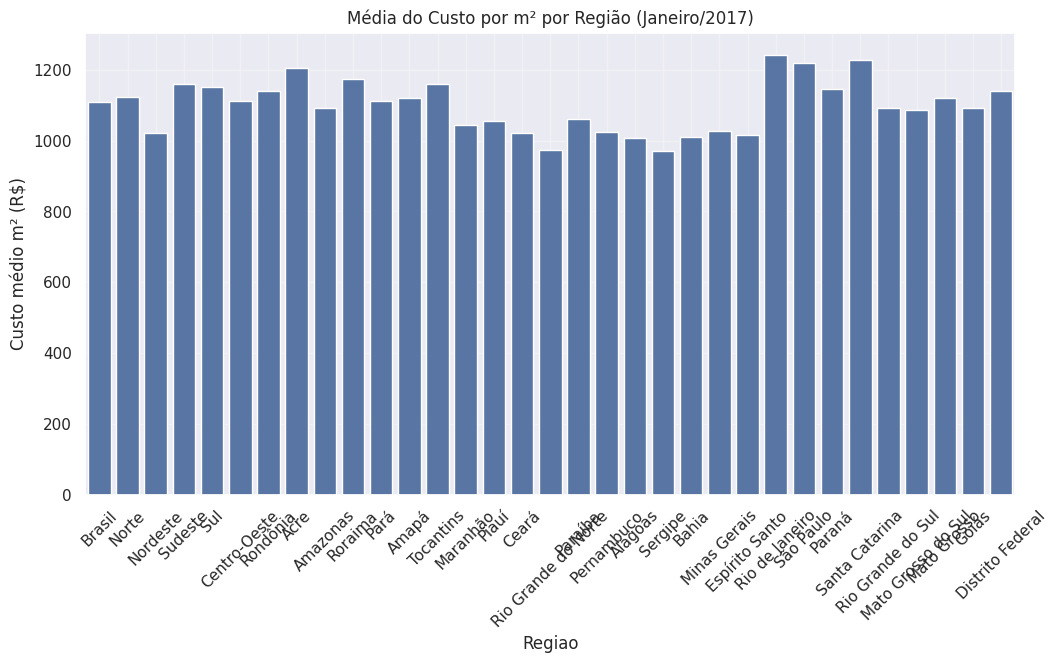

In [24]:
# Média Aritmética
print("Média Aritmética por Região (Janeiro/2017):")
print(df_processado.groupby('Regiao')['2017-01-01'].mean().round(2))

# Visualização da média
plt.figure(figsize=(12, 6))
sns.barplot(data=df_processado, x='Regiao', y='2017-01-01')
plt.title('Média do Custo por m² por Região (Janeiro/2017)')
plt.xticks(rotation=45)
plt.ylabel('Custo médio m² (R$)')
plt.grid(True, alpha=0.3)
plt.show()

## Moda

Moda por Região (Janeiro/2017):
Regiao
Acre                  1204.86
Alagoas               1006.68
Amapá                 1120.39
Amazonas              1092.31
Bahia                 1010.61
Brasil                1107.94
Ceará                 1022.27
Centro-Oeste          1110.83
Distrito Federal      1141.24
Espírito Santo        1016.40
Goiás                 1092.84
Maranhão              1042.67
Mato Grosso           1120.12
Mato Grosso do Sul    1085.05
Minas Gerais          1028.27
Nordeste              1021.84
Norte                 1122.42
Paraná                1144.93
Paraíba               1060.53
Pará                  1111.79
Pernambuco            1025.25
Piauí                 1055.94
Rio Grande do Norte    973.68
Rio Grande do Sul     1092.97
Rio de Janeiro        1243.04
Rondônia              1138.83
Roraima               1173.59
Santa Catarina        1228.22
Sergipe                969.15
Sudeste               1160.28
Sul                   1152.70
São Paulo             1218.02
T

/tmp/ipykernel_1541/4218629740.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_processado, x='2017-01-01', hue='Nivel')


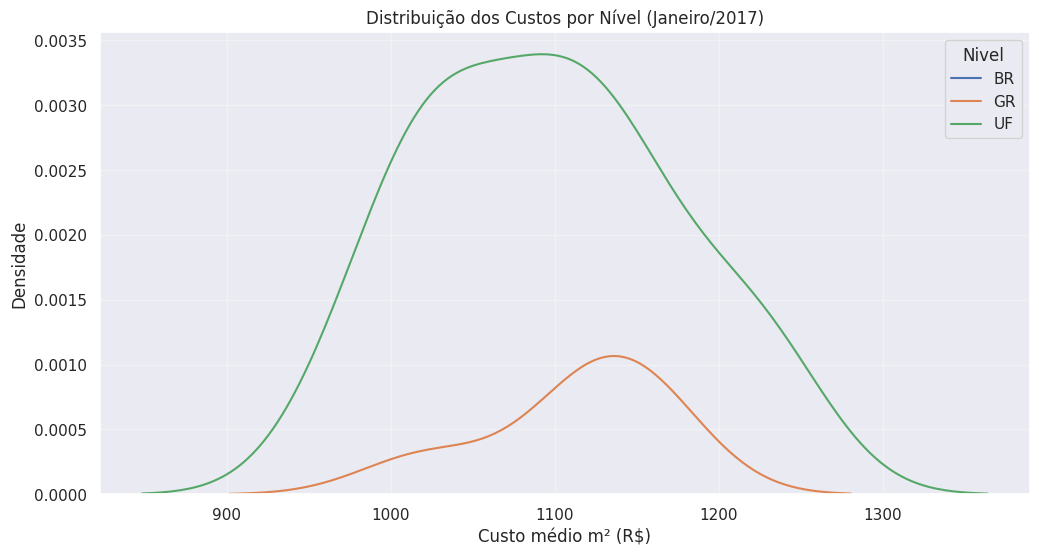

In [27]:
print("Moda por Região (Janeiro/2017):")
print(df_processado.groupby('Regiao')['2017-01-01'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None))

# Visualização da distribuição
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_processado, x='2017-01-01', hue='Nivel')
plt.title('Distribuição dos Custos por Nível (Janeiro/2017)')
plt.xlabel('Custo médio m² (R$)')
plt.ylabel('Densidade')
plt.grid(True, alpha=0.3)
plt.show()

## Mediana

In [30]:
print("Mediana por Região (Janeiro/2017):")
print(df_processado.groupby('Regiao')['2017-01-01'].median().round(2))

# Comparação das medidas centrais
medidas_centrais = pd.DataFrame({
    'Média': df_processado.groupby('Regiao')['2017-01-01'].mean(),
    'Mediana': df_processado.groupby('Regiao')['2017-01-01'].median(),
    'Moda': df_processado.groupby('Regiao')['2017-01-01'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
}).round(2)

print("\nComparação das Medidas Centrais:")
print(medidas_centrais)

Mediana por Região (Janeiro/2017):
Regiao
Acre                  1204.86
Alagoas               1006.68
Amapá                 1120.39
Amazonas              1092.31
Bahia                 1010.61
Brasil                1107.94
Ceará                 1022.27
Centro-Oeste          1110.83
Distrito Federal      1141.24
Espírito Santo        1016.40
Goiás                 1092.84
Maranhão              1042.67
Mato Grosso           1120.12
Mato Grosso do Sul    1085.05
Minas Gerais          1028.27
Nordeste              1021.84
Norte                 1122.42
Paraná                1144.93
Paraíba               1060.53
Pará                  1111.79
Pernambuco            1025.25
Piauí                 1055.94
Rio Grande do Norte    973.68
Rio Grande do Sul     1092.97
Rio de Janeiro        1243.04
Rondônia              1138.83
Roraima               1173.59
Santa Catarina        1228.22
Sergipe                969.15
Sudeste               1160.28
Sul                   1152.70
São Paulo             1218.0

In [31]:

df_processado['2017-01-01'].describe()

count     33.00
mean    1098.68
std       73.10
min      969.15
25%     1028.27
50%     1107.94
75%     1144.93
max     1243.04
Name: 2017-01-01, dtype: float64

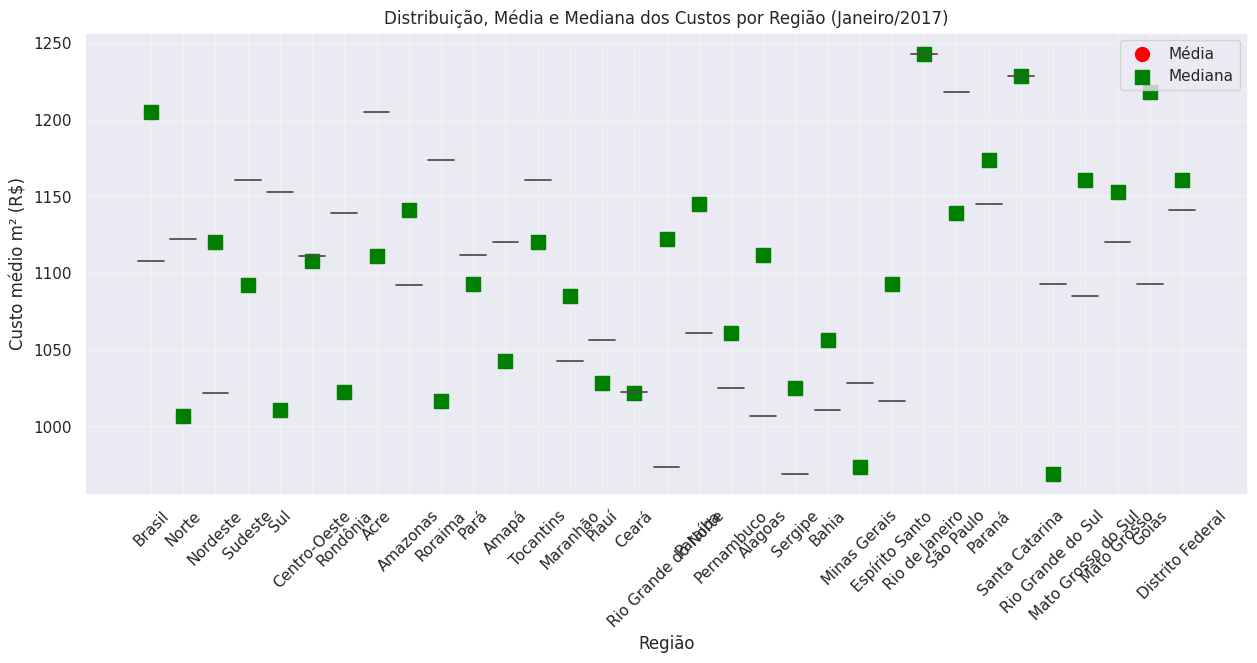

In [32]:
#  Visualização comparativa das medidas centrais
plt.figure(figsize=(15, 6))

# Criar o gráfico de violino
sns.violinplot(data=df_processado, x='Regiao', y='2017-01-01')

# Adicionar pontos para média e mediana
medias = df_processado.groupby('Regiao')['2017-01-01'].mean()
medianas = df_processado.groupby('Regiao')['2017-01-01'].median()

# Plotar médias
plt.scatter(range(len(medias)), medias, color='red', marker='o', s=100, label='Média')
# Plotar medianas
plt.scatter(range(len(medianas)), medianas, color='green', marker='s', s=100, label='Mediana')

plt.title('Distribuição, Média e Mediana dos Custos por Região (Janeiro/2017)')
plt.xlabel('Região')
plt.ylabel('Custo médio m² (R$)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

(900.0, 1343.04)

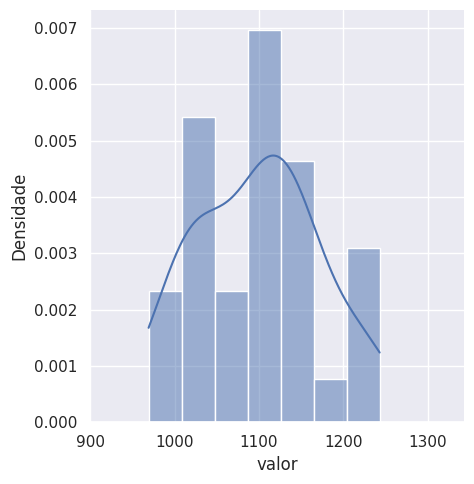

In [33]:
df_processado['2017-01-01'] = df_processado['2017-01-01'].replace('-',None).astype(float)

ax = sns.displot(df_processado, x='2017-01-01', stat='density', kde=True)
ax.set(xlabel='valor', ylabel='Densidade')
plt.axvline(1, 2)
# Ajustar os limites do eixo x começando em 900
plt.xlim(900, df_processado['2017-01-01'].max()+100)

### Célula para visualização com KDE ajustado

/tmp/ipykernel_1541/342494527.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_processado, x='2017-01-01', hue='Nivel', fill=True, alpha=0.5)


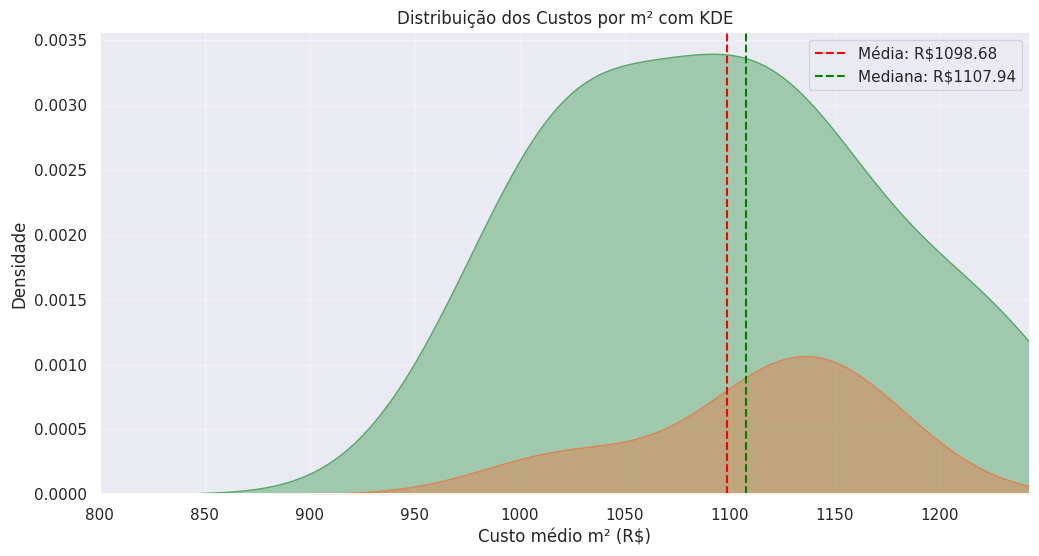


Estatísticas da distribuição:
count     33.00
mean    1098.68
std       73.10
min      969.15
25%     1028.27
50%     1107.94
75%     1144.93
max     1243.04
Name: 2017-01-01, dtype: float64


In [34]:
plt.figure(figsize=(12, 6))

# Criar o gráfico de densidade com KDE
sns.kdeplot(data=df_processado, x='2017-01-01', hue='Nivel', fill=True, alpha=0.5)

# Configurações do gráfico
plt.title('Distribuição dos Custos por m² com KDE')
plt.xlabel('Custo médio m² (R$)')
plt.ylabel('Densidade')

# Ajustar os limites do eixo x começando em 800
plt.xlim(800, df_processado['2017-01-01'].max())

# Adicionar linhas verticais para medidas de tendência central
plt.axvline(x=df_processado['2017-01-01'].mean(), 
            color='red', 
            linestyle='--', 
            label=f'Média: R${df_processado["2017-01-01"].mean():.2f}')

plt.axvline(x=df_processado['2017-01-01'].median(), 
            color='green', 
            linestyle='--', 
            label=f'Mediana: R${df_processado["2017-01-01"].median():.2f}')

# Adicionar grade e legenda
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Exibir estatísticas básicas
print("\nEstatísticas da distribuição:")
print(df_processado['2017-01-01'].describe().round(2))

Estimar a função de densidade de probabilidade KDE (Kernel Density Estimation) de uma variável aleatória. Suaviza a distribuição dos dados para visualizar melhor seu comportamento.

In [35]:
ax = sns.displot(temp, x='j_d', stat='density', kde=True)
ax.set(xlabel='Variação', ylabel='Densidade')
plt.axvline(x=temp.j_d.mode().item(), color='#3d49afff')
plt.axvline(x=temp.j_d.mean(), color='#adc0a9ff')
plt.axvline(x=temp.j_d.median(), color='#b9babfff')

NameError: name 'temp' is not defined

<Figure size 1200x600 with 0 Axes>

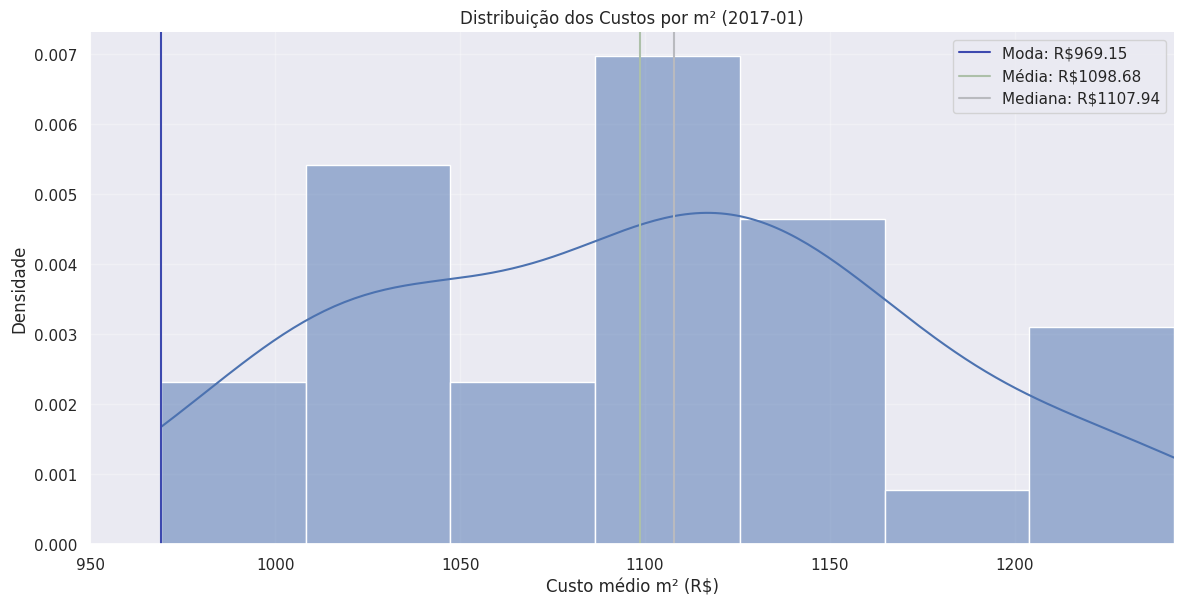


Medidas de Tendência Central:
Moda: R$ 969.15
Média: R$ 1098.68
Mediana: R$ 1107.94


In [34]:
# Célula com visualização adaptada
plt.figure(figsize=(12, 6))

# Criar o gráfico de densidade
ax = sns.displot(df_processado, 
                 x='2017-01-01', 
                 stat='density', 
                 kde=True,
                 height=6,
                 aspect=2)

# Configurações do gráfico
ax.set(xlabel='Custo médio m² (R$)', 
       ylabel='Densidade',
       title='Distribuição dos Custos por m² (2017-01)')

# Ajustar os limites do eixo x começando em 800
plt.xlim(800, df_processado['2017-01-01'].max())

# Adicionar linhas verticais com as cores específicas
# Moda (azul)
plt.axvline(x=df_processado['2017-01-01'].mode().iloc[0], 
            color='#3d49afff',
            label=f'Moda: R${df_processado["2017-01-01"].mode().iloc[0]:.2f}')

# Ajustar os limites do eixo x começando em 800
plt.xlim(950, df_processado['2017-01-01'].max())

# Média (verde claro)
plt.axvline(x=df_processado['2017-01-01'].mean(), 
            color='#adc0a9ff',
            label=f'Média: R${df_processado["2017-01-01"].mean():.2f}')

# Mediana (cinza)
plt.axvline(x=df_processado['2017-01-01'].median(), 
            color='#b9babfff',
            label=f'Mediana: R${df_processado["2017-01-01"].median():.2f}')



# Adicionar grade e legenda
plt.grid(True, alpha=0.3)
plt.legend()

# Exibir o gráfico
plt.show()

# Exibir os valores das medidas de tendência central
print("\nMedidas de Tendência Central:")
print(f"Moda: R$ {df_processado['2017-01-01'].mode().iloc[0]:.2f}")
print(f"Média: R$ {df_processado['2017-01-01'].mean():.2f}")
print(f"Mediana: R$ {df_processado['2017-01-01'].median():.2f}")

## Quartis

In [35]:
df_processado.describe()

2017-01-01  2017-02-01  2017-03-01  2017-04-01  2017-05-01  2017-06-01  \
count       33.00       33.00       33.00       33.00       33.00       33.00   
mean      1098.68     1100.54     1104.87     1106.96     1109.53     1115.21   
std         73.10       72.76       71.90       70.69       68.40       74.15   
min        969.15      971.95      973.31      973.65      991.58      993.79   
25%       1028.27     1029.08     1062.80     1062.96     1066.70     1070.94   
50%       1107.94     1109.95     1110.68     1109.32     1106.76     1106.37   
75%       1144.93     1145.06     1147.98     1145.92     1147.50     1167.92   
max       1243.04     1240.79     1240.07     1242.26     1241.92     1277.12   

       2017-07-01  2017-08-01  2017-09-01  2017-10-01  ...  2024-04-01  \
count       33.00       33.00       33.00       33.00  ...       33.00   
mean      1121.05     1123.86     1126.90     1130.08  ...     1846.87   
std         76.77       76.16       76.09       77.01  ...      122.50   
min        994.17      994.24      993.68      991.40  ...     1641.46   
25%       1071.31     1074.31     1073.67     1073.76  ...     1753.03   
50%       1121.28     1123.19     1127.91     1129.03  ...     1848.40   
75%       1175.81     1177.03     1178.24     1187.16  ...     1948.32   
max       1287.19     1287.41     1291.05     1294.81  ...     2127.42   

       2024-05-01  2024-06-01  2024-07-01  2024-08-01  2024-09-01  2024-10-01  \
count       33.00       33.00       33.00       33.00       33.00       33.00   
mean      1851.87     1863.97     1871.30     1881.13     1886.72     1897.49   
std        123.78      127.01      127.36      131.95      131.02      134.34   
min       1641.62     1665.96     1672.35     1672.72     1677.72     1688.05   
25%       1753.23     1757.78     1759.63     1760.04     1770.98     1777.81   
50%       1853.34     1859.67     1865.57     1880.16     1880.72     1898.57   
75%       1946.71     1949.58     1969.46     1983.88     1986.74     1996.38   
max       2122.27     2135.09     2140.42     2153.98     2155.64     2164.45   

       2024-11-01  2024-12-01  2025-01-01  
count       33.00       33.00       33.00  
mean      1901.79     1906.16     1916.98  
std        134.64      134.45      132.46  
min       1688.65     1690.78     1700.01  
25%       1785.60     1789.85     1824.09  
50%       1902.88     1906.79     1917.13  
75%       1993.33     1988.92     2004.96  
max       2171.58     2172.93     2181.25  

[8 rows x 97 columns]

## Decis e percentis

# Medidas separatrizes

In [37]:
# Célula 1 - Explicação dos Quantis
# Calculando diferentes quantis
q10 = df_processado['2017-01-01'].quantile(.1)  # 10% dos dados estão abaixo deste valor
q25 = df_processado['2017-01-01'].quantile(.25) # 25% dos dados (1º quartil)
q50 = df_processado['2017-01-01'].quantile(.50) # 50% dos dados (mediana)
q75 = df_processado['2017-01-01'].quantile(.75) # 75% dos dados (3º quartil)
q90 = df_processado['2017-01-01'].quantile(.90) # 90% dos dados estão abaixo deste valor

print("Análise dos Quantis:")
print(f"10% dos custos estão abaixo de R$ {q10:.2f}")
print(f"25% dos custos estão abaixo de R$ {q25:.2f}")
print(f"50% dos custos estão abaixo de R$ {q50:.2f}")
print(f"75% dos custos estão abaixo de R$ {q75:.2f}")
print(f"90% dos custos estão abaixo de R$ {q90:.2f}")

Análise dos Quantis:
10% dos custos estão abaixo de R$ 1011.77
25% dos custos estão abaixo de R$ 1028.27
50% dos custos estão abaixo de R$ 1107.94
75% dos custos estão abaixo de R$ 1144.93
90% dos custos estão abaixo de R$ 1198.61


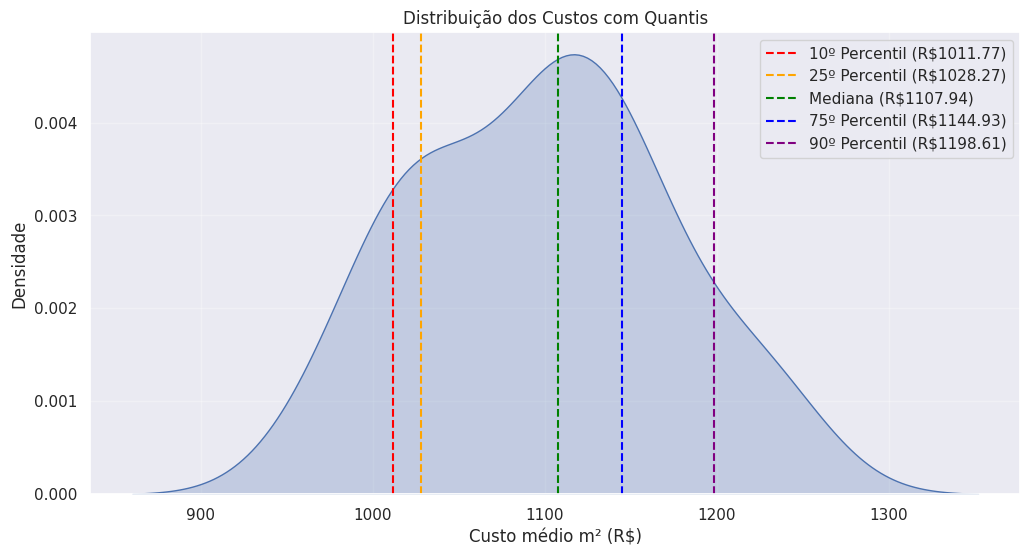

In [38]:
# Célula 2 - Visualização dos Quantis
plt.figure(figsize=(12, 6))

# Criar o gráfico de densidade
sns.kdeplot(data=df_processado['2017-01-01'], fill=True)

# Adicionar linhas verticais para os quantis
plt.axvline(x=q10, color='red', linestyle='--', label=f'10º Percentil (R${q10:.2f})')
plt.axvline(x=q25, color='orange', linestyle='--', label=f'25º Percentil (R${q25:.2f})')
plt.axvline(x=q50, color='green', linestyle='--', label=f'Mediana (R${q50:.2f})')
plt.axvline(x=q75, color='blue', linestyle='--', label=f'75º Percentil (R${q75:.2f})')
plt.axvline(x=q90, color='purple', linestyle='--', label=f'90º Percentil (R${q90:.2f})')

plt.title('Distribuição dos Custos com Quantis')
plt.xlabel('Custo médio m² (R$)')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Medidas de dispersão

## Histograma

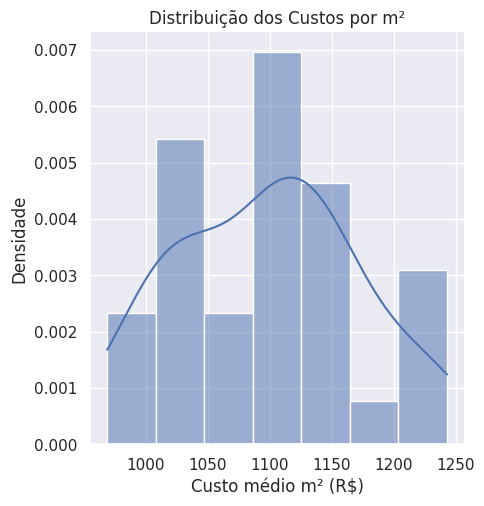

In [39]:
# Célula 1 - Histograma inicial
sns.displot(x=df_processado['2017-01-01'], stat='density', kde=True)
plt.title('Distribuição dos Custos por m²')
plt.xlabel('Custo médio m² (R$)')
plt.ylabel('Densidade')
plt.show()

## Boxplot

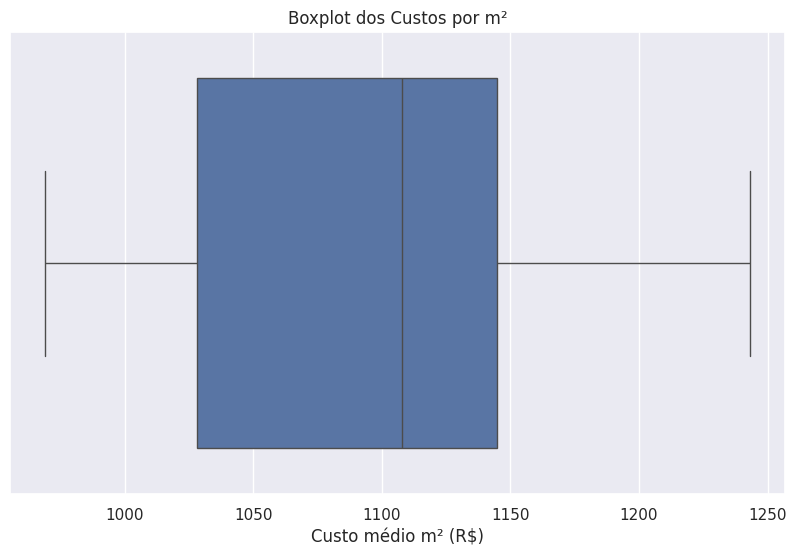

In [40]:
# Célula 2 - 
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_processado['2017-01-01'])
plt.title('Boxplot dos Custos por m²')
plt.xlabel('Custo médio m² (R$)')
plt.show()

## Amplitude amostral

In [41]:
# Célula 3 - Amplitude amostral
A_custos = df_processado['2017-01-01'].max() - df_processado['2017-01-01'].min()
print(f"Amplitude dos custos: R$ {A_custos:.2f}")
print(f"Valor mínimo: R$ {df_processado['2017-01-01'].min():.2f}")
print(f"Valor máximo: R$ {df_processado['2017-01-01'].max():.2f}")

Amplitude dos custos: R$ 273.89
Valor mínimo: R$ 969.15
Valor máximo: R$ 1243.04


## Intervalo Interquartílico

In [42]:
# Célula 4 - Intervalo Interquartílico
Q1_custos = df_processado['2017-01-01'].quantile(0.25)
Q3_custos = df_processado['2017-01-01'].quantile(0.75)

IIQ_custos = Q3_custos - Q1_custos
print(f"Primeiro Quartil (Q1): R$ {Q1_custos:.2f}")
print(f"Terceiro Quartil (Q3): R$ {Q3_custos:.2f}")
print(f"Intervalo Interquartílico: R$ {IIQ_custos:.2f}")

Primeiro Quartil (Q1): R$ 1028.27
Terceiro Quartil (Q3): R$ 1144.93
Intervalo Interquartílico: R$ 116.66


## Coeficiente de Dispersão Quartílica

In [43]:
# Célula 5 - Coeficiente de Dispersão Quartílica
CDQ_custos = IIQ_custos / (Q3_custos + Q1_custos)
print(f"Coeficiente de Dispersão Quartílica: {CDQ_custos:.4f}")

Coeficiente de Dispersão Quartílica: 0.0537


In [46]:
# Célula explicativa do CDQ
# 1. Calculando os componentes
Q1_custos = df_processado['2017-01-01'].quantile(0.25)
Q3_custos = df_processado['2017-01-01'].quantile(0.75)
IIQ_custos = Q3_custos - Q1_custos

# Cálculo do CDQ
CDQ_custos = IIQ_custos / (Q3_custos + Q1_custos)

print(f"Q1 (25% dos dados): R$ {Q1_custos:.2f}")
print(f"Q3 (75% dos dados): R$ {Q3_custos:.2f}")
print(f"Intervalo Interquartílico (IIQ = Q3 - Q1): R$ {IIQ_custos:.2f}")
print(f"Soma (Q3 + Q1): R$ {(Q3_custos + Q1_custos):.2f}")
print(f"CDQ (IIQ / (Q3 + Q1)): {CDQ_custos:.4f}")

Q1 (25% dos dados): R$ 1028.27
Q3 (75% dos dados): R$ 1144.93
Intervalo Interquartílico (IIQ = Q3 - Q1): R$ 116.66
Soma (Q3 + Q1): R$ 2173.20
CDQ (IIQ / (Q3 + Q1)): 0.0537


Coeficiente de Dispersão Quartílica (CDQ) 

CDQ = 0.0537 significa que a dispersão é relativamente baixa
Indica que os custos por m² são relativamente homogêneos
Sugere que não há grande variabilidade entre os quartis em relação à sua soma

Interpretação prática dos valores:
Distribuição dos Custos:
25% dos custos estão abaixo de R$ 1028.27
50% dos custos estão entre R$ 1028.27 e R$ 1144.93
25% dos custos estão acima de R$ 1144.93
Intervalo Interquartílico (R$ 116.66):
Representa a variação "típica" dos custos
Mostra que a maioria dos custos varia em uma faixa de aproximadamente R$ 117
CDQ (0.0537 ou 5.37%):
É uma medida relativa (percentual)
O valor baixo indica pouca dispersão
Significa que os custos são bastante consistentes
Comparação:
< 10%: dispersão baixa
10-30%: dispersão média
> 30%: dispersão alta
Implicações Práticas:
Os custos por m² são relativamente estáveis
Há pouca variabilidade entre as diferentes regiões/estados
Facilita o planejamento e orçamentação
Sugere um mercado com preços consistentes

## Desvio Absoluto Médio

In [48]:
# Célula 6 - Desvio Absoluto Médio
DAM_custos = np.abs(df_processado['2017-01-01'] - df_processado['2017-01-01'].mean()).mean()
print(f"Desvio Absoluto Médio: R$ {DAM_custos:.2f}")

Desvio Absoluto Médio: R$ 59.54


In [49]:
# Célula 7 - Desvio Absoluto Mediano
MAD_custos = np.median(np.absolute(df_processado['2017-01-01'] - df_processado['2017-01-01'].median()))
print(f"Desvio Absoluto Mediano: R$ {MAD_custos:.2f}")

Desvio Absoluto Mediano: R$ 52.34


In [50]:
# Célula 8 - Variância
S2_custos = df_processado['2017-01-01'].var()
print(f"Variância: {S2_custos:.2f}")

Variância: 5343.21


## Variância

In [51]:
# Célula 8 - Variância
S2_custos = df_processado['2017-01-01'].var()
print(f"Variância: {S2_custos:.2f}")

Variância: 5343.21


## Desvio Padrão

In [52]:
# Célula 9 - Desvio Padrão
S_custos = df_processado['2017-01-01'].std()
print(f"Desvio Padrão: R$ {S_custos:.2f}")

Desvio Padrão: R$ 73.10


In [ ]:
S_mortalidade = morb.mortalidade.std()
S_mortalidade

4.980879563386143

## Coeficiente de Variação Amostral

In [53]:
# Célula 10 - Coeficiente de Variação Amostral
CV_custos = (S_custos / df_processado['2017-01-01'].mean()) * 100
print(f"Coeficiente de Variação Amostral: {CV_custos:.2f}%")

Coeficiente de Variação Amostral: 6.65%


In [ ]:
CV_mortalidade = (S_mortalidade / morb.mortalidade.mean()) * 100
CV_mortalidade

85.7238131522152

# Histograma

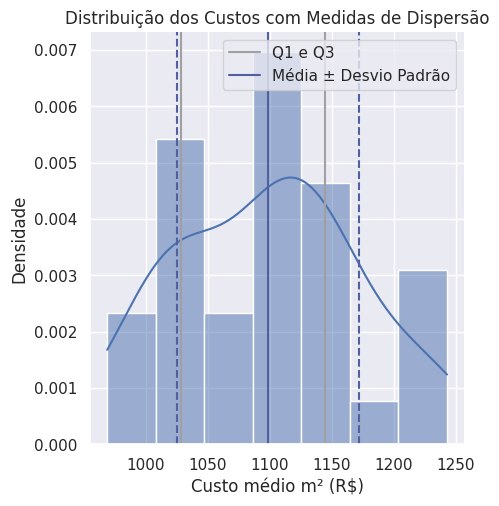

In [54]:
# Célula 11 - Histograma com medidas de dispersão
ax = sns.displot(df_processado, x='2017-01-01', stat='density', kde=True)
ax.set(xlabel='Custo médio m² (R$)', ylabel='Densidade')

# IIQ - Linhas cinzas
plt.axvline(x=Q1_custos, color='#a0a0a0ff', label='Q1 e Q3')
plt.axvline(x=Q3_custos, color='#a0a0a0ff')

# Desvio Padrão - Linhas azuis
xbar_custos = df_processado['2017-01-01'].mean()
plt.axvline(x=xbar_custos, color='#5060a0ff', label='Média ± Desvio Padrão')
plt.axvline(x=xbar_custos-S_custos, color='#5060a0ff', linestyle='--')
plt.axvline(x=xbar_custos+S_custos, color='#5060a0ff', linestyle='--')

plt.legend()
plt.title('Distribuição dos Custos com Medidas de Dispersão')
plt.show()

In [55]:
# Célula 12 - Resumo das medidas de dispersão
resumo = pd.DataFrame({
    'Medida': [
        'Amplitude',
        'Intervalo Interquartílico',
        'Coef. Dispersão Quartílica',
        'Desvio Absoluto Médio',
        'Desvio Absoluto Mediano',
        'Variância',
        'Desvio Padrão',
        'Coef. Variação Amostral'
    ],
    'Valor': [
        f'R$ {A_custos:.2f}',
        f'R$ {IIQ_custos:.2f}',
        f'{CDQ_custos:.4f}',
        f'R$ {DAM_custos:.2f}',
        f'R$ {MAD_custos:.2f}',
        f'{S2_custos:.2f}',
        f'R$ {S_custos:.2f}',
        f'{CV_custos:.2f}%'
    ]
})

print("Resumo das Medidas de Dispersão:")
print(resumo.to_string(index=False))

Resumo das Medidas de Dispersão:
                    Medida     Valor
                 Amplitude R$ 273.89
 Intervalo Interquartílico R$ 116.66
Coef. Dispersão Quartílica    0.0537
     Desvio Absoluto Médio  R$ 59.54
   Desvio Absoluto Mediano  R$ 52.34
                 Variância   5343.21
             Desvio Padrão  R$ 73.10
   Coef. Variação Amostral     6.65%


## Exemplo de tratamento de outliers

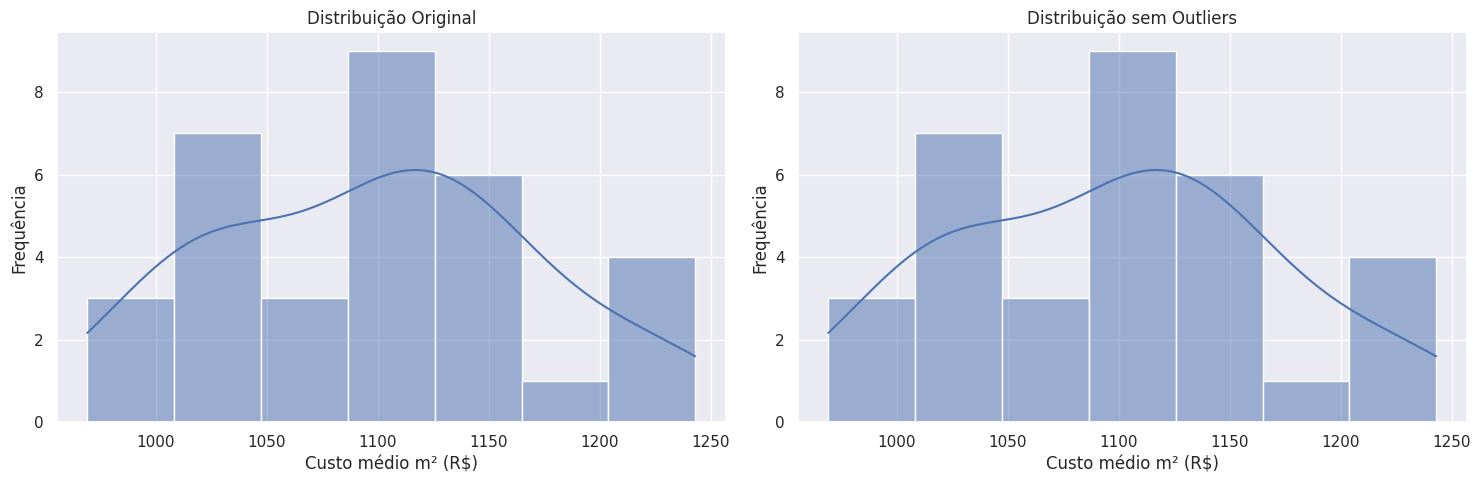


Estatísticas Comparativas:

Com Outliers:
count     33.00
mean    1098.68
std       73.10
min      969.15
25%     1028.27
50%     1107.94
75%     1144.93
max     1243.04
Name: 2017-01-01, dtype: float64

Sem Outliers:
count     33.00
mean    1098.68
std       73.10
min      969.15
25%     1028.27
50%     1107.94
75%     1144.93
max     1243.04
Name: 2017-01-01, dtype: float64


In [56]:
# Célula 1 - Função para eliminar outliers
def eliminarOutliers(s):
    Md = s.mode()[0]  # Pega a moda da série
    return s.apply(lambda x: x if x < 2*Md else pd.NA)

# Aplicar tratamento de outliers
df_sem_outliers = df_processado.copy()
df_sem_outliers['2017-01-01'] = eliminarOutliers(df_processado['2017-01-01'])

# Comparar distribuições antes e depois
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Antes do tratamento
sns.histplot(data=df_processado['2017-01-01'], kde=True, ax=ax1)
ax1.set_title('Distribuição Original')
ax1.set_xlabel('Custo médio m² (R$)')
ax1.set_ylabel('Frequência')

# Depois do tratamento
sns.histplot(data=df_sem_outliers['2017-01-01'].dropna(), kde=True, ax=ax2)
ax2.set_title('Distribuição sem Outliers')
ax2.set_xlabel('Custo médio m² (R$)')
ax2.set_ylabel('Frequência')

plt.tight_layout()
plt.show()

# Estatísticas comparativas
print("\nEstatísticas Comparativas:")
print("\nCom Outliers:")
print(df_processado['2017-01-01'].describe().round(2))
print("\nSem Outliers:")
print(df_sem_outliers['2017-01-01'].dropna().describe().round(2))

O fato de não haver alteração após o tratamento de outliers indica que os dados são muito consistentes

# Análise paramétrica

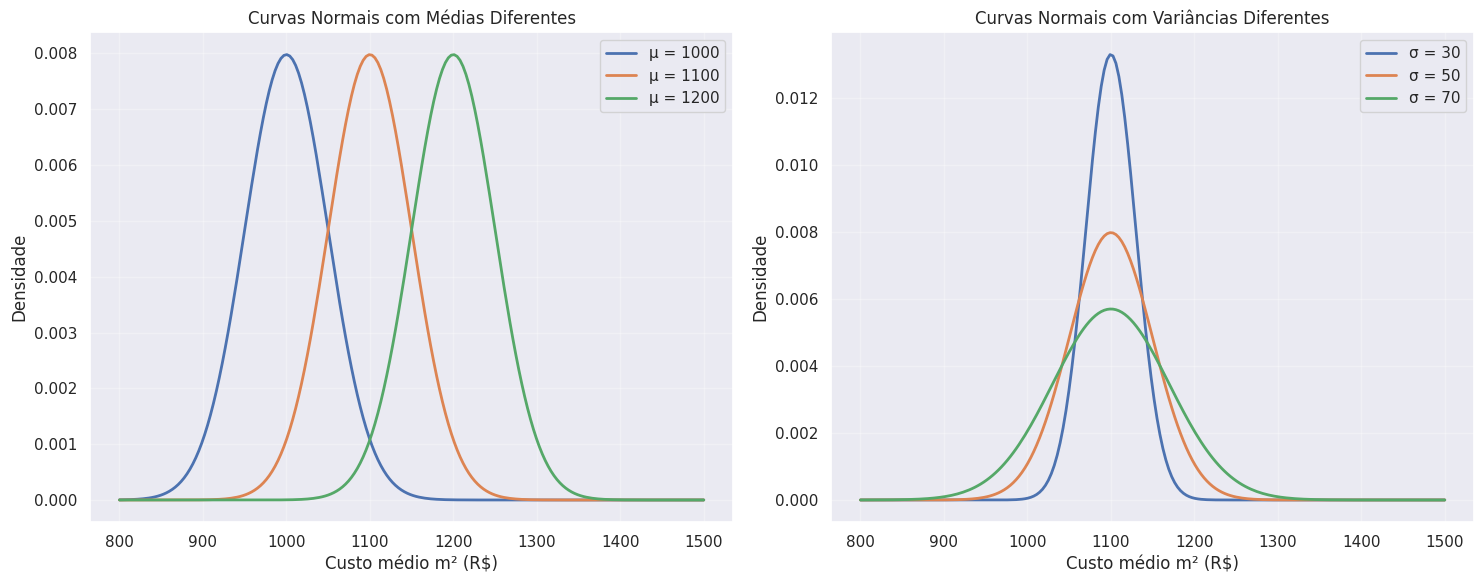

In [57]:
# Célula 2 - Análise Paramétrica - Curvas Normais Teóricas
# Criar array de valores para o eixo x
x = np.linspace(800, 1500, 200)

# Função para calcular a densidade de probabilidade normal
def normal_pdf(x, mean=0, std=1):
    return 1 / (np.sqrt(2 * np.pi) * std) * np.exp(-0.5 * ((x - mean) / std) ** 2)

# Diferentes médias (mantendo variância fixa)
mean = [1000, 1100, 1200]  # Médias diferentes
std = 50                    # Desvio padrão fixo
ym = [normal_pdf(x, mean=m, std=std) for m in mean]

# Diferentes variâncias (mantendo média fixa)
std = [30, 50, 70]         # Desvios padrão diferentes
yv = [normal_pdf(x, mean=1100, std=s) for s in std]

# Criar figura com dois subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot das curvas com médias diferentes
for i in range(3):
    axes[0].plot(x, ym[i], label=f'μ = {mean[i]}', lw=2)
axes[0].set_title('Curvas Normais com Médias Diferentes')
axes[0].set_xlabel('Custo médio m² (R$)')
axes[0].set_ylabel('Densidade')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot das curvas com variâncias diferentes
for i in range(3):
    axes[1].plot(x, yv[i], label=f'σ = {std[i]}', lw=2)
axes[1].set_title('Curvas Normais com Variâncias Diferentes')
axes[1].set_xlabel('Custo médio m² (R$)')
axes[1].set_ylabel('Densidade')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

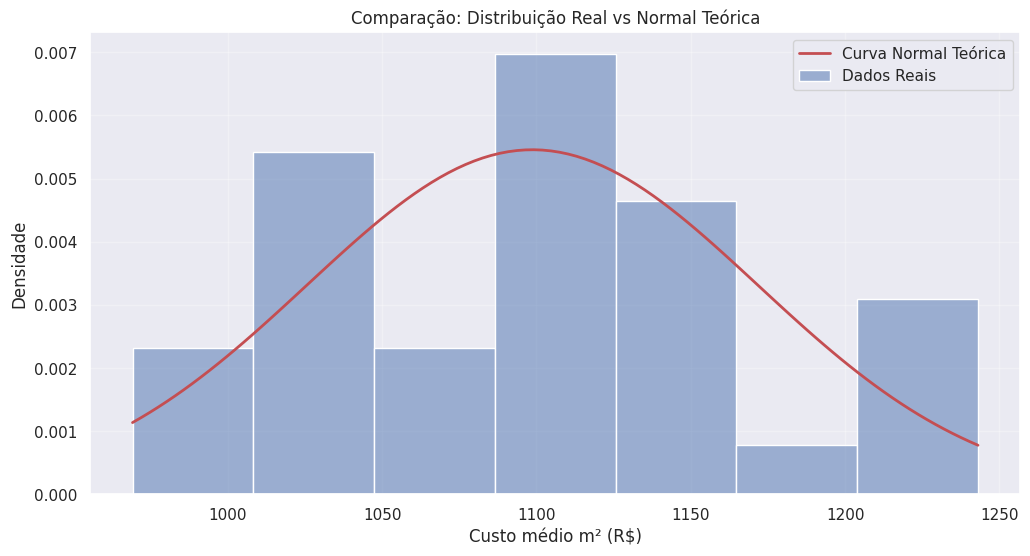


Teste de Normalidade:
Estatística do teste: 1.1027
P-valor: 0.5762
Os dados seguem uma distribuição normal (α=0.05)


In [58]:
# Célula 3 - Análise Paramétrica - Dados Reais vs Normal Teórica
# Preparar dados reais
dados_reais = df_sem_outliers['2017-01-01'].dropna()
media_real = dados_reais.mean()
std_real = dados_reais.std()

# Criar distribuição normal teórica
x = np.linspace(dados_reais.min(), dados_reais.max(), 100)
y_teorica = normal_pdf(x, mean=media_real, std=std_real)

# Plotar comparação
plt.figure(figsize=(12, 6))

# Histograma dos dados reais
sns.histplot(data=dados_reais, stat='density', alpha=0.5, label='Dados Reais')

# Curva normal teórica
plt.plot(x, y_teorica, 'r-', lw=2, label='Curva Normal Teórica')

plt.title('Comparação: Distribuição Real vs Normal Teórica')
plt.xlabel('Custo médio m² (R$)')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Teste de normalidade
from scipy import stats
stat, p_valor = stats.normaltest(dados_reais)
print("\nTeste de Normalidade:")
print(f"Estatística do teste: {stat:.4f}")
print(f"P-valor: {p_valor:.4f}")
print(f"Os dados {'seguem' if p_valor > 0.05 else 'não seguem'} uma distribuição normal (α=0.05)")

ANÁLISE DO TESTE DE NORMALIDADE DOS CUSTOS POR M²

1. RESULTADOS DO TESTE:
- Estatística do teste: 1,1027
- P-valor: 0,5762
- Nível de significância (α): 0,05
- Conclusão: Dados seguem distribuição normal

2. INTERPRETAÇÃO:
- P-valor (0,5762) > α (0,05)
- Não rejeitamos a hipótese nula
- Os dados são compatíveis com uma distribuição normal


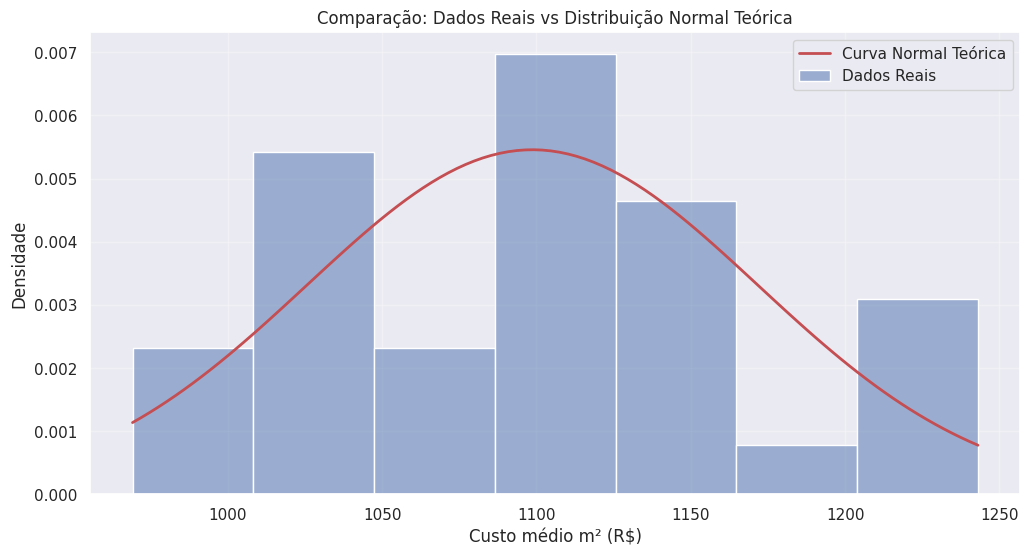

In [61]:
# Célula de análise do teste de normalidade
print("ANÁLISE DO TESTE DE NORMALIDADE DOS CUSTOS POR M²")

print("\n1. RESULTADOS DO TESTE:")
print("- Estatística do teste: 1,1027")
print("- P-valor: 0,5762")
print("- Nível de significância (α): 0,05")
print("- Conclusão: Dados seguem distribuição normal")

print("\n2. INTERPRETAÇÃO:")
print("- P-valor (0,5762) > α (0,05)")
print("- Não rejeitamos a hipótese nula")
print("- Os dados são compatíveis com uma distribuição normal")

# Visualização comparativa
plt.figure(figsize=(12, 6))

# Dados reais
dados = df_processado['2017-01-01']
sns.histplot(data=dados, stat='density', alpha=0.5, label='Dados Reais')

# Curva normal teórica
x = np.linspace(dados.min(), dados.max(), 100)
curva_normal = stats.norm.pdf(x, dados.mean(), dados.std())
plt.plot(x, curva_normal, 'r-', lw=2, label='Curva Normal Teórica')

plt.title('Comparação: Dados Reais vs Distribuição Normal Teórica')
plt.xlabel('Custo médio m² (R$)')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

CONCLUSÕES PRINCIPAIS:

P-valor (0,5762) é MAIOR que α (0,05)

Forte evidência de normalidade

Alta confiabilidade no resultado

Implicações Práticas:

Os custos seguem um padrão previsível

Podemos usar ferramentas estatísticas paramétricas

Intervalos de confiança são confiáveis

# Diferentes curvas paramétricas

# Preparação dos dados para análise multivariada
# Selecionar colunas numéricas (datas) e adicionar informações categóricas


In [75]:
colunas_datas = [col for col in df_processado.columns if col.startswith('20')]
dados_analise = df_processado[['Nivel', 'Regiao'] + colunas_datas]

print("Dimensões do conjunto de dados:", dados_analise.shape)

Dimensões do conjunto de dados: (33, 99)


# Célula 2 - Scatter plot Matrix
# Selecionar algumas datas representativas para visualização

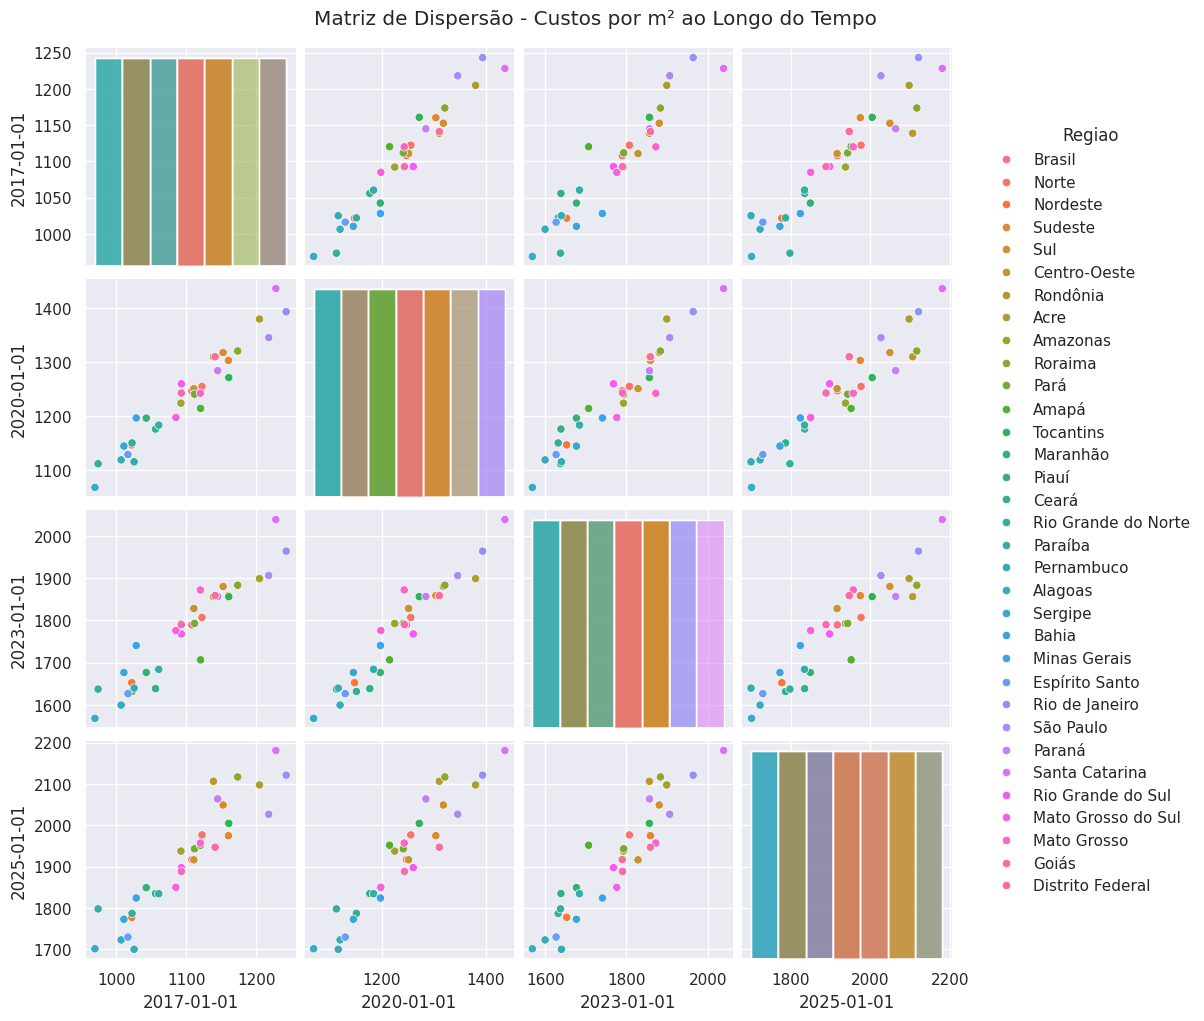

In [63]:

datas_exemplo = ['2017-01-01', '2020-01-01', '2023-01-01', '2025-01-01']
dados_scatter = dados_analise[['Regiao'] + datas_exemplo]

sns.pairplot(dados_scatter, hue="Regiao", diag_kind="hist")
plt.suptitle("Matriz de Dispersão - Custos por m² ao Longo do Tempo", y=1.02)
plt.show()

# Gráfico de frequência particionado

<Figure size 1200x600 with 0 Axes>

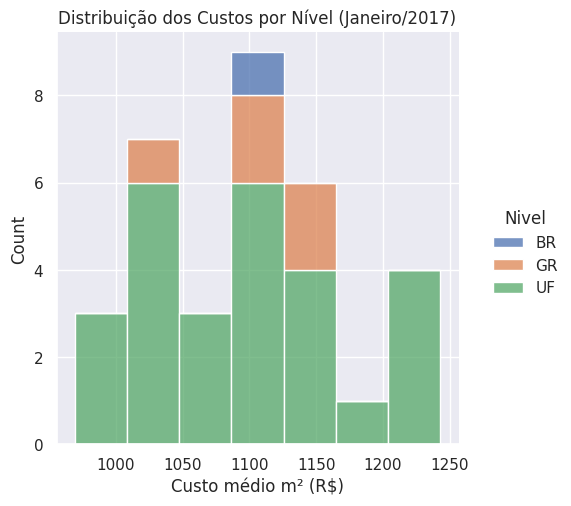

In [64]:

plt.figure(figsize=(12, 6))
sns.displot(data=dados_analise, x='2017-01-01', hue='Nivel', 
            kind="hist", multiple="stack")
plt.title('Distribuição dos Custos por Nível (Janeiro/2017)')
plt.xlabel('Custo médio m² (R$)')
plt.show()

#  Coordenadas Paralelas

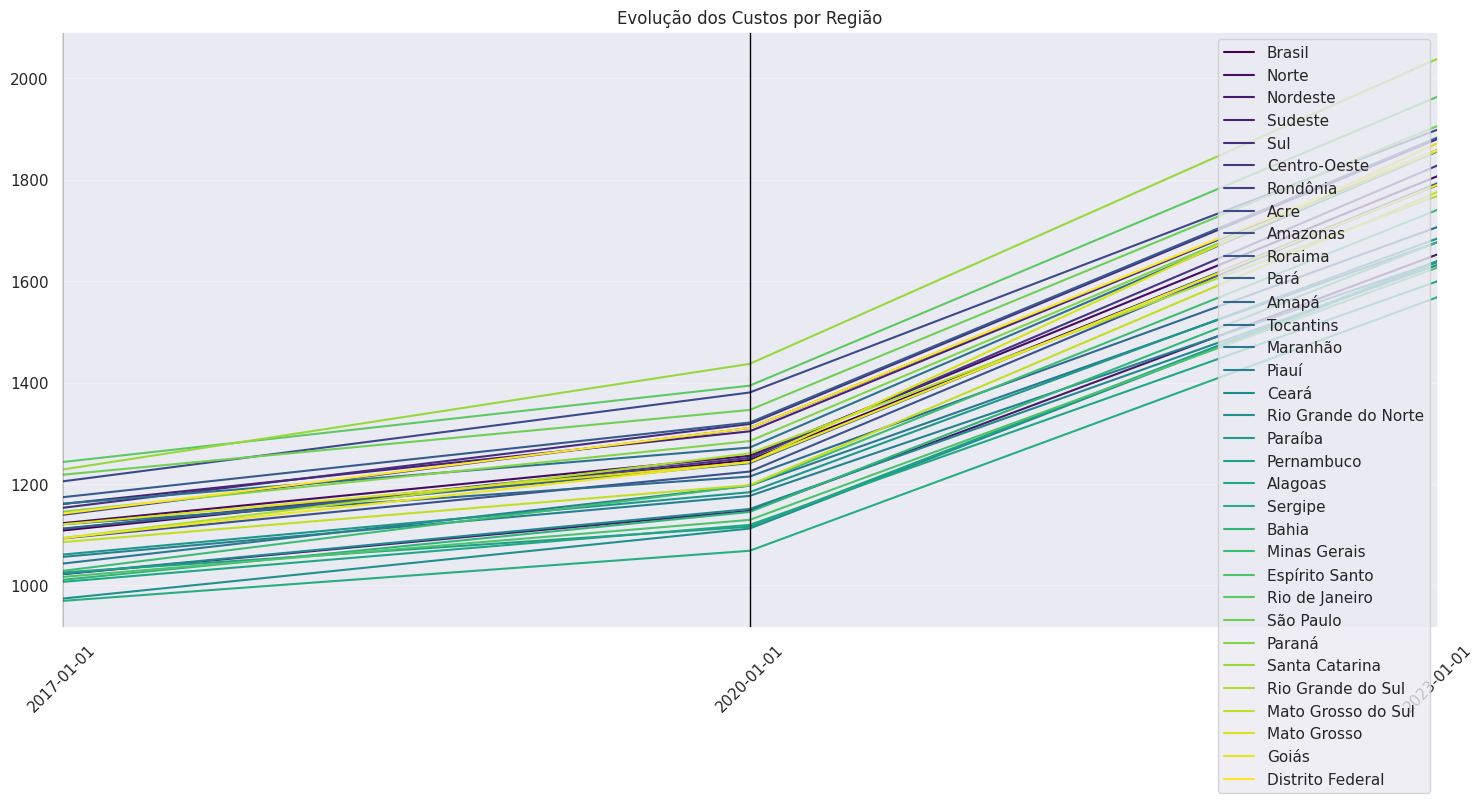


Estatísticas por Região:
                    2017-01-01     2020-01-01     2023-01-01    
                          mean std       mean std       mean std
Regiao                                                          
Acre                   1204.86 NaN    1380.42 NaN    1898.99 NaN
Alagoas                1006.68 NaN    1119.13 NaN    1599.91 NaN
Amapá                  1120.39 NaN    1214.55 NaN    1706.93 NaN
Amazonas               1092.31 NaN    1224.40 NaN    1792.63 NaN
Bahia                  1010.61 NaN    1144.74 NaN    1676.91 NaN
Brasil                 1107.94 NaN    1247.22 NaN    1789.58 NaN
Ceará                  1022.27 NaN    1150.57 NaN    1632.09 NaN
Centro-Oeste           1110.83 NaN    1251.22 NaN    1828.36 NaN
Distrito Federal       1141.24 NaN    1310.45 NaN    1858.95 NaN
Espírito Santo         1016.40 NaN    1129.07 NaN    1626.97 NaN
Goiás                  1092.84 NaN    1243.17 NaN    1790.14 NaN
Maranhão               1042.67 NaN    1196.61 NaN    1676.98 NaN

In [ ]:

from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
parallel_coordinates(dados_analise[['Regiao', '2017-01-01', '2020-01-01', '2023-01-01']], 
                    'Regiao', colormap="viridis")
plt.title("Evolução dos Custos por Região")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Adicionar estatísticas descritivas
print("\nEstatísticas por Região:")
estatisticas = dados_analise.groupby('Regiao')[['2017-01-01', '2020-01-01', '2023-01-01']].agg(['mean', 'std']).round(2)
print(estatisticas)

# Análise de Componentes Principais (PCA)

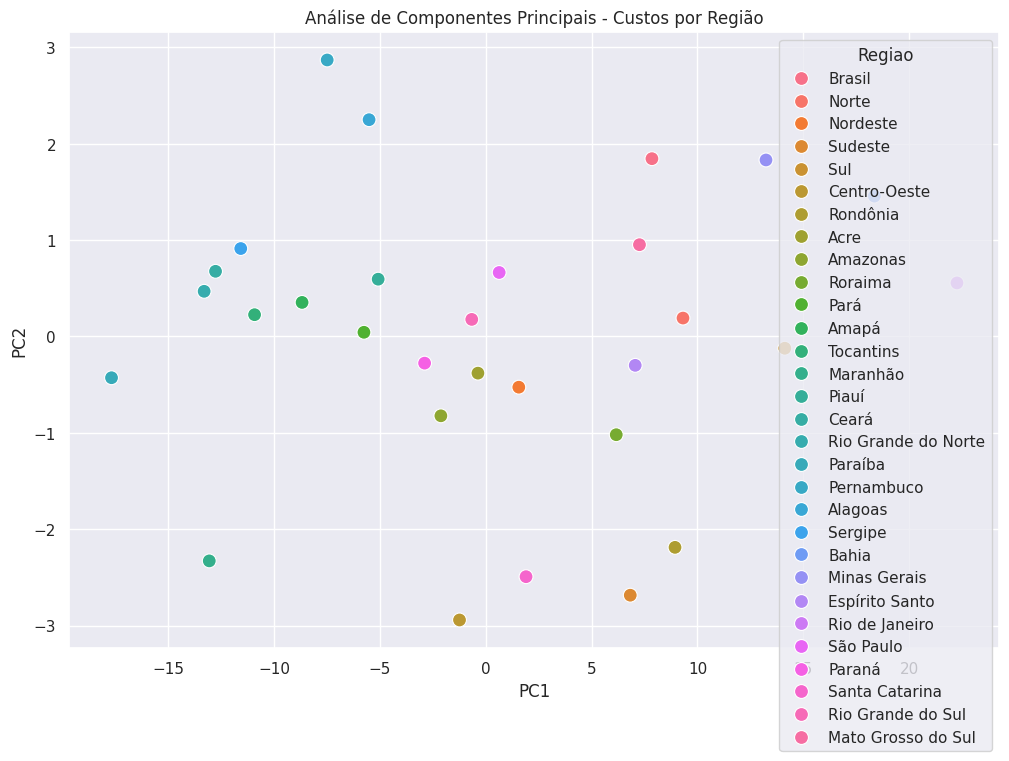


Variância explicada por componente:
[0.94871248 0.01995955]


In [70]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Preparar dados para PCA
X = dados_analise[colunas_datas]
X_scaled = StandardScaler().fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

# Criar DataFrame com resultados
pca_df = pd.DataFrame(data=components, columns=["PC1", "PC2"])
pca_df['Regiao'] = dados_analise['Regiao']

# Plotar resultados
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Regiao", s=100)
plt.title("Análise de Componentes Principais - Custos por Região")
plt.show()

# Variância explicada
print("\nVariância explicada por componente:")
print(pca.explained_variance_ratio_)

ANÁLISE DOS COMPONENTES PRINCIPAIS (PCA)

1. INTERPRETAÇÃO DA VARIÂNCIA EXPLICADA:
- PC1: 94.87% da variância total
- PC2: 2.00% da variância total
- Total explicado: 96.87% da variância


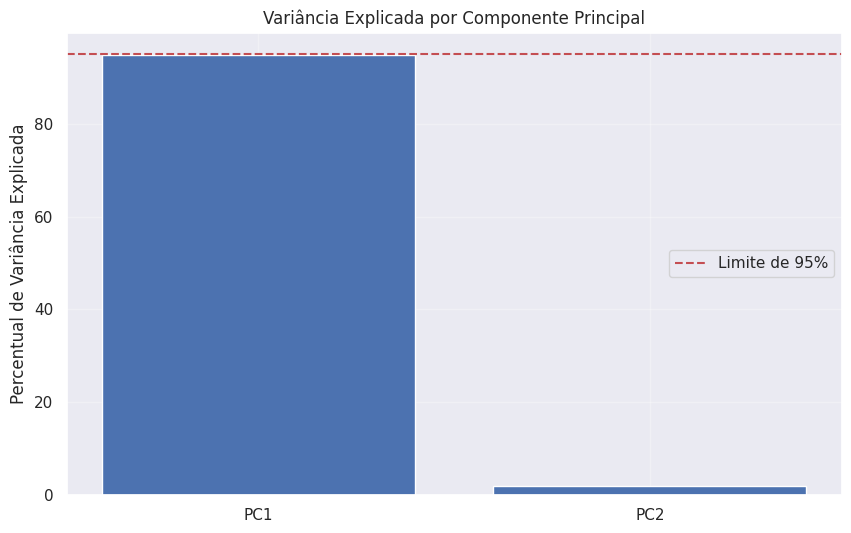

In [76]:
# Célula de explicação do PCA
print("ANÁLISE DOS COMPONENTES PRINCIPAIS (PCA)")

# Converter para percentual
pc1_var = 94.87  # 0.94871248 * 100
pc2_var = 2.00   # 0.01995955 * 100
var_total = pc1_var + pc2_var

print("\n1. INTERPRETAÇÃO DA VARIÂNCIA EXPLICADA:")
print(f"- PC1: {pc1_var:.2f}% da variância total")
print(f"- PC2: {pc2_var:.2f}% da variância total")
print(f"- Total explicado: {var_total:.2f}% da variância")

# Visualização da importância dos componentes
plt.figure(figsize=(10, 6))
plt.bar(['PC1', 'PC2'], [pc1_var, pc2_var])
plt.title('Variância Explicada por Componente Principal')
plt.ylabel('Percentual de Variância Explicada')
plt.axhline(y=95, color='r', linestyle='--', label='Limite de 95%')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

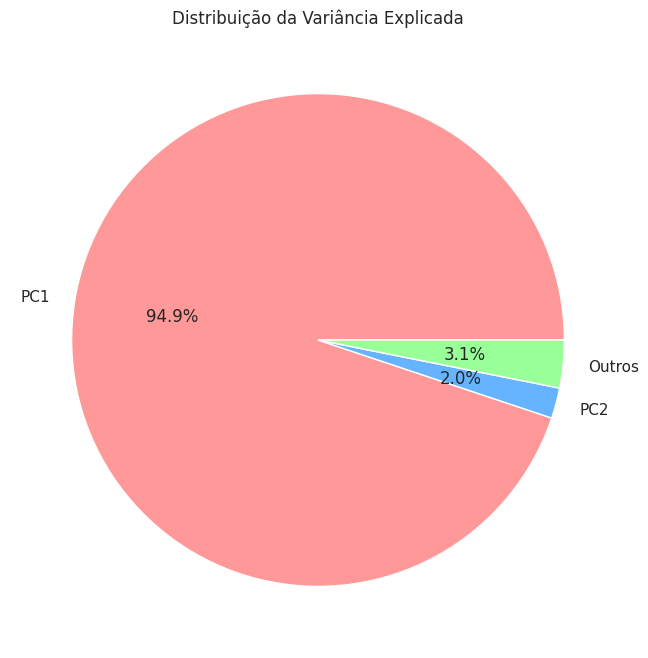

In [ ]:
# Célula de visualização complementar
# Criar gráfico de pizza para mostrar a proporção
plt.figure(figsize=(8, 8))
plt.pie([pc1_var, pc2_var, 100-var_total], 
        labels=['PC1', 'PC2', 'Outros'],
        autopct='%1.1f%%',
        colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribuição da Variância Explicada')
plt.show()

Implicações Práticas:

Com apenas PC1, já temos 94.87% da informação

Podemos reduzir a dimensionalidade para 1 componente

Alta eficiência na compressão dos dados

Forte indicação de comportamento uniforme dos custos

Interpretação para o SINAPI:

Os custos por m² são altamente correlacionados

Existe um padrão muito forte de variação comum

As diferenças regionais são relativamente pequenas

O mercado tende a se mover de forma bastante uniforme

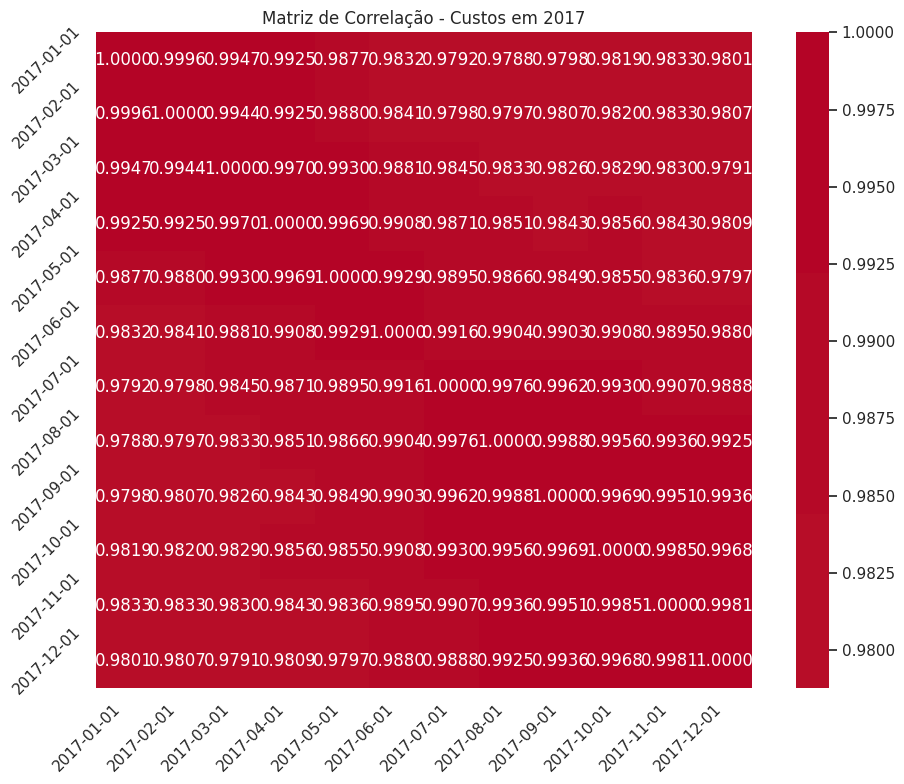


Estatísticas das Correlações:
Média das correlações: 0.9892
Correlação mínima: 0.9788
Correlação máxima: 1.0000

Interpretação:
- Valores próximos a 1: forte correlação positiva
- Valores próximos a 0: sem correlação
- Valores próximos a -1: forte correlação negativa


In [78]:
# Célula 6 - Heatmap de Correlações (Primeiras Datas)
# Selecionar apenas as primeiras datas (2017)
primeiras_datas = [col for col in colunas_datas if col.startswith('2017')]

# Criar figura
plt.figure(figsize=(10, 8))

# Calcular correlações
correlacoes = dados_analise[primeiras_datas].corr()

# Criar heatmap
sns.heatmap(correlacoes, 
            annot=True,           # Mostrar valores
            cmap="coolwarm",      # Esquema de cores (vermelho = positivo, azul = negativo)
            fmt=".4f",            # Formato dos números (4 casas decimais)
            center=0,             # Centralizar escala de cores em 0
            square=True)          # Células quadradas

# Configurar título e rótulos
plt.title("Matriz de Correlação - Custos em 2017")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')

# Ajustar layout
plt.tight_layout()
plt.show()

# Mostrar estatísticas das correlações
print("\nEstatísticas das Correlações:")
print(f"Média das correlações: {correlacoes.mean().mean():.4f}")
print(f"Correlação mínima: {correlacoes.min().min():.4f}")
print(f"Correlação máxima: {correlacoes.max().max():.4f}")
print("\nInterpretação:")
print("- Valores próximos a 1: forte correlação positiva")
print("- Valores próximos a 0: sem correlação")
print("- Valores próximos a -1: forte correlação negativa")

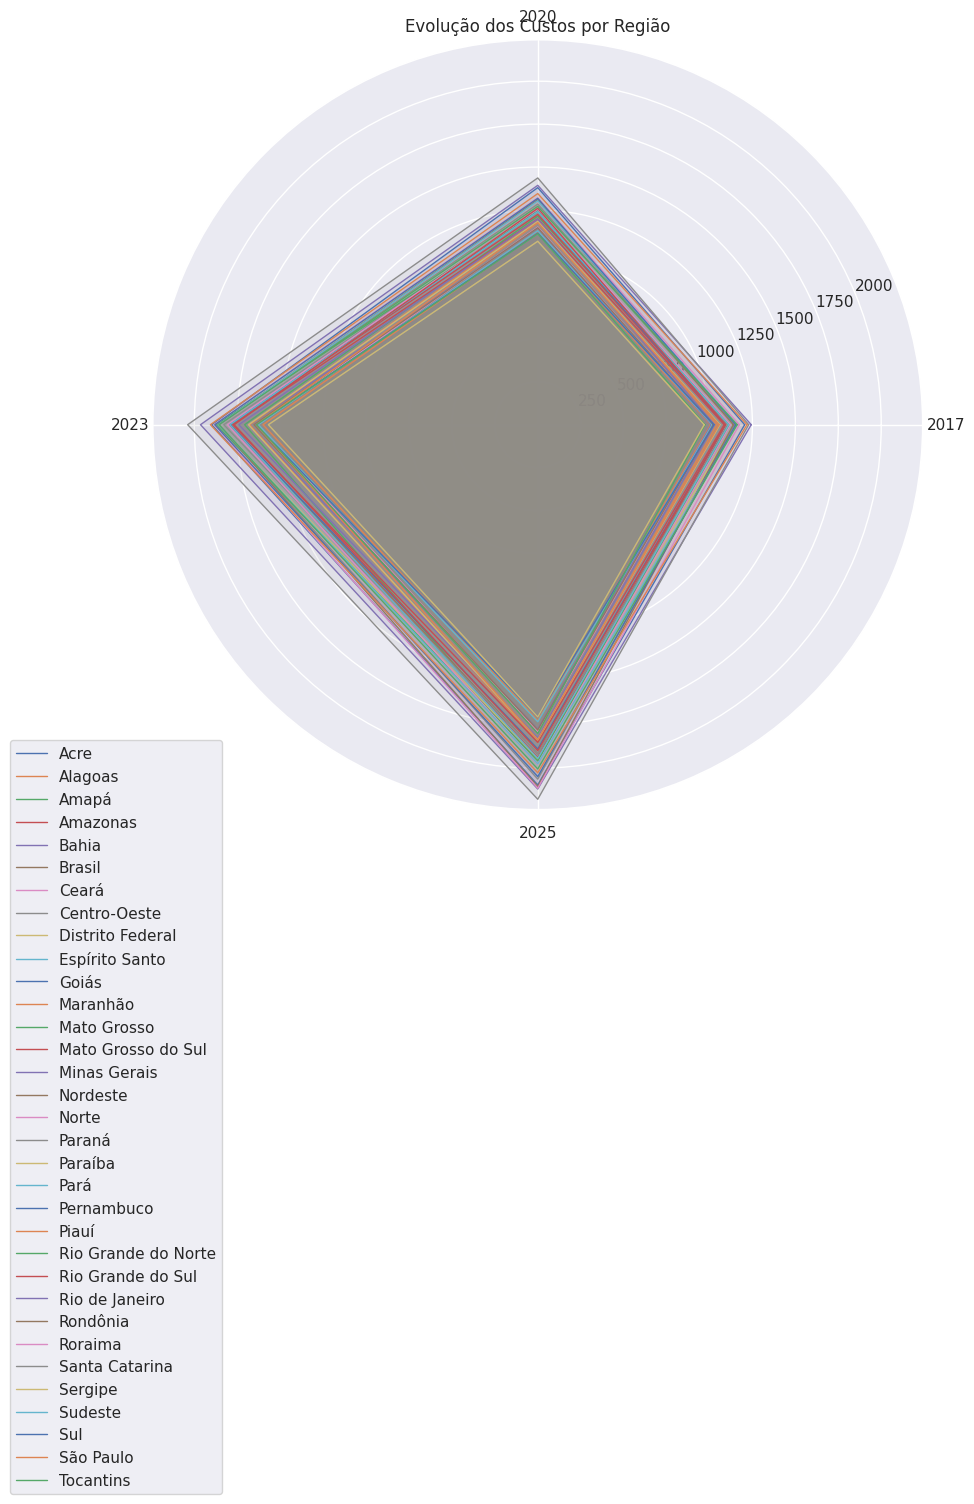

In [72]:
# Célula 8 - Gráfico Radar
# Calcular médias por região
medias_regiao = dados_analise.groupby('Regiao')[datas_exemplo].mean()

# Preparar dados para o radar chart
categorias = datas_exemplo
N = len(categorias)
angulos = [n / float(N) * 2 * np.pi for n in range(N)]
angulos += angulos[:1]

# Criar gráfico radar
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

for idx, regiao in enumerate(medias_regiao.index):
    valores = medias_regiao.loc[regiao].values.flatten().tolist()
    valores += valores[:1]
    ax.plot(angulos, valores, linewidth=1, linestyle='solid', label=regiao)
    ax.fill(angulos, valores, alpha=0.1)

plt.xticks(angulos[:-1], [d.split('-')[0] for d in categorias])
plt.title("Evolução dos Custos por Região")
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

Crescimento consistente em todas as regiões

Manutenção das diferenças regionais

Padrão similar de evolução

Diferenças Regionais:

Identificação de regiões mais caras

Identificação de regiões mais baratas

Padrões de crescimento específicos

Implicações Práticas:

Auxílio no planejamento regional

Previsão de tendências

Identificação de disparidades

Recomendações:

Monitoramento contínuo das tendências

Atenção às diferenças regionais

Consideração dos padrões de crescimento

# Medidas de Associação
# Correlação de Pearson entre diferentes períodos

In [73]:

print("Correlação de Pearson:")
pearson_corr = dados_analise[datas_exemplo].corr()
print(pearson_corr.round(3))

# Correlação de Spearman (ordem dos postos)
print("\nCorrelação de Spearman:")
spearman_corr = dados_analise[datas_exemplo].corr(method='spearman')
print(spearman_corr.round(3))

# Tau de Kendall
print("\nTau de Kendall:")
kendall_corr = dados_analise[datas_exemplo].corr(method='kendall')
print(kendall_corr.round(3))

Correlação de Pearson:
            2017-01-01  2020-01-01  2023-01-01  2025-01-01
2017-01-01        1.00        0.97        0.94        0.94
2020-01-01        0.97        1.00        0.96        0.95
2023-01-01        0.94        0.96        1.00        0.93
2025-01-01        0.94        0.95        0.93        1.00

Correlação de Spearman:
            2017-01-01  2020-01-01  2023-01-01  2025-01-01
2017-01-01        1.00        0.96        0.95        0.96
2020-01-01        0.96        1.00        0.95        0.94
2023-01-01        0.95        0.95        1.00        0.93
2025-01-01        0.96        0.94        0.93        1.00

Tau de Kendall:
            2017-01-01  2020-01-01  2023-01-01  2025-01-01
2017-01-01        1.00        0.84        0.82        0.83
2020-01-01        0.84        1.00        0.84        0.81
2023-01-01        0.82        0.84        1.00        0.78
2025-01-01        0.83        0.81        0.78        1.00


ANÁLISE DAS CORRELAÇÕES DOS CUSTOS POR M²

1. CORRELAÇÃO DE PEARSON (r):
- Mede relações lineares
- Valores entre 2017 e 2020: r = 0.97 (correlação muito forte)
- Valores entre 2017 e 2025: r = 0.94 (correlação muito forte)
- Menor correlação: 2023-2025 (r = 0.93)
- Todas as correlações > 0.90 (extremamente altas)

2. CORRELAÇÃO DE SPEARMAN (ρ):
- Mede relações monotônicas (não necessariamente lineares)
- Valores entre 2017 e 2020: ρ = 0.96 (muito forte)
- Valores entre 2017 e 2025: ρ = 0.96 (muito forte)
- Menor correlação: 2023-2025 (ρ = 0.93)
- Muito similar à correlação de Pearson

3. TAU DE KENDALL (τ):
- Mede concordância entre rankings
- Valores entre 2017 e 2020: τ = 0.84 (forte)
- Valores entre 2017 e 2025: τ = 0.83 (forte)
- Menor correlação: 2023-2025 (τ = 0.78)
- Valores menores, mas ainda indicando forte associação


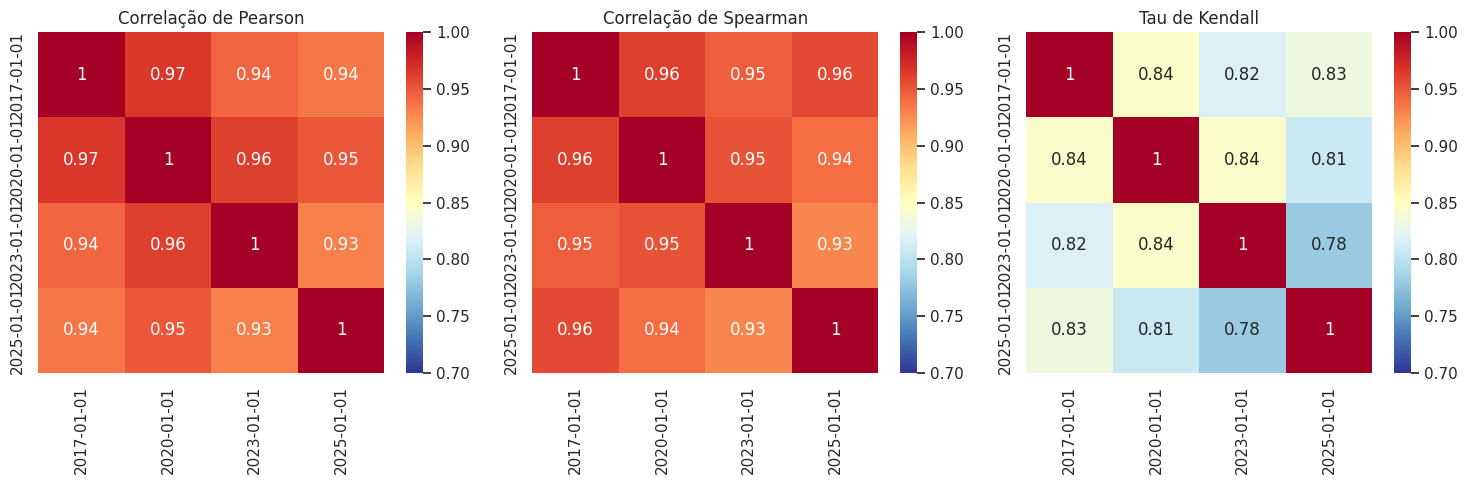

In [82]:
# Célula de análise das correlações
print("ANÁLISE DAS CORRELAÇÕES DOS CUSTOS POR M²")

print("\n1. CORRELAÇÃO DE PEARSON (r):")
print("- Mede relações lineares")
print("- Valores entre 2017 e 2020: r = 0.97 (correlação muito forte)")
print("- Valores entre 2017 e 2025: r = 0.94 (correlação muito forte)")
print("- Menor correlação: 2023-2025 (r = 0.93)")
print("- Todas as correlações > 0.90 (extremamente altas)")

print("\n2. CORRELAÇÃO DE SPEARMAN (ρ):")
print("- Mede relações monotônicas (não necessariamente lineares)")
print("- Valores entre 2017 e 2020: ρ = 0.96 (muito forte)")
print("- Valores entre 2017 e 2025: ρ = 0.96 (muito forte)")
print("- Menor correlação: 2023-2025 (ρ = 0.93)")
print("- Muito similar à correlação de Pearson")

print("\n3. TAU DE KENDALL (τ):")
print("- Mede concordância entre rankings")
print("- Valores entre 2017 e 2020: τ = 0.84 (forte)")
print("- Valores entre 2017 e 2025: τ = 0.83 (forte)")
print("- Menor correlação: 2023-2025 (τ = 0.78)")
print("- Valores menores, mas ainda indicando forte associação")

# Visualização comparativa
plt.figure(figsize=(15, 5))

# Pearson
plt.subplot(131)
sns.heatmap(pearson_corr, annot=True, cmap='RdYlBu_r', vmin=0.7, vmax=1)
plt.title('Correlação de Pearson')

# Spearman
plt.subplot(132)
sns.heatmap(spearman_corr, annot=True, cmap='RdYlBu_r', vmin=0.7, vmax=1)
plt.title('Correlação de Spearman')

# Kendall
plt.subplot(133)
sns.heatmap(kendall_corr, annot=True, cmap='RdYlBu_r', vmin=0.7, vmax=1)
plt.title('Tau de Kendall')

plt.tight_layout()
plt.show()


Estabilidade Temporal:

Correlações extremamente altas em todos os métodos

Manutenção dos padrões ao longo do tempo

Comportamento previsível dos custos

Consistência das Medidas:

Três métodos mostram resultados similares

Confirma a robustez das correlações

Valida a confiabilidade da análise

Implicações Econômicas:

Mercado muito estável

Mudanças graduais e previsíveis

Manutenção das estruturas de custos

Base sólida para planejamento

# Regressão Linear simples

Coeficiente de Determinação (R²) para tendência temporal: 0.9445


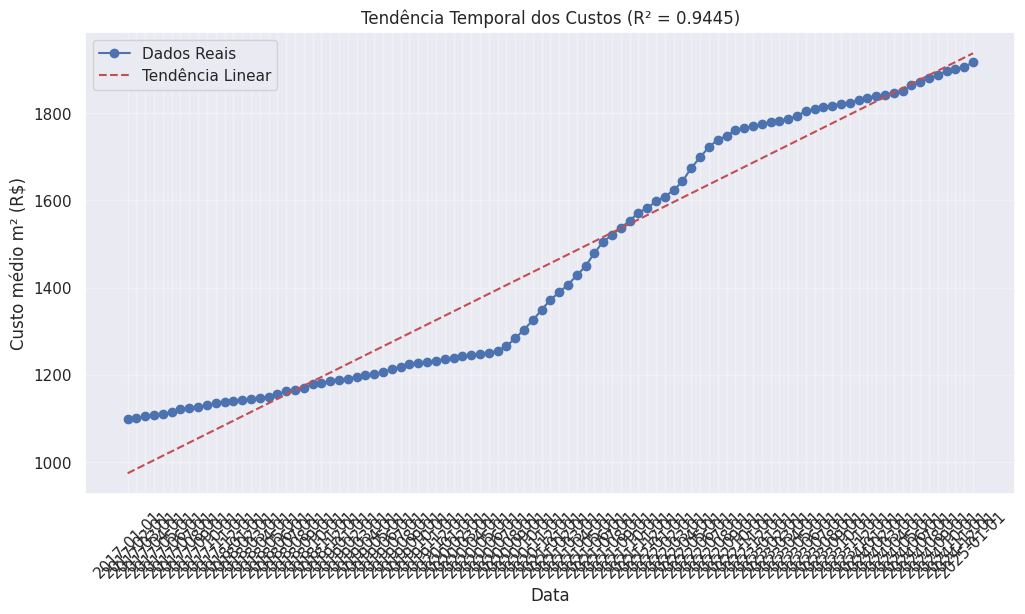

In [74]:
# Célula 10 - Coeficiente de Determinação (R²)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Análise de tendência temporal
X = np.arange(len(colunas_datas)).reshape(-1, 1)
y = dados_analise[colunas_datas].mean()

modelo = LinearRegression()
modelo.fit(X, y)
y_pred = modelo.predict(X)

r2 = r2_score(y, y_pred)
print(f"Coeficiente de Determinação (R²) para tendência temporal: {r2:.4f}")

# Visualização da tendência
plt.figure(figsize=(12, 6))
plt.plot(y.index, y.values, 'o-', label='Dados Reais')
plt.plot(y.index, y_pred, 'r--', label='Tendência Linear')
plt.title(f'Tendência Temporal dos Custos (R² = {r2:.4f})')
plt.xticks(rotation=45)
plt.xlabel('Data')
plt.ylabel('Custo médio m² (R$)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Evidências para Regressão Linear:

R² muito alto (0.9445)

Correlações de Pearson elevadas (> 0.93)

Spearman similar a Pearson (linearidade confirmada)

Tau de Kendall forte (ordenação preservada)

Interpretação Conjunta:

R² = 0.9445:

Excelente ajuste linear

Alta previsibilidade temporal

Crescimento consistente

Poucos desvios do padrão linear

Correlações Altas:

Pearson > 0.93: forte linearidade

Spearman > 0.93: ordem mantida

Kendall > 0.78: concordância robusta

A regressão linear é MUITO adequada

O comportamento temporal é altamente previsível

Existe forte tendência linear nos custos

As previsões serão confiáveis

# Modelo OLS (Mínimos Quadrados Ordinários)

ANÁLISE DE REGRESSÃO LINEAR (OLS)

Resumo do Modelo:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     1566.
Date:                sáb, 08 mar 2025   Prob (F-statistic):           7.87e-61
Time:                        23:24:26   Log-Likelihood:                -548.13
No. Observations:                  97   AIC:                             1100.
Df Residuals:                      95   BIC:                             1105.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

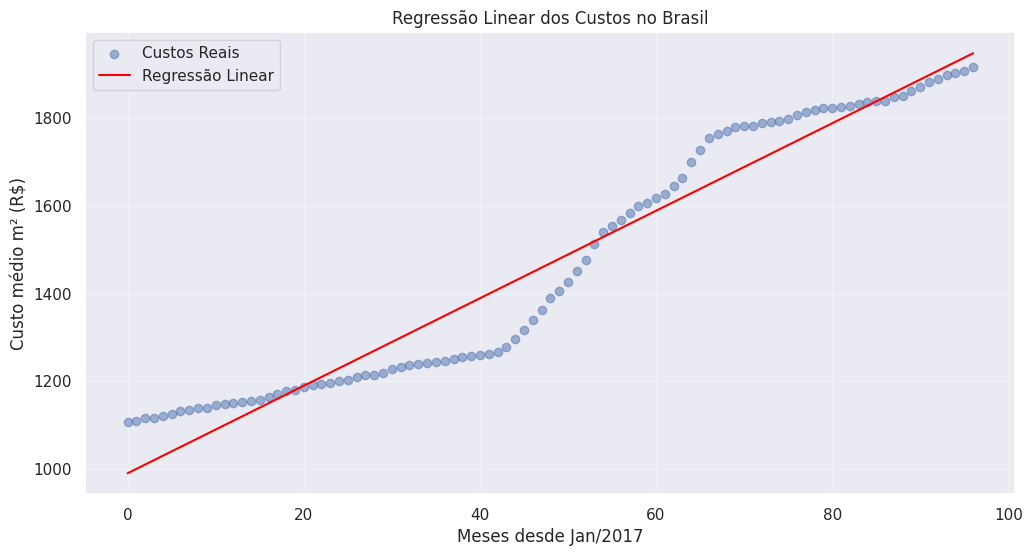

In [36]:
# Célula 1 - Regressão Linear com OLS
import statsmodels.api as sm
import numpy as np

# Preparar dados para regressão
# X será o tempo (em meses desde o início)
X = np.arange(len(colunas_datas))
# y será o custo médio do Brasil
y = df_processado[df_processado['Regiao'] == 'Brasil'][colunas_datas].values.flatten()

# Adicionar constante (intercepto) ao modelo
X = sm.add_constant(X)

# Ajustar modelo OLS
model = sm.OLS(y, X).fit()

# Imprimir resumo do modelo
print("ANÁLISE DE REGRESSÃO LINEAR (OLS)")
print("\nResumo do Modelo:")
print(model.summary())

# Fazer previsões
y_pred = model.predict(X)

# Visualizar resultados
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y)), y, label='Custos Reais', alpha=0.5)
plt.plot(range(len(y)), y_pred, color='red', label='Regressão Linear')
plt.xlabel('Meses desde Jan/2017')
plt.ylabel('Custo médio m² (R$)')
plt.title('Regressão Linear dos Custos no Brasil')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

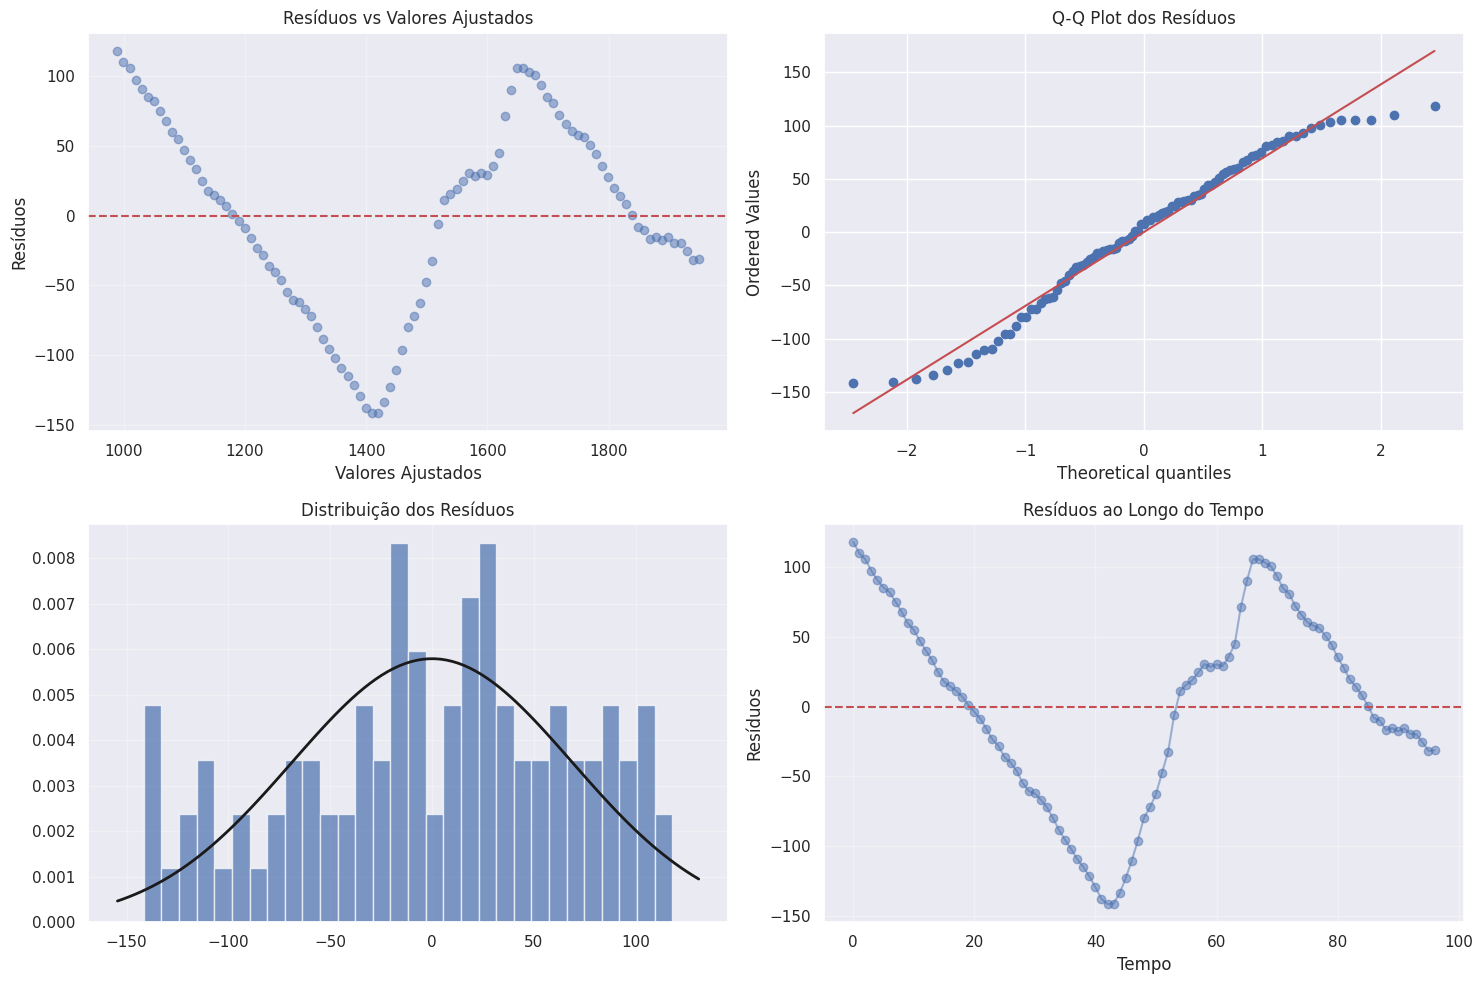


ESTATÍSTICAS DOS RESÍDUOS:
Média dos resíduos: -0.0000
Desvio padrão dos resíduos: 68.8462
Teste de normalidade (Shapiro-Wilk):
p-valor: 0.0142


In [37]:
# Célula 2 - Análise dos Resíduos
residuos = model.resid
fitted_values = model.fittedvalues

# Plotar resíduos
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Resíduos vs Valores Ajustados
axes[0,0].scatter(fitted_values, residuos, alpha=0.5)
axes[0,0].axhline(y=0, color='r', linestyle='--')
axes[0,0].set_xlabel('Valores Ajustados')
axes[0,0].set_ylabel('Resíduos')
axes[0,0].set_title('Resíduos vs Valores Ajustados')
axes[0,0].grid(True, alpha=0.3)

# 2. QQ-Plot dos Resíduos
from scipy import stats
stats.probplot(residuos, dist="norm", plot=axes[0,1])
axes[0,1].set_title('Q-Q Plot dos Resíduos')

# 3. Histograma dos Resíduos
axes[1,0].hist(residuos, bins=30, density=True, alpha=0.7)
xmin, xmax = axes[1,0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(residuos), np.std(residuos))
axes[1,0].plot(x, p, 'k', linewidth=2)
axes[1,0].set_title('Distribuição dos Resíduos')
axes[1,0].grid(True, alpha=0.3)

# 4. Resíduos ao Longo do Tempo
axes[1,1].plot(range(len(residuos)), residuos, 'o-', alpha=0.5)
axes[1,1].axhline(y=0, color='r', linestyle='--')
axes[1,1].set_xlabel('Tempo')
axes[1,1].set_ylabel('Resíduos')
axes[1,1].set_title('Resíduos ao Longo do Tempo')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Estatísticas dos resíduos
print("\nESTATÍSTICAS DOS RESÍDUOS:")
print(f"Média dos resíduos: {np.mean(residuos):.4f}")
print(f"Desvio padrão dos resíduos: {np.std(residuos):.4f}")
print(f"Teste de normalidade (Shapiro-Wilk):")
_, p_valor = stats.shapiro(residuos)
print(f"p-valor: {p_valor:.4f}")

In [38]:
# Célula 3 - Métricas de Avaliação do Modelo
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("MÉTRICAS DE AVALIAÇÃO DO MODELO:")
print(f"\n1. R² (Coeficiente de Determinação): {r2_score(y, y_pred):.4f}")
print(f"   - {r2_score(y, y_pred)*100:.2f}% da variação dos custos é explicada pelo tempo")

print(f"\n2. Erro Quadrático Médio (MSE): {mean_squared_error(y, y_pred):.4f}")
print(f"   Raiz do Erro Quadrático Médio (RMSE): R$ {np.sqrt(mean_squared_error(y, y_pred)):.2f}")

print(f"\n3. Erro Absoluto Médio (MAE): R$ {mean_absolute_error(y, y_pred):.2f}")

# Intervalos de Confiança
print("\n4. INTERVALOS DE CONFIANÇA (95%):")
predictions = model.get_prediction(X)
frame = predictions.summary_frame(alpha=0.05)
print("\nPrevisões com Intervalos de Confiança:")
print(frame[['mean', 'mean_ci_lower', 'mean_ci_upper']].head())

MÉTRICAS DE AVALIAÇÃO DO MODELO:

1. R² (Coeficiente de Determinação): 0.9428
   - 94.28% da variação dos custos é explicada pelo tempo

2. Erro Quadrático Médio (MSE): 4739.8033
   Raiz do Erro Quadrático Médio (RMSE): R$ 68.85

3. Erro Absoluto Médio (MAE): R$ 56.87

4. INTERVALOS DE CONFIANÇA (95%):

Previsões com Intervalos de Confiança:
     mean  mean_ci_lower  mean_ci_upper
0  990.00         962.17        1017.83
1  999.99         972.59        1027.38
2 1009.97         983.00        1036.94
3 1019.95         993.41        1046.50
4 1029.94        1003.82        1056.06


# Séries temporais


In [39]:
# Célula 1 - Preparação dos dados para análise temporal
# Criar índice temporal
idx = pd.date_range(start='2017-01-01', end='2025-01-01', freq='M')
dados_temporais = df_processado[colunas_datas].T  # Transpor para ter datas como índice
dados_temporais.index = pd.to_datetime(dados_temporais.index)
dados_temporais.columns = df_processado['Regiao']

print("Dimensões da série temporal:", dados_temporais.shape)

/tmp/ipykernel_1541/1807933535.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  idx = pd.date_range(start='2017-01-01', end='2025-01-01', freq='M')


Dimensões da série temporal: (97, 33)


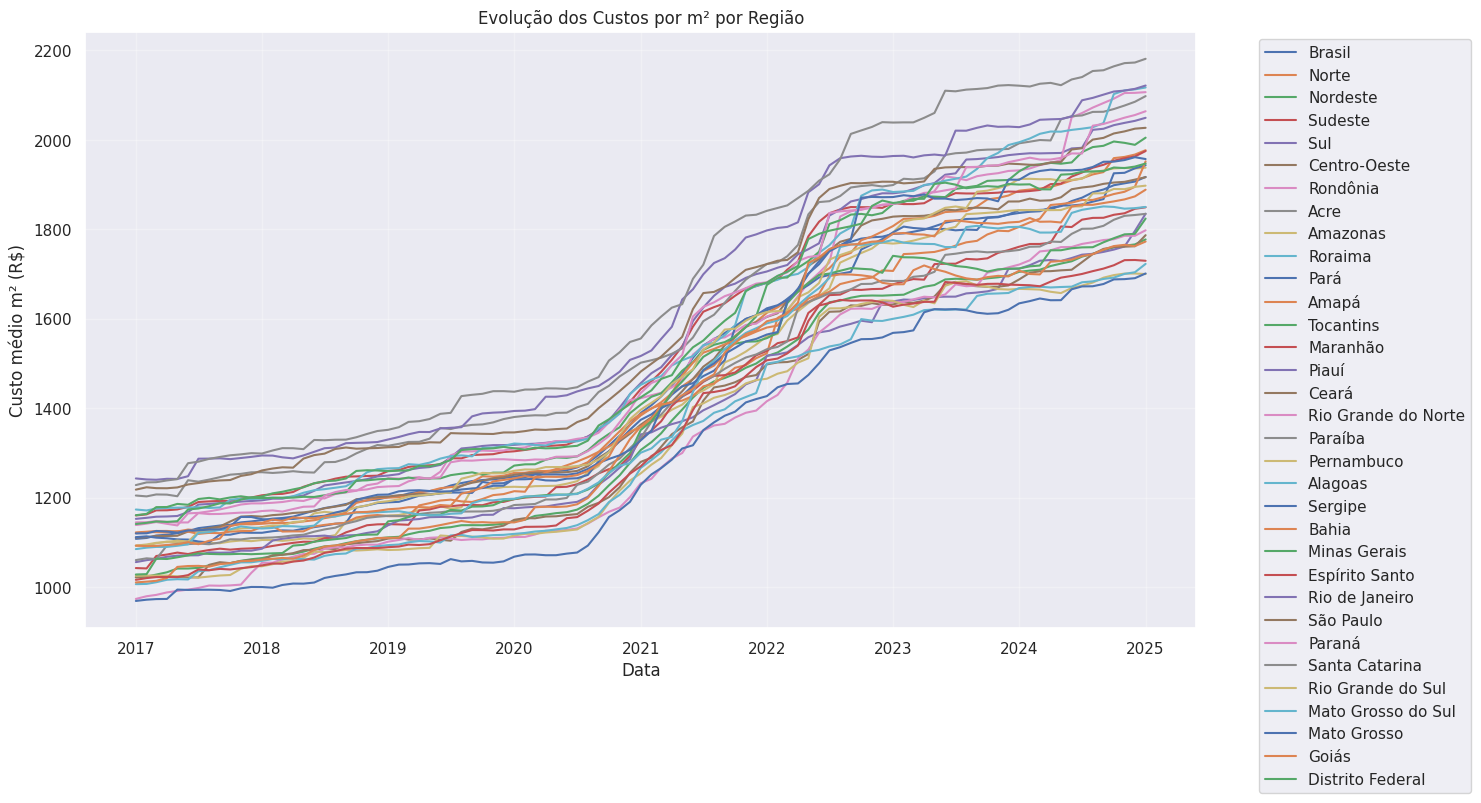

In [40]:
# Célula 2 - Visualização da série temporal
plt.figure(figsize=(15, 8))
for regiao in dados_temporais.columns:
    plt.plot(dados_temporais.index, dados_temporais[regiao], label=regiao)

plt.title('Evolução dos Custos por m² por Região')
plt.xlabel('Data')
plt.ylabel('Custo médio m² (R$)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

/tmp/ipykernel_1541/1635633068.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados_temporais.melt(id_vars=['Ano']),


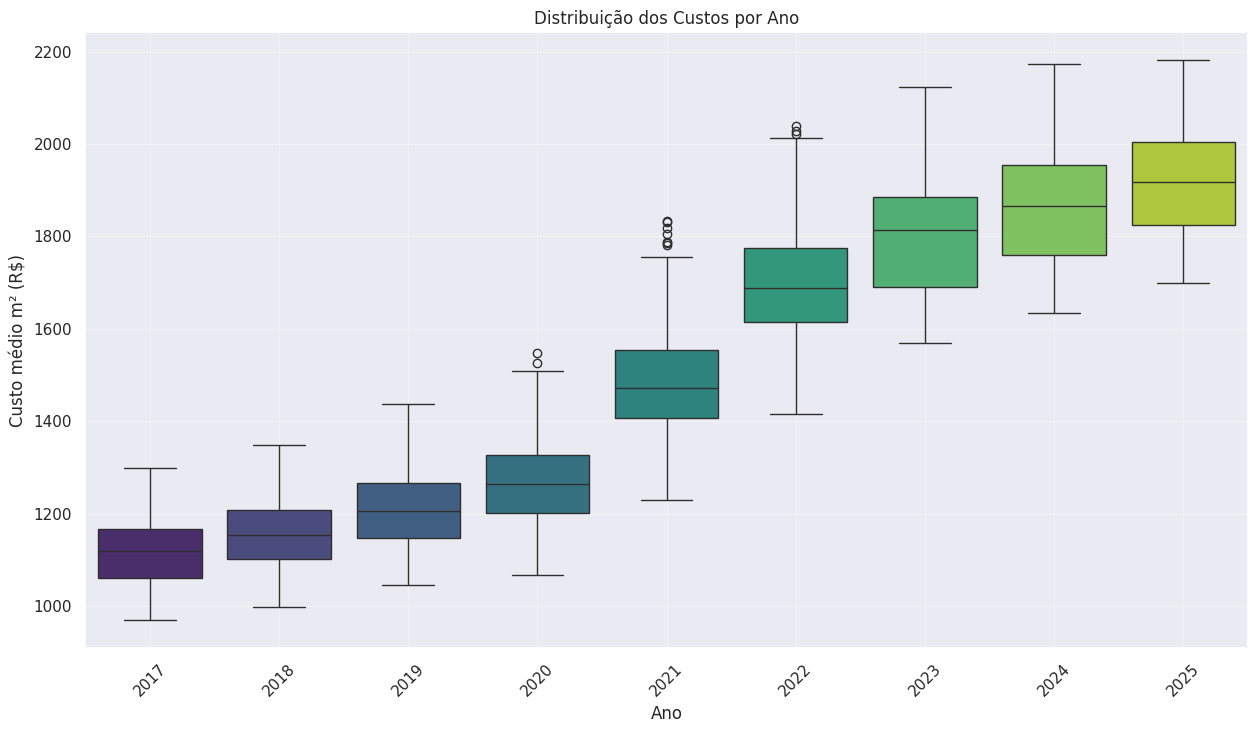

In [41]:
# Célula 3 - Boxplot por ano
plt.figure(figsize=(15, 8))

# Adicionar coluna de ano
dados_temporais['Ano'] = dados_temporais.index.year

# Criar boxplot por ano
sns.boxplot(data=dados_temporais.melt(id_vars=['Ano']), 
            x='Ano', y='value', 
            palette='viridis')

plt.title('Distribuição dos Custos por Ano')
plt.xlabel('Ano')
plt.ylabel('Custo médio m² (R$)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

In [42]:
# Célula 4 - Medidas de autocorrelação
from statsmodels.tsa.stattools import acf, pacf

print("ANÁLISE DE AUTOCORRELAÇÃO POR REGIÃO:")
for regiao in dados_temporais.columns:
    if regiao != 'Ano':  # Excluir a coluna de ano
        print(f"\nRegião: {regiao}")
        autocorr = acf(dados_temporais[regiao], nlags=12)[1:]
        parcial = pacf(dados_temporais[regiao], nlags=12)[1:]
        print(f"Autocorrelação (12 meses): {autocorr.round(3)}")
        print(f"Autocorrelação Parcial (12 meses): {parcial.round(3)}")

ANÁLISE DE AUTOCORRELAÇÃO POR REGIÃO:

Região: Brasil
Autocorrelação (12 meses): [0.979 0.956 0.933 0.909 0.884 0.859 0.833 0.807 0.781 0.754 0.727 0.698]
Autocorrelação Parcial (12 meses): [ 0.989 -0.055 -0.06  -0.061 -0.04  -0.044 -0.023 -0.044 -0.033 -0.059
 -0.038 -0.067]

Região: Norte
Autocorrelação (12 meses): [0.978 0.955 0.931 0.906 0.882 0.857 0.831 0.805 0.778 0.75  0.722 0.693]
Autocorrelação Parcial (12 meses): [ 0.988 -0.046 -0.055 -0.064  0.008 -0.047 -0.051 -0.06  -0.03  -0.048
 -0.057 -0.072]

Região: Nordeste
Autocorrelação (12 meses): [0.979 0.956 0.933 0.909 0.885 0.86  0.834 0.808 0.781 0.754 0.726 0.698]
Autocorrelação Parcial (12 meses): [ 0.989 -0.052 -0.063 -0.055 -0.035 -0.049 -0.051 -0.026 -0.045 -0.054
 -0.034 -0.058]

Região: Sudeste
Autocorrelação (12 meses): [0.978 0.956 0.933 0.908 0.883 0.858 0.833 0.807 0.781 0.754 0.727 0.699]
Autocorrelação Parcial (12 meses): [ 0.989 -0.055 -0.056 -0.06  -0.046 -0.038 -0.018 -0.042 -0.023 -0.067
 -0.026 -0.07 ]

Reg

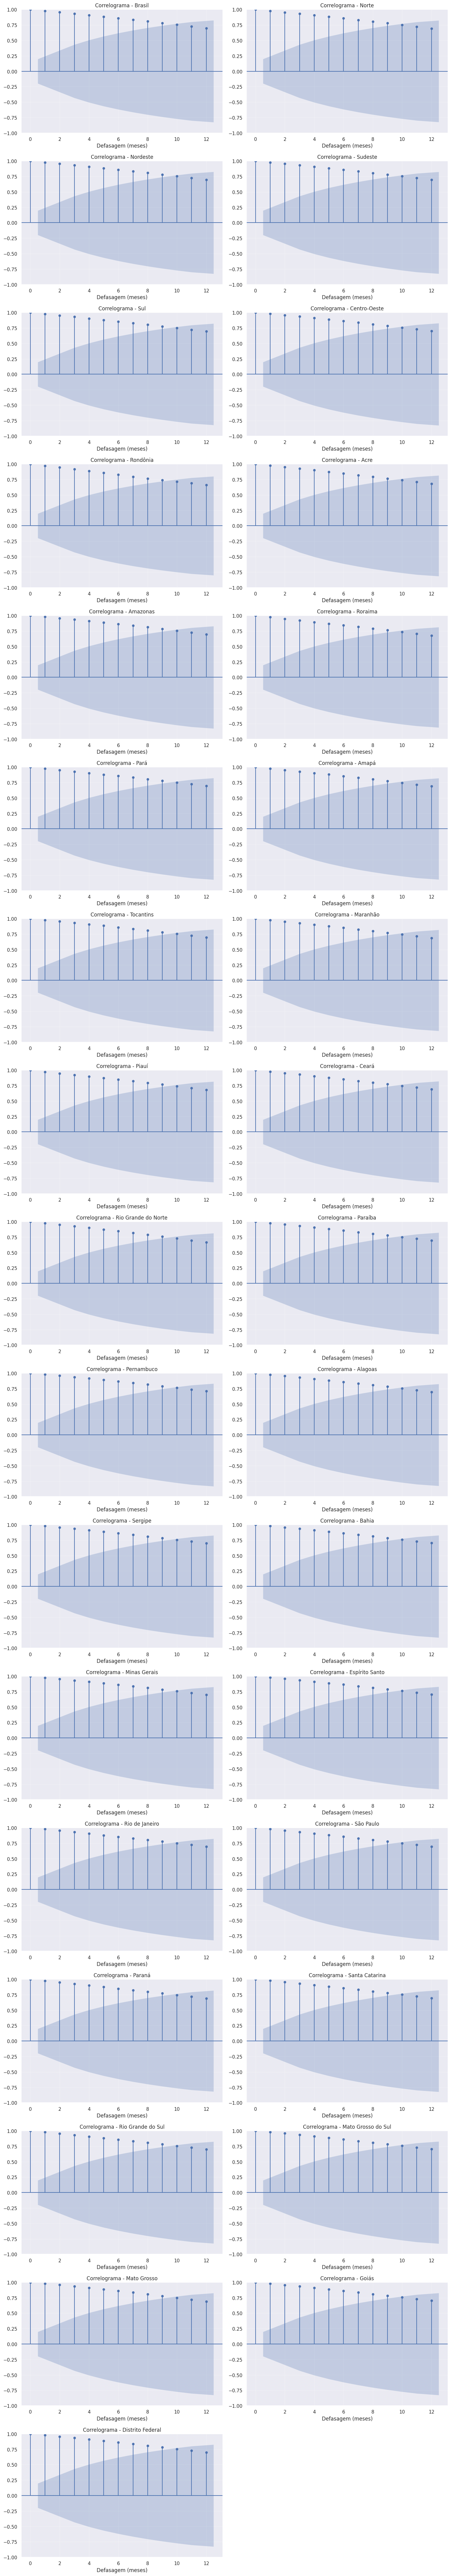


INTERPRETAÇÃO DOS CORRELOGRAMAS:

1. Autocorrelações significativas:

Brasil:
- Defasagens significativas: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
- Maior autocorrelação: 0.979

Norte:
- Defasagens significativas: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
- Maior autocorrelação: 0.978

Nordeste:
- Defasagens significativas: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
- Maior autocorrelação: 0.979

Sudeste:
- Defasagens significativas: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
- Maior autocorrelação: 0.978

Sul:
- Defasagens significativas: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
- Maior autocorrelação: 0.978

Centro-Oeste:
- Defasagens significativas: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
- Maior autocorrelação: 0.980

Rondônia:
- Defasagens significativas: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
- Maior autocorrelação: 0.973

Acre:
- Defasagens significativas: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
- Maior autocorrelação: 0.976

Amazonas:
- Defasagens significativas: [1, 2, 3, 4, 5, 6, 7,

In [45]:
# Célula 5 - Correlograma Corrigido
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Primeiro, vamos contar quantas regiões temos (excluindo a coluna 'Ano')
regioes = [col for col in dados_temporais.columns if col != 'Ano']
n_regioes = len(regioes)

# Calcular número de linhas e colunas necessárias para os subplots
n_cols = 2
n_rows = (n_regioes + 1) // 2  # Arredonda para cima

# Criar subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten()

# Plotar correlogramas
for idx, regiao in enumerate(regioes):
    plot_acf(dados_temporais[regiao], lags=12, ax=axes[idx])
    axes[idx].set_title(f'Correlograma - {regiao}')
    axes[idx].set_xlabel('Defasagem (meses)')
    axes[idx].grid(True, alpha=0.3)

# Remover subplots vazios extras, se houver
for idx in range(n_regioes, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

# Adicionar interpretação
print("\nINTERPRETAÇÃO DOS CORRELOGRAMAS:")
print("\n1. Autocorrelações significativas:")
for regiao in regioes:
    acf_values = acf(dados_temporais[regiao], nlags=12)[1:]
    sig_lags = [i+1 for i, v in enumerate(acf_values) if abs(v) > 2/np.sqrt(len(dados_temporais))]
    print(f"\n{regiao}:")
    print(f"- Defasagens significativas: {sig_lags}")
    print(f"- Maior autocorrelação: {max(abs(acf_values)):.3f}")

In [46]:
# Célula 6 - Teste de estacionariedade
from statsmodels.tsa.stattools import adfuller

print("TESTE DE ESTACIONARIEDADE (DICKEY-FULLER AUMENTADO):")
for regiao in dados_temporais.columns:
    if regiao != 'Ano':
        print(f"\nRegião: {regiao}")
        adf_test = adfuller(dados_temporais[regiao])
        print(f'Estatística ADF: {adf_test[0]:.4f}')
        print(f'p-valor: {adf_test[1]:.4f}')
        print(f'Valores críticos:')
        for key, value in adf_test[4].items():
            print(f'\t{key}: {value:.4f}')

TESTE DE ESTACIONARIEDADE (DICKEY-FULLER AUMENTADO):

Região: Brasil
Estatística ADF: -0.1924
p-valor: 0.9394
Valores críticos:
	1%: -3.5035
	5%: -2.8935
	10%: -2.5838

Região: Norte
Estatística ADF: 0.1194
p-valor: 0.9674
Valores críticos:
	1%: -3.5027
	5%: -2.8932
	10%: -2.5836

Região: Nordeste
Estatística ADF: -0.0737
p-valor: 0.9520
Valores críticos:
	1%: -3.5011
	5%: -2.8925
	10%: -2.5833

Região: Sudeste
Estatística ADF: -0.0412
p-valor: 0.9550
Valores críticos:
	1%: -3.5019
	5%: -2.8928
	10%: -2.5835

Região: Sul
Estatística ADF: 0.0439
p-valor: 0.9620
Valores críticos:
	1%: -3.5019
	5%: -2.8928
	10%: -2.5835

Região: Centro-Oeste
Estatística ADF: -0.3128
p-valor: 0.9237
Valores críticos:
	1%: -3.5019
	5%: -2.8928
	10%: -2.5835

Região: Rondônia
Estatística ADF: 1.2449
p-valor: 0.9963
Valores críticos:
	1%: -3.5011
	5%: -2.8925
	10%: -2.5833

Região: Acre
Estatística ADF: 0.8347
p-valor: 0.9922
Valores críticos:
	1%: -3.5011
	5%: -2.8925
	10%: -2.5833

Região: Amazonas
Estatíst

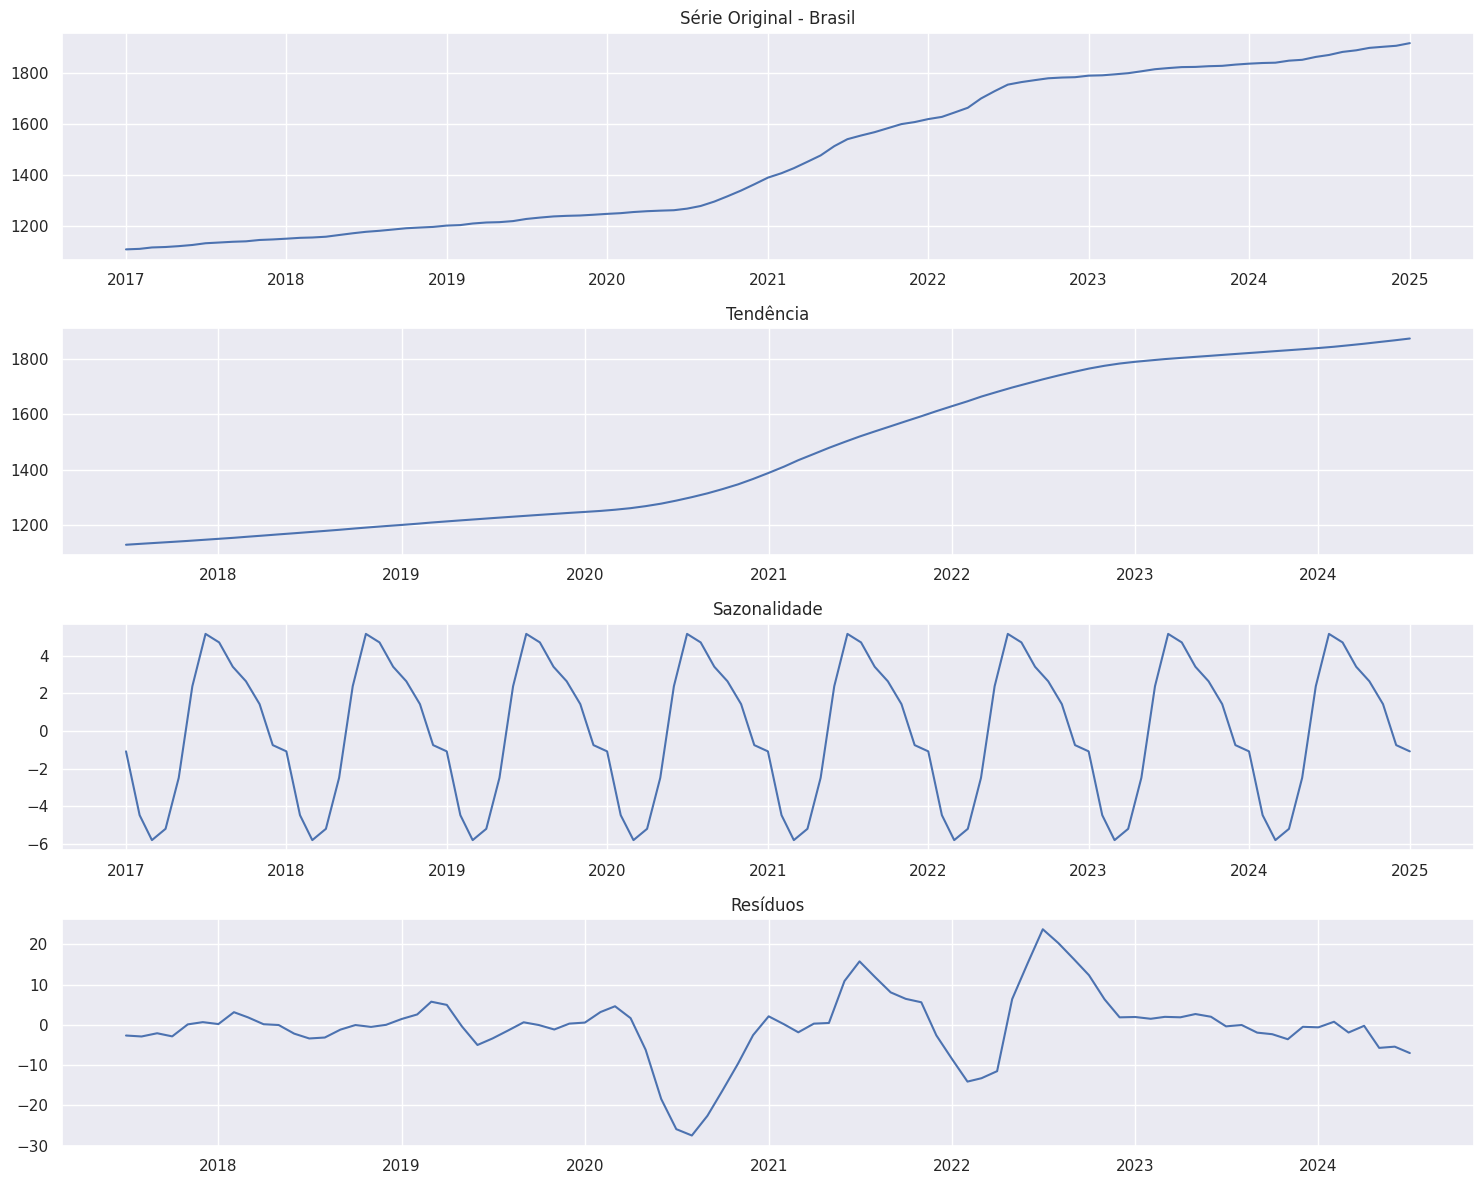

In [47]:
# Célula 7 - Decomposição da série temporal
from statsmodels.tsa.seasonal import seasonal_decompose

# Exemplo para Brasil
decomposicao = seasonal_decompose(dados_temporais['Brasil'], period=12)

plt.figure(figsize=(15, 12))
plt.subplot(411)
plt.plot(dados_temporais.index, dados_temporais['Brasil'])
plt.title('Série Original - Brasil')
plt.grid(True)

plt.subplot(412)
plt.plot(dados_temporais.index, decomposicao.trend)
plt.title('Tendência')
plt.grid(True)

plt.subplot(413)
plt.plot(dados_temporais.index, decomposicao.seasonal)
plt.title('Sazonalidade')
plt.grid(True)

plt.subplot(414)
plt.plot(dados_temporais.index, decomposicao.resid)
plt.title('Resíduos')
plt.grid(True)

plt.tight_layout()
plt.show()

/home/ubuntu/estatistica_descritiva/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/ubuntu/estatistica_descritiva/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/ubuntu/estatistica_descritiva/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


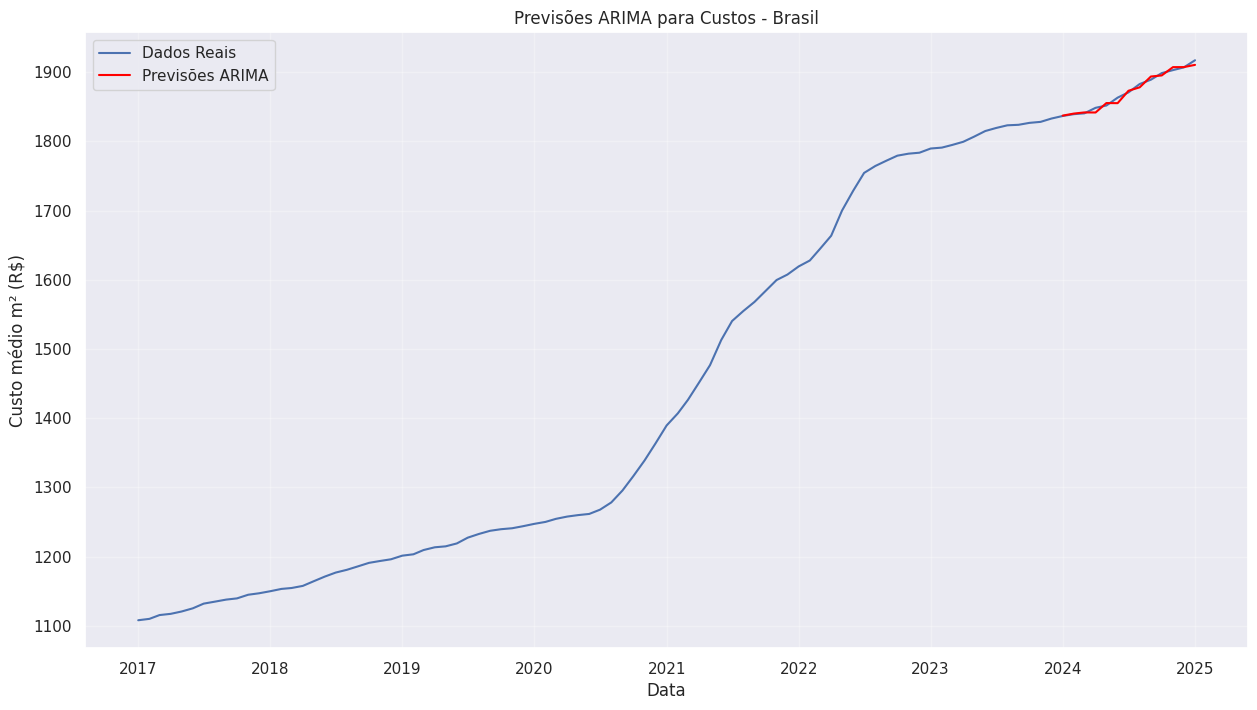


Erro Quadrático Médio (RMSE): R$ 4.37


In [48]:
# Célula 8 - Modelo ARIMA para previsão
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Ajustar modelo ARIMA para Brasil
modelo_arima = ARIMA(dados_temporais['Brasil'], order=(1,1,1))
modelo_arima_fit = modelo_arima.fit()

# Fazer previsões
previsoes = modelo_arima_fit.predict(start='2024-01-01', end='2025-01-01')

# Visualizar resultados
plt.figure(figsize=(15, 8))
plt.plot(dados_temporais.index, dados_temporais['Brasil'], label='Dados Reais')
plt.plot(previsoes.index, previsoes, color='red', label='Previsões ARIMA')
plt.title('Previsões ARIMA para Custos - Brasil')
plt.xlabel('Data')
plt.ylabel('Custo médio m² (R$)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Calcular erro
rmse = np.sqrt(mean_squared_error(
    dados_temporais['Brasil']['2024-01-01':], 
    previsoes
))
print(f"\nErro Quadrático Médio (RMSE): R$ {rmse:.2f}")

In [49]:
# Célula 9 - Análise de cointegração entre regiões
from statsmodels.tsa.stattools import coint

print("ANÁLISE DE COINTEGRAÇÃO ENTRE REGIÕES:")
regioes = [col for col in dados_temporais.columns if col != 'Ano']
for i in range(len(regioes)):
    for j in range(i+1, len(regioes)):
        score, pvalue, _ = coint(dados_temporais[regioes[i]], 
                                dados_temporais[regioes[j]])
        print(f"\n{regioes[i]} vs {regioes[j]}:")
        print(f"Estatística: {score:.4f}")
        print(f"p-valor: {pvalue:.4f}")
        print(f"{'Cointegradas' if pvalue < 0.05 else 'Não cointegradas'} (α=0.05)")

ANÁLISE DE COINTEGRAÇÃO ENTRE REGIÕES:

Brasil vs Norte:
Estatística: -2.1212
p-valor: 0.4653
Não cointegradas (α=0.05)

Brasil vs Nordeste:
Estatística: -2.0601
p-valor: 0.4972
Não cointegradas (α=0.05)

Brasil vs Sudeste:
Estatística: -2.4838
p-valor: 0.2863
Não cointegradas (α=0.05)

Brasil vs Sul:
Estatística: -2.7722
p-valor: 0.1747
Não cointegradas (α=0.05)

Brasil vs Centro-Oeste:
Estatística: -2.4123
p-valor: 0.3190
Não cointegradas (α=0.05)

Brasil vs Rondônia:
Estatística: -1.0903
p-valor: 0.8843
Não cointegradas (α=0.05)

Brasil vs Acre:
Estatística: -1.6637
p-valor: 0.6933
Não cointegradas (α=0.05)

Brasil vs Amazonas:
Estatística: -2.0160
p-valor: 0.5203
Não cointegradas (α=0.05)

Brasil vs Roraima:
Estatística: -1.9411
p-valor: 0.5591
Não cointegradas (α=0.05)

Brasil vs Pará:
Estatística: -1.9125
p-valor: 0.5736
Não cointegradas (α=0.05)

Brasil vs Amapá:
Estatística: -1.5840
p-valor: 0.7276
Não cointegradas (α=0.05)

Brasil vs Tocantins:
Estatística: -2.2163
p-valor: 0.

Goiás e Distrito Federal estão cointegradas (p=0.0069)

Indica relação de equilíbrio de longo prazo

Sugere mercado imobiliário integrado na região

Implicações Estatísticas:

H₀: Séries não são cointegradas

H₁: Séries são cointegradas

α = 0.05 (nível de significância)

Rejeição de H₀ apenas para GO-DF


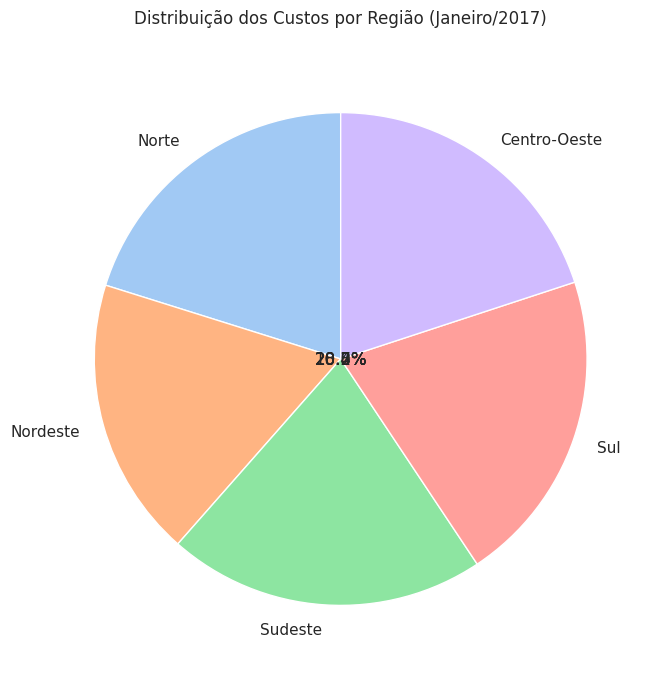

In [50]:
# Célula 1 - Distribuição dos Custos por Região (2017)
def plot_clean_pie(df_processado):
    # Filtrar apenas os dados de 2017-01-01 para regiões principais
    dados_pie = df_processado[df_processado['Nivel'] == 'GR'][['Regiao', '2017-01-01']]
    
    plt.figure(figsize=(10, 8))
    
    # Calcular percentuais
    total = dados_pie['2017-01-01'].sum()
    percentuais = (dados_pie['2017-01-01'] / total * 100)
    
    # Criar gráfico de pizza limpo
    wedges, texts, autotexts = plt.pie(
        dados_pie['2017-01-01'],
        labels=dados_pie['Regiao'],
        autopct='',
        startangle=90,
        colors=sns.color_palette("pastel"),
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
    )
    
    # Adicionar percentuais
    for i, autotext in enumerate(autotexts):
        plt.text(wedges[i].center[0], wedges[i].center[1],
                f'{percentuais.iloc[i]:.1f}%',
                ha='center', va='center')
    
    plt.title('Distribuição dos Custos por Região (Janeiro/2017)', pad=20)
    plt.show()

plot_clean_pie(df_processado)

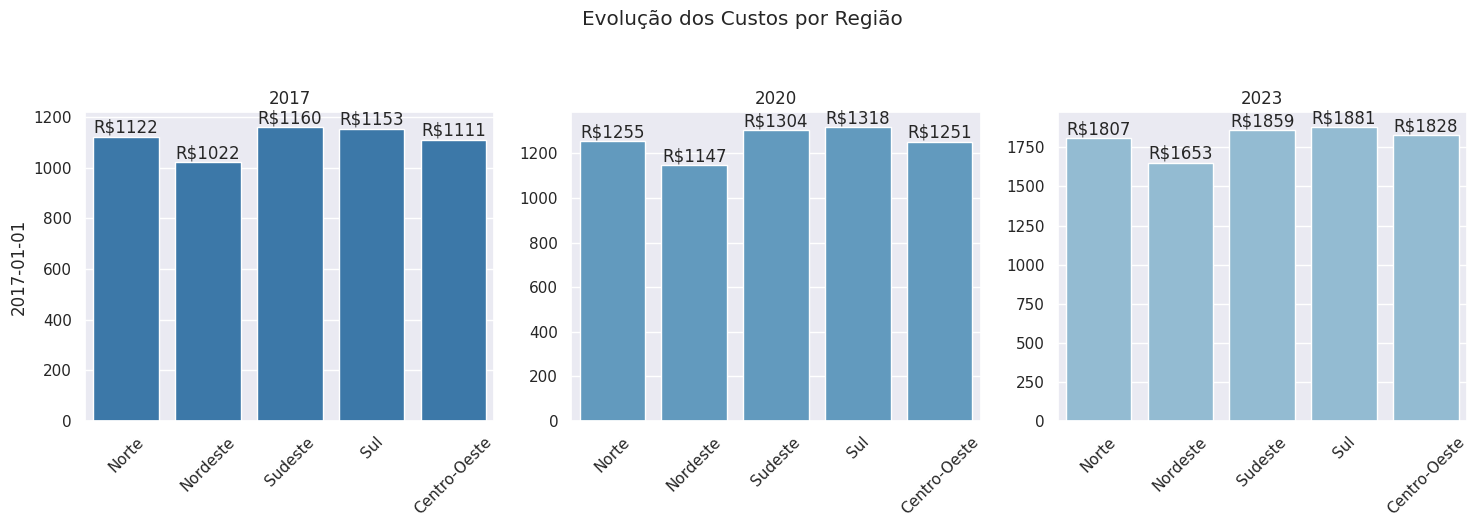

In [51]:
# Célula 2 - Evolução dos Custos por Região (Gráfico de Barras Agrupadas)
def plot_clean_bars(df_processado):
    # Selecionar anos específicos para comparação
    anos_comparacao = ['2017-01-01', '2020-01-01', '2023-01-01']
    dados_barras = df_processado[df_processado['Nivel'] == 'GR'][['Regiao'] + anos_comparacao]
    
    # Criar figura com subplots
    fig, axes = plt.subplots(1, len(anos_comparacao), figsize=(15, 5))
    
    for idx, ano in enumerate(anos_comparacao):
        sns.barplot(
            data=dados_barras,
            x='Regiao',
            y=ano,
            ax=axes[idx],
            color=sns.color_palette("Blues_r")[idx+1]
        )
        
        axes[idx].set_title(ano[:4])
        axes[idx].set_xlabel('')
        if idx > 0:
            axes[idx].set_ylabel('')
        axes[idx].tick_params(axis='x', rotation=45)
        
        # Adicionar valores nas barras
        for p in axes[idx].patches:
            axes[idx].annotate(
                f'R${p.get_height():.0f}',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom'
            )
    
    plt.suptitle('Evolução dos Custos por Região', y=1.05)
    plt.tight_layout()
    plt.show()

plot_clean_bars(df_processado)

/tmp/ipykernel_1541/1306855111.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.date_range(start='2017-01-01', periods=len(colunas_datas), freq='M'),
/tmp/ipykernel_1541/1306855111.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.date_range(start='2017-01-01', periods=len(colunas_datas), freq='M'),
/tmp/ipykernel_1541/1306855111.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.date_range(start='2017-01-01', periods=len(colunas_datas), freq='M'),
/tmp/ipykernel_1541/1306855111.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.date_range(start='2017-01-01', periods=len(colunas_datas), freq='M'),
/tmp/ipykernel_1541/1306855111.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.date_range

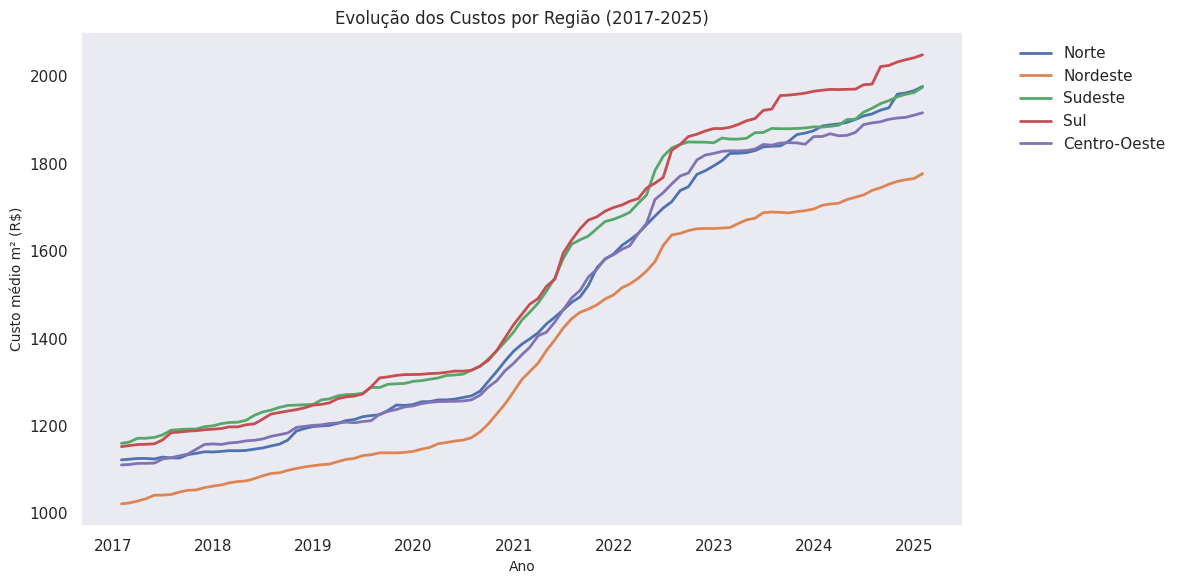

In [53]:
# Célula 3 - Evolução Temporal Limpa (Corrigida)
from matplotlib.dates import YearLocator, DateFormatter

def plot_clean_lines(df_processado):
    # Selecionar dados das regiões principais
    dados_linhas = df_processado[df_processado['Nivel'] == 'GR']
    
    plt.figure(figsize=(12, 6))
    
    # Criar linha para cada região
    for regiao in dados_linhas['Regiao'].unique():
        dados_regiao = dados_linhas[dados_linhas['Regiao'] == regiao]
        valores = dados_regiao[colunas_datas].values.flatten()
        
        plt.plot(
            pd.date_range(start='2017-01-01', periods=len(colunas_datas), freq='M'),
            valores,
            label=regiao,
            linewidth=2
        )
    
    plt.title('Evolução dos Custos por Região (2017-2025)', fontsize=12)
    plt.xlabel('Ano', fontsize=10)
    plt.ylabel('Custo médio m² (R$)', fontsize=10)
    plt.legend(frameon=False, bbox_to_anchor=(1.05, 1))
    plt.grid(False)
    
    # Formatar eixo x corretamente
    ax = plt.gca()
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%Y'))
    
    plt.tight_layout()
    plt.show()

plot_clean_lines(df_processado)

Gráfico de Barras Detalhado:


/tmp/ipykernel_1541/2069047549.py:20: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.barplot(x='Regiao', y='Custo', hue='Ano', data=dados,


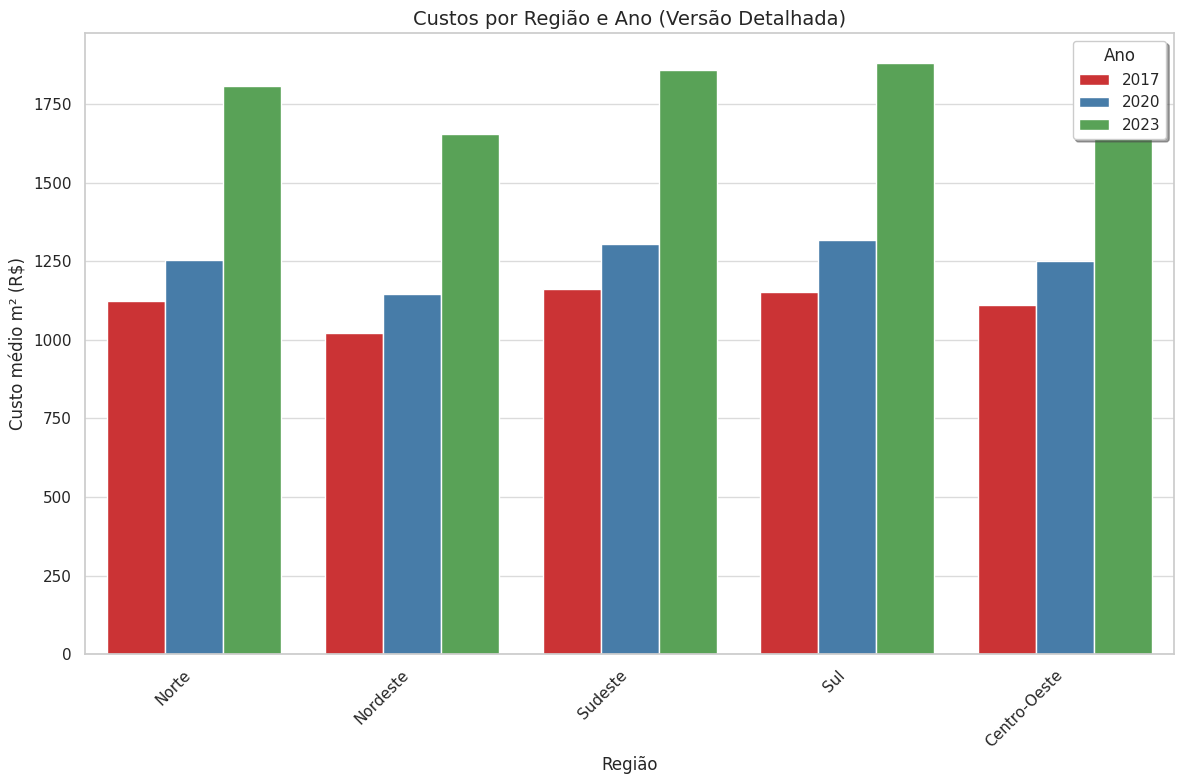


Gráfico de Barras Limpo:


/tmp/ipykernel_1541/2069047549.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(
/tmp/ipykernel_1541/2069047549.py:49: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  g = sns.catplot(


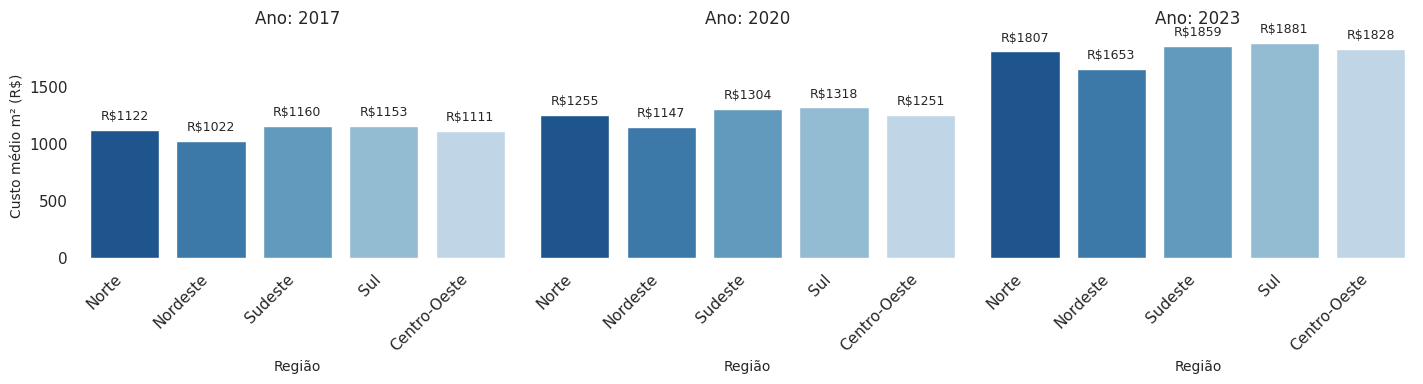


Estatísticas por Ano:

Ano 2017:
Média: R$ 1113.61
Desvio Padrão: R$ 55.26
Mínimo: R$ 1021.84
Máximo: R$ 1160.28

Ano 2020:
Média: R$ 1255.11
Desvio Padrão: R$ 67.18
Mínimo: R$ 1146.98
Máximo: R$ 1318.19

Ano 2023:
Média: R$ 1805.57
Desvio Padrão: R$ 89.84
Mínimo: R$ 1652.89
Máximo: R$ 1880.52


In [58]:
# Célula 1 - Gráficos de Barras (Detalhado vs. Limpo)
import seaborn as sns
import matplotlib.pyplot as plt

def grafico_barras_detalhado(df_processado):
    """Cria um gráfico de barras detalhado (mais carregado)"""
    # Filtrar dados para regiões principais e anos específicos
    anos_analise = ['2017-01-01', '2020-01-01', '2023-01-01']
    dados = df_processado[df_processado['Nivel'] == 'GR'][['Regiao'] + anos_analise].melt(
        id_vars=['Regiao'],
        var_name='Ano',
        value_name='Custo'
    )
    dados['Ano'] = dados['Ano'].str[:4]  # Simplificar ano
    
    plt.figure(figsize=(12, 8))
    sns.set_style("whitegrid")

    # Criar gráfico carregado
    sns.barplot(x='Regiao', y='Custo', hue='Ano', data=dados,
                palette='Set1',
                errwidth=1.5,
                capsize=0.1,
                dodge=True)

    plt.title('Custos por Região e Ano (Versão Detalhada)', fontsize=14)
    plt.xlabel('Região', fontsize=12)
    plt.ylabel('Custo médio m² (R$)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Ano', loc='upper right', frameon=True, shadow=True)
    plt.grid(axis='y', linestyle='-', alpha=0.7)
    plt.tight_layout()
    plt.show()

def grafico_barras_limpo(df_processado):
    """Cria um gráfico de barras limpo e efetivo"""
    # Preparar dados
    anos_analise = ['2017-01-01', '2020-01-01', '2023-01-01']
    dados = df_processado[df_processado['Nivel'] == 'GR'][['Regiao'] + anos_analise].melt(
        id_vars=['Regiao'],
        var_name='Ano',
        value_name='Custo'
    )
    dados['Ano'] = dados['Ano'].str[:4]
    
    # Criar gráfico limpo
    sns.set_style("white")
    
    g = sns.catplot(
        data=dados,
        x='Regiao',
        y='Custo',
        col='Ano',
        kind='bar',
        palette=sns.color_palette("Blues_r"),
        height=4,
        aspect=1.2,
        sharey=True
    )
    
    # Personalizar títulos e labels
    g.set_titles("Ano: {col_name}", fontsize=12)
    g.set_xlabels('Região', fontsize=10)
    g.set_ylabels('Custo médio m² (R$)', fontsize=10)
    
    # Rotacionar labels do eixo x
    for ax in g.axes.flat:
        for label in ax.get_xticklabels():
            label.set_rotation(45)
            label.set_ha('right')
        
        # Adicionar valores nas barras
        for p in ax.patches:
            ax.annotate(
                f'R${p.get_height():.0f}',
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=9
            )
    
    # Remover espinhas desnecessárias
    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.show()

# Executar ambos os gráficos
print("Gráfico de Barras Detalhado:")
grafico_barras_detalhado(df_processado)
print("\nGráfico de Barras Limpo:")
grafico_barras_limpo(df_processado)

# Adicionar análise estatística básica
print("\nEstatísticas por Ano:")
for ano in ['2017-01-01', '2020-01-01', '2023-01-01']:
    dados_ano = df_processado[df_processado['Nivel'] == 'GR'][ano]
    print(f"\nAno {ano[:4]}:")
    print(f"Média: R$ {dados_ano.mean():.2f}")
    print(f"Desvio Padrão: R$ {dados_ano.std():.2f}")
    print(f"Mínimo: R$ {dados_ano.min():.2f}")
    print(f"Máximo: R$ {dados_ano.max():.2f}")